# 1. Electricity
- Obj : 빌딩 전력량을 예측하는 모델
- Data : Electric.csv
- Hypothesis : Surface_area를 Input으로 쓰면 Electricity를 예측하는데 도움이 될 것이다.
- Feature : surface_area(Input), electricity(Output)
- Process : Data Load -> EDA -> Modeling(Train) -> (Validation) -> Test -> Visualization

```R
##### Data Load
Elec <- read.csv('/Users/mac/Downloads/dev/study/R_ML/Class 1/Data/Electric.csv')

##### EDA ... Data Structure & Plot
str(Elec)
plot(Elec$surface_area, Elec$electricity, cex = 3, pch = 19)


##### 난수 발생 알고리즘 초기값 고정 ... Training 할 때마다 샘플이 동일한 기준에서 돌아가야 하니까
set.seed(3)

##### Training Set을 전체 데이터의 70% 지정 (Training Data)
train <- sample(1:nrow(Elec), 0.7 * nrow(Elec))

##### 실제 전력량 (Output, Answer)
real_electricity <- Elec$electricity[-train]

##### Model_1 ... 전력량과 면적의 1차 함수
Model_1 <- lm(electricity ~ surface_area, data = Elec[train, ])
predicted_electricity_1 <- predict(Model_1, Elec[-train, ])
test_error_1 <- mean((real_electricity - predicted_electricity_1)^2)

##### Model_5 ... 전력량과 면적의 5차 함수
Model_5 <- lm(electricity ~ poly(surface_area, 5), data = Elec[train, ])
predicted_electricity_5 <- predict(Model_5, Elec[-train, ])
test_error_5 <- mean((real_electricity - predicted_electricity_5)^2)

##### Model_10 ... 전력량과 면적의 10차 함수
Model_10 <- lm(electricity ~ poly(surface_area, 10), data = Elec[train, ])
predicted_electricity_10 <- predict(Model_10, Elec[-train, ])
test_error_10 <- mean((real_electricity - predicted_electricity_10)^2)

##### 각각의 Error(Cost) 값
test_error_1
test_error_5
test_error_10

##### EDA ... 구현한 모든 모델 시각화 
plot(Elec$surface_area, Elec$electricity, cex = 3, pch = 15)
a <- seq(500, 820, length = 1000) # surface_area의 값 범위(500~820)를 1000등분 함

points(a, predict(Model_1, data.frame(surface_area = a)), type = 'l', lwd = 10, col = 1)
points(a, predict(Model_5, data.frame(surface_area = a)), type = 'l', lwd = 10, col = 5)
points(a, predict(Model_10, data.frame(surface_area = a)), type = 'l', lwd = 3, col = 10)
```

<img src = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAYAAAD958/bAAAEGWlDQ1BrQ0dDb2xvclNwYWNl%0AR2VuZXJpY1JHQgAAOI2NVV1oHFUUPrtzZyMkzlNsNIV0qD8NJQ2TVjShtLp/3d02bpZJNtoi%0A6GT27s6Yyc44M7v9oU9FUHwx6psUxL+3gCAo9Q/bPrQvlQol2tQgKD60+INQ6Ium65k7M5lp%0AurHeZe58853vnnvuuWfvBei5qliWkRQBFpquLRcy4nOHj4g9K5CEh6AXBqFXUR0rXalMAjZP%0AC3e1W99Dwntf2dXd/p+tt0YdFSBxH2Kz5qgLiI8B8KdVy3YBevqRHz/qWh72Yui3MUDEL3q4%0A4WPXw3M+fo1pZuQs4tOIBVVTaoiXEI/MxfhGDPsxsNZfoE1q66ro5aJim3XdoLFw72H+n23B%0AaIXzbcOnz5mfPoTvYVz7KzUl5+FRxEuqkp9G/Ajia219thzg25abkRE/BpDc3pqvphHvRFys%0A2weqvp+krbWKIX7nhDbzLOItiM8358pTwdirqpPFnMF2xLc1WvLyOwTAibpbmvHHcvttU57y%0A5+XqNZrLe3lE/Pq8eUj2fXKfOe3pfOjzhJYtB/yll5SDFcSDiH+hRkH25+L+sdxKEAMZahrl%0ASX8ukqMOWy/jXW2m6M9LDBc31B9LFuv6gVKg/0Szi3KAr1kGq1GMjU/aLbnq6/lRxc4XfJ98%0AhTargX++DbMJBSiYMIe9Ck1YAxFkKEAG3xbYaKmDDgYyFK0UGYpfoWYXG+fAPPI6tJnNwb7C%0AlP7IyF+D+bjOtCpkhz6CFrIa/I6sFtNl8auFXGMTP34sNwI/JhkgEtmDz14ySfaRcTIBInmK%0APE32kxyyE2Tv+thKbEVePDfW/byMM1Kmm0XdObS7oGD/MypMXFPXrCwOtoYjyyn7BV29/MZf%0AsVzpLDdRtuIZnbpXzvlf+ev8MvYr/Gqk4H/kV/G3csdazLuyTMPsbFhzd1UabQbjFvDRmcWJ%0AxR3zcfHkVw9GfpbJmeev9F08WW8uDkaslwX6avlWGU6NRKz0g/SHtCy9J30o/ca9zX3Kfc19%0Azn3BXQKRO8ud477hLnAfc1/G9mrzGlrfexZ5GLdn6ZZrrEohI2wVHhZywjbhUWEy8icMCGNC%0AUdiBlq3r+xafL549HQ5jH+an+1y+LlYBifuxAvRN/lVVVOlwlCkdVm9NOL5BE4wkQ2SMlDZU%0A97hX86EilU/lUmkQUztTE6mx1EEPh7OmdqBtAvv8HdWpbrJS6tJj3n0CWdM6busNzRV3S9KT%0AYhqvNiqWmuroiKgYhshMjmhTh9ptWhsF7970j/SbMrsPE1suR5z7DMC+P/Hs+y7ijrQAlhyA%0AgccjbhjPygfeBTjzhNqy28EdkUh8C+DU9+z2v/oyeH791OncxHOs5y2AtTc7nb/f73TWPkD/%0AqwBnjX8BoJ98VQNcC+8AAEAASURBVHgB7L0HvCVlff//zK1bWNgG7FJ36b1KEbAgiqKoGBUx%0AsQY1xuSfRDBNjcGWaIw9RCxJ9GcBMaghGlFRkWKhiXRpu3RYyoLLsru3zf/znHvnnGfm3nPv%0AzJyZOTNz3s9rvzvlPPU9c895vvP9Pt8xhgQBCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQ%0AgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAAC%0AEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAA%0AAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhA%0AAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEI%0AQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAAB%0ACEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAA%0AAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQg%0AAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAE%0AIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAA%0ABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCA%0AAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQ%0AgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAAC%0AEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAA%0AAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhA%0AAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEI%0AQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAAB%0ACEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAA%0AAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQg%0AAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAE%0AIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAA%0ABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCA%0AAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQ%0AgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAAC%0AEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAA%0AAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhA%0AAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEI%0AQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAAB%0ACEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAA%0AAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQg%0AAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAE%0AIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAA%0ABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIBA6Ql4pe9h73TwGRrqYO8Ml5FCAAIQ%0AgAAEIAABCNSIwIjGck0dxoOCVI6raJWjq/LqyrHGM39k+pvV/5cZV2N+85gdCEAAAhCAAAQg%0AAAEIxCWwtTJ+xAw0s19lJsx/SZTsnLbyShIKUvPSdnXnmWr9F5JFEqt9Z5o2mME3zzN95wSV%0APm0m3riNGT0vOGYLAQhAAAIQgAAEIACBuARuMGbnfczwHUH+Lcb/xlZm5A91fIzkl8H5qm5b%0Aql9VR1CvflvlKHMFadiYMRfTPONZFT/zdtw22IcABCAAAQhAAAIQqCeBPY3ck5wkP6UtzmHl%0Ad/sqPwIGAAEIQAACEIAABCAAAQgURsAzQ5F1816tHryjIBV2K3W1odCCI8/4Ia2/qz2jcQhA%0AAAIQgAAEIACBShHQXHLI7bBvJkbd46rvoyBV/QrSfwhAAAIQgAAEIAABCBRLIGJBqtfSDRSk%0AYm+mbrUWsiCpE1iQunUlaBcCEIAABCAAAQhUnIAsSBEFycOCVPFrSvchAAEIQAACEIAABCAA%0AgfQEIi52WJDSo6RktwhgQeoWedqFAAQgAAEIQAACNSMwbkzEghSOmFz14RLmu+pXkP5DAAIQ%0AmJ3A7vpY0f4LSfadGLWKZFQINRqBAAQgUDkC/bW2IKEgVe6GTNVhLEipsFEIArUgcKFGsV9B%0AI9lf7dxcUFs0AwEIQAACXSIwuQbJXdLOGqQuXQqahQAEIAABCEAAAhCAAARKQCBiQSLMdwmu%0ACV1ISAALUkJgZIdAjQhYF7uiUpFtFTUm2oEABCAAgekEomuQauVeTZjv6RecMxCAAAQgAAEI%0AQAACEIBAGwLRMN96Ek+Y7zasOF1eAliQyntt6BkEIAABCEAAAhCoGoGIi129AvRgQara7Uh/%0AIQABCCQjEPoRS1Y0ce6igkEk7hgFIAABCEAgUwIhF7tx441lWnuXK0NB6vIFKKJ533hYkIoA%0ATRsQgMBCEEAAAhCAQC8Q6As9fNNEkzVIvXDZGSMEIAABCCQmsHXiEhSAAAQgAIHKEVCA75AF%0AacIQ5rtyF5EOGyxI3AQQgEARBEJPFItokDYgAAEIQKAbBPzQ971vxgjS0I3LQJsQgAAEIFB6%0AAitL30M6CAEIQAACHROYiFiQ+oyHi13HVKmgaAJYkIomTnsQ6E0CoSeKvYmAUUMAAhDoCQKh%0A73spTFiQeuKyM0gIQAACEIAABCAAAQhAYCYC0TVIWJBmosS5UhPAglTqy0PnIAABCEAAAhCA%0AQHUIRF8UiwWpOteOnkIAAhCAAAQgAAEIQAACmRMIh/neTBS7zAlTYf4EsCDlz5gWIAABCEAA%0AAhCAQK8QCLnYjZkR1iD1ypVnnBCAAAQgkIjAokS5yQwBCEAAAhUlEA7zvYUXxVb0OvZ2t7Eg%0A9fb1Z/QQKIrA/KIaoh0IQAACEOgqgVAUOylIWJC6ejloHAIQgAAEykpgoKwdo18QgAAEIJAd%0AAS/yHqQNWJCyg0tNhRHAglQYahqCQE8TWNDTo2fwEIAABHqHQMiC9AgKUu9ceUYKAQhAAAKJ%0ACOihIgkCEIAABOpPwAspSDejINX/ktdwhFiQanhRGRIEIAABCEAAAhDoEoGQgvQ11iB16TLQ%0ALAQgAAEIlJ1A6Aez7J2lfxCAAAQgkI6Anrw7Yb798TuMiT6MT1dxSUr1laQfdCNfAtGbFjeY%0AfHlTOwR6lQAKUq9eecYNAQj0GIFQmO+Rug0eBaluV5TxQAACEOgegf7uNU3LEIAABCBQIAH3%0AgRgKUoHge6qpgT33zHO8WJDypEvdEIAABCAAAQhAoLcIOAqSV6t3INnLiAWpJDfz0AEHlKQn%0AdAMCEIAABCAAAQhAAAKzEnDWIBksSLOi4sPUBPpXrkxdNkZBLEgxIJEFAhDomADrGztGSAUQ%0AgAAEqkCgFeZbk0wUpCpcsir2sW/Jkip2mz5DAAIQgAAEIAABCPQYAT0Nc1zsfBSkHrv+hQ23%0AP18FKWJB6uMpb2FXloYg0FMEXJeLnho4g4UABCDQWwRCUexYg9RbF7+40XqLFhlz9tmONl5c%0A27QEAQhAAAIQgAAEIACBBATcB2JYkBKAI2tCAjucdNKOCYvEzR6xIBksSHHJkQ8CEIAABCAA%0AAQhAIErAfaiPghSlw3F2BAaXLs1LQcquk9QEAQhAoD0BHr60Z8MnEIAABOpEwFGQPBSkOl3Z%0Aso3FHx7eKac+YUHKCSzVQgACIQJjoSMOIAABCECgdgTON0YvBfearwrSkzHWINXuKpdoQF5f%0AX14KUolGSVcgAAEIQAACEIAABKpK4Ahj3PVHdhhYkKp6MavQb6+/PxcFyTceFqQq3AD0EQLV%0AJzBe/SEwAghAAAIQmI3A1qEQ3zZn/cJ8D8wGgM8KJtDXxxqkgpHTHAQgkCmBotYgnaheH5dp%0Az9tXdrk++lH7j/kEAhCAQG8RkPnIWX/UGHvtLEgoSOW6p3OxIGmIIQuSZjBFTWLKRZfeQAAC%0AeRMoyg/9HzWQY/IezFT9v9AWBakg2DQDAQiUn4AWIIUUJE0yi/ruLwxOc4FVYS3SUFsCnufl%0ApSC1bZMPIAABCFSQwJ4F9rnItgocFk1BAAIQSEdAygNrkNKho1QaAtLAtzV+6M3EaaqZqUzI%0AgqQMWJBmosQ5CECgKgTmFdjRItsqcFg0BQEIQCAdAc8MhyxImlbWzsUOC1K6eyOXUtb1bRdj%0AsCLlQpdKIQCBGhEoUmkpsq0aXSKGAgEI1JWAZ6Y9zEdBquvFLsu4pLHunENfsCDlAJUqIQAB%0ACEAAAhCAQK8RmK4gTbAGqddugqLHK00GC1LR0GkPAhCoGoEivR+KbKtq14H+QgACvUkgtAZJ%0Ar5PBgtSb90Fxo5abHRak4nDTEgQgkC2BLdlW17a2ItdRFtlW2wHzAQQgAIGyEJhuQarfi2IJ%0A812Wu22qHzkpSCUbJd2BAATqQOAIxXs5UrJc8rQGdIf80s82Ewt2MI3DOgyRMUAAAhCAQITA%0AmMJ8uwqEzOy1syC544sMn8MuESjAguTzRLRLF7fgZr1RM/Acmb730NOe2wfN2KVqP7oereAu%0A0VwdCLzR9Jm/NwNm9+kBMfWya/+hEeN/4Wkz+uHFxqyvw3gZAwQgAAEItAhoEhmJYle/9yD1%0AooK0RJd4G8mw5CnJE5KNklIkzV7zUJBKMTY6URwBPc3fccAMXaDAiEcF2vCI6fv1mBl51QJj%0A7iuuJ7RUJwIrNZiv6vUXz5GC1D55izzjnbnQDP/RJjP+uvlm7Cft8/IJBCAAAQhUj0B/aA0S%0AYb6rdwWDHh+qnS9J1kkel6yR3CqxE0WrJN0p+bxkW0m3Uw4K0njUahDMmbs9VtrPgYBu8q2k%0AHP1Ik9Sj3Ort8YAZvkRPBOxDAhIEEhHYV9aiX+ih4ezKUajKFQOm74cjZvD00FkOIAABCECg%0A0gSia5B8M1E7F7vZHgNW+uI5nX+f9q+V2B/pTZJfSr4v+abkIsmVEj1UN2+T3CL5Q0nXkjSX%0AZTv4vu0PCQKpCCw2w/8sZWi/mQrr/tp9gRk6Z6bPOAeBdgT2lHJ0sSxHO0Vc6q41E+bP5Flx%0AgtzPT9P2QjOuB07+RKser1/34helJP1x6xx7EIAABCBQcQJRF7vaKUgVvz5zdv/VymGtJz+Q%0AHDZLbmtRebbkKonNf4ykyPTMZZ//vL/a9wPZO8vGN5uBF46aYb8lQ3+XZf3UVR4Cm83wnqNm%0AaNS51nqsM3yOzo23zg37m8zA8eXpNT3JmYBVWOz3WiqRudG/1Qw53x/D/tM6fofpm6m+e6QM%0AHaV7bo17v+n+G9P30IkZjnM87XhSlLNtkSAAAQhAYIqAvuff6H7H6/hN+sgqTfZ34ZmSyqe6%0AW5BO0RW6S2K31orULtkLeqnE/oBvkLxB0rWkX+Mc3Oy6NhwaLpCA/qD/Sr7AzbWFCtDwpSGz%0A5e2aIf+z241+0/8B95h9CLQjYNccucEYNun376WyFv27rEczpLEhM/rrEbPlaN/4N7Q+9/r7%0ATd95MuHv0jrHHgQgAAEIVJSAXcffTLwHqYmiMjsHqafWpS7uuzlsxKXrJYrE1L2kSW7WCpJV%0AAN1kLWakmhF4yJiF8gt+Y2tY/sio2fKP9nidGfmwNvcHn+kGOE4R7mrxlCcYE9vsCfyF6Tcv%0AdAIyTEg5Os2MmZ80HhLO2N5Ce3YrYx4eMSMv0BfPmlYub0m/Gf76WcapsPUhexCAAAQgUB0C%0A1lrkptq52GkuXuv0oEZ3uCQSbaPtmO3idatU2QAO3Uw8Ze0m/Yq2vcQMvULWo8YE1Q5Bk9Pz%0AdWD/BqzGvUnH/2r3g+Sbvj8N9tlCIEpgd534sBQkN/2DGTf/N7PlKMjW/NG0SpKsSC/XnWhf%0AkdRIVjF/jxmWlZMEAQhAAAJVJeCZvuZ3vR0DFqTqXcmvqMv7SBTu2Bw1S/f1u22eJbFBG2yA%0AhO9KupbUGSxIXaNf3Yb1tOM1bu/HzcSX3eMnzZb/0NeYjdrYSLrPXv34ZMj74BRbCDQJnK3n%0ASvOcoAw/kWL0L1KQkqRhM3KDlKR3hsv4H8DVLkyEIwhAAALVIuCHFCRjxrEgVesCmm+ov2dI%0ATpD8SmLDetutjWJ37tTWuuBZ16NLJTaQw5mSKyTdTFiQukm/gm3fa8x8ddve50F66KNm7GfB%0Agd0qhv0GPeWx9/1U8uZtZQZfGRyxhUBA4BXygjvB8YTboOeDb9G6oxhpmgalNUlfULkftsp6%0ACxWG/uOtY/YgAAEIQKBiBEIKkjxU4i5lqcww6+5ip2tmPik5UHKexFqKrCXpxZLTprbWpW6j%0AxP5g7yb5tKSrSZ3OWkGyHNxkOZBqRGBbM/x83d5WSWokXfDvn2Wm+0J5ZvyrU1kaG5nJ7d8B%0ACQJNAjbCxz+bZpyPxvmzZDmyT5dipBm1qDGzRe6cCp7YTN6rtAbuuOYhOxCAAAQgUBkCE5MR%0A65r91S8GFqQmjWrt3KXuvlZigy9sI7EKyF6SxRK7ZmNPybskehBfipS1i10pBkUn8iPQZyae%0A79Yut6bvucfB/qAZu1zKk3Of+8c/wYtjAzxsReAtshy5Uetulp59dnzXuhmfIkpzX6Mf1I+5%0AgLUG7qPuMfsQgAAEIFAZAhELkoeCVJlL176j/frIirWeaR1xQ0HSpjxJ5p0FO/r+sqx6pAkx%0AFqSsYJa2Hu95ra754xvNyM9ax6E93QsT32md8Qbmm6GXtI7Z62UCwxr8uyPWo7+TcjTNby4F%0ApPVm5F9U7MGgqF4ge4ze23VScMwWAhCAAASqQUARc0MKknqNglSNSzetl4fqzJck6yRal94I%0APWsj1VmvEbto/U7J5yVaplGOJHOltXKRIDAngQ26b6VU7x9klAZ0zVJjngyOo1t9sTkKUsPv%0A9ORoHo57k8Dpem600gnMcIWsRz+Y7qk5G5zow5hm3hVyZfbNxAebJ7TTZ/x/dI/ZhwAEIACB%0AKhAgil0VrtJcfXyfMlwrOV1ifeBtUAYbpOGbkoskV0oWSN4muUXyh5KuJ014s1SQopMW1iB1%0A/Qpn14FBM/xMqTnNa6qLfclstV8uNzsZFZsKlAqeeP6kVXW2YnxWcwLWrH5GxHr0fr3zKGGa%0AcQ1SUMf1ZvRLuj/vCY5lRTpqkxlwrJ/BJ2whAAEIQKDEBEIWJN+MYEEq8cWaqWuv1sn3S6wi%0AdLhkV8kxEvvE/DSJde+wQRt2kDxHskbydYnN09WkSWuWClJXx0Lj+RKQRUgKUijZhwBt0/Gm%0AMev9cSuDt+QVZuDI1jF7vUjgVNlzdnWsR7+U5ehn07xzOyPzDGND4U2E1h4NmP6/7axWSkMA%0AAhCAQLEEwi52EzV0sZMnV63TKRrdXRK7nXHx8NTo9VCzEeb7RG3vlrxB8gtJ2jSogq+ShDTs%0AWSrbK/qZbrZdouc6OLbjc5P0L1JdCOgpfEhBGjUjsypIdtwK4vBDlbP36FTqO0E7c5YLcrOt%0AH4G/jLwU9mOZrDyazul+M/qfO5nh9+mT7ac+PXGLGTpA70y6cXpuzkAAAhCAQAkJhOa3mrPW%0AzoJUdwXJhvC2k77ZlCP3vluvg+slNtpdJ8lapD4gsYpSnGQj6YUSFqQQDg7aE5Bvna/3d03q%0AvNKE1yjyyMPts09+Mm5GLx4ww81sej/S83XwoeYJdnqKwDN1/xzeiFszOezbZD3632Rrj2Lz%0AWm3M5lHj/5vu2eZ6JCnrf6kK3hq7EjJCAAIQgEDXCGjGEVKQ5IxdOwWpr2t0i2n4QTVjXevi%0AKipLlNcqVbdKOkl3q/CeklUx5d3KF02ZWZCkBWNBitKtybGigMn66C0KhiNl6Zpgf7btfGPW%0A6qawwUkaSeWOXmPMvOCYbW8ReEfEevRv6a1H+t2cO20yI+foa2lzkFP33x8Rbj6gwRYCEIBA%0A6QmEFCR9maMglf6ShTv4FR3uI7lAYtcatUv2R/1ZkoskNmDDdyXdTrt2uwO0X34Ck9ajUD9j%0AKUhTJS5plfSGdzIDR7eO2esVAss10D9wrEe/1/OU/5feemS/P+dMWxvzqBT0c1sZvfkLzPCb%0AWsfsQQACEIBAeQl4IQXpPhSk8l6qNj37hs6fIbHrK34l0TVsbG0UO/vjbLe/lNwvuVQiVyVz%0ApuQKSbfTCuOHF8F10CHNRVpJvqKxnvK2SrBXYgI2hH0zjZsJG7ExZpr4eThj37PDxxz1AoE3%0Ayno05HwlfE3K0cb0A5fBOm7yzw7n9N8WPuYIAhCAAATKSECTSkdB8v1nNALwlLGn6ftUdxc7%0Aqxh8UnKg5DyJVQysJenFktOmttalzs4HPi7ZTfJpSdeTOurtbIz+kSDQnkCf8ez920yjZuy6%0A5sEcO1qHZB8KOMk7zjlgt0cIvNmxHtkhfzG9e10iYkNm9BoFC7k6KKR1SPuMmgHuwQAIWwhA%0AAAKlJeAPO12b9fUOTr5K7dZdQQouxl3aea3EBl/YRmLX9+wlWSyxARLseqF3Se6VlCbp4th+%0AZpFCFiRViAUpC6rlqMMq/0Fat2jyZcjB8axbrUO6WxmsVXUq+UfzPqSARW9sbXCGvR0F6UpZ%0Aj26ctmQxEYv+RLmN/0U3v2/6TneP2YcABCAAgVIScCxI9Vt/ZIn3ioLk3l2/14FVhG6X2Jdl%0Abiux65RKx0JazK7qFwkCMxLQzbtUH9iIiUG6IdiJu9UTfMed1Ft0ihl0Fa641ZCvogReHwnO%0A8F8FWY8CXE+aUbk6+08Hx/rOe9VDkw+tglNsIQABCECgfARQkMp3TTLvkbUc3SKx1qSyJSxI%0AZbsiJerPAjNwgNsd30xc7x7H23cVpEaJ0DuV4tVBrioSsL9ur3aeC22W5ej89MEZAgSJHjTp%0A6dQGmbcvCArLuL3VUjP4B61j9iAAAQhAoIQEHAXJq10EO8s7wYLaEl6eubtk12dMe8dQpJh1%0Au7PpCIm1LtlkLUyO61HjXDf+w4LUDeoVaVPvLto34it5c4qu2+AlTvLsGr3POSfYrSmBl0g5%0AWux4214o5Sj4AuxgyAld7IxsVhNfHjD9rw/a9Eyf3f9qcMwWAhCAAATKRqAVxU4PueK+a7Rs%0Ag5i1P3VXkP6fRn/wrARaH9oQ30E6SzvvDw66tc3QxU73byhF5tWhzzioDoF93a4q5Le1hCZK%0At5vR3+5lhvTl5gULLgn1nYhgdTOf5liP7Ci+3rn1yFaTyIJkC3zUjF3yHtNvH0jtZI/lcve8%0Ap4xZoRcey9uOBAEIQAACZSOgSaRjQfKxIJXtAsXozznKY6PYzZNcKJlpAnm8zh8p+Yxkk8Qm%0AZ13G5Iku/Y8FqUvgq9CsnrTv4/Zzkxm71T2Os7+/3l2gb7Zr9WXXcK3Tdq/HFchk6eT6vDhV%0AkKeCBKR8KJRnS5d5XO51P8pGQZpIiuMsYyb+3vjnKiLjX0+W9frnmeH36KHk/5e0LvJDAAIQ%0AgEAhBBwFqZ5BGupuQbIK0mWSb0heILlY8m8S16LyUR1bBen9Es0NS5V21ruQFP3Wc/ubpoPR%0A8poHk6pOQBfVdbF7ZGtjHks3Jv8qWZCm1h553nwz8Axjxn6Sri5KVYHAy6QczXPc6y6QcjSW%0ATcej3zWxapX1U8EaAgXJfkH7r1VBFKRY9MgEAQhAoGgC9j2dzalkLS1IrUeIRbMtrr2b1JRV%0AgP5dYt9x9ENJsO5Iu6VOw7vK1aTUPaRzXSGwRlZRTSqb78nSrDSx9SjouNYySUFqpQHTZ9fj%0AkWpM4FWO9cgO8/yCo9dF0eqdSL+RWhRY8O3HS5/mPXBRTBxDAAIQKAuB2luQekFBsjfTFomN%0AVvd8iV23YcMhnyYpfZJ+Lh2p46T5cyg11f7QWQ4qQ2AHM7SHnt4419G3YetTpaiCpEpkQSLV%0AlYB1rzvRUZDWyV5zacio3p2Ry2pkH2JNJc8bMMOvCo7YQgACEIBAqQg4ClI9o9j1ioIU3FU/%0A1Y6NbPdjiVw6Gq53S7Qtc1pV5s7Rt64RsC83biZpSqkVpHlmy216et8MYCaF6bBmxezUjoBd%0AezTcco0w35V7XeKFQ+2ppPbU03335Ui1r4wccwgBCEAAAl0mMPlCea+pP2j+gYtdl69JVs2v%0AV0WvkbxB8hLJWyVlTliQynx1utQ3fTOFFCRNcFMrSBqCr8npdcFQ9GW3+gljyv7gIOgu24QE%0AXuFYj2zRb2frXjeesDvN7MNm5EZZkaSsTya5kB6z0ZiVwTFbCEAAAhDoPoHjjJ6xhZJvvbRq%0Al5oaYO1GNveA7Hs2bAjw/5ZcIhmVlDFloSCVcVz0qQMCUmjkYhdKnShIqmjiGre2YTOAFckF%0AUpN96xPxIkdBWi/Xukuyda9rWiLTIJMv8AWtcp43aAZf3joO7aVWxEK1xDsosq14PSIXBCAA%0AgS4RWDBNQcKC1KVLkWuza1X7qyXHSzZIyphWddopTaZZg9QpxJKVl5VnN7dLT5qRu9zjpPu6%0AR651y+jFnYe6x+zXg8DzpBxt5bjXfV/OdRnP/jd3QkpWo++45RXK/hXuMfsQgAAEINBdAgOh%0AdyDJBaWmL4rtZQtSd++w+K1jQYrPqmdy6gvJVZDWbWfMUx0O/jduebk6oSC5QGqy/1LHemSH%0AdGGWq48yYKRodlermvtaVfnPVex6RbCflop06SiyrWkD5QQEIACBMhGQ4uAEaGj0jDVIZbpA%0APdSXLBQkzadDSQYIUlUJ/MyYgXCIb39Np2P5HzOiMOG++/T/kE7rpHz5CJzsKEhb9Nwvo5fD%0AZjlQrYdrvNR7qk5vaCsz9KIZGijSJbrItmYYKqcgAAEIlIeAFKTIGiSi2JXn6vRQT6TJLFzh%0A+9v20JAZ6hwEnmnMLgrxLSt3M3XkXmdrOdWYcU1Mbwxq1H23973GzA+O2VafwKFyrdvBca+z%0Aa48UBKF0SU5/F7qd0r34UveYfQhAAAIQ6B4BzwxFLUi1tLLjYte9eyx2y4OdvwtJc99QwoIU%0AwlGtA98MrHZ7rIvbsYI0WV8rkp0UsP7tzeD+bjvsV5vASxzrkR3J97JefZQRnjvN2M9kzWy6%0AjOrL6qSzTKTzGbVFNRCAAAQgkIyAPFgiCtIELnbJEJI7KwKaIKzKqi7qqT6BfuOtckehL6s1%0A7nH6/YnfRsrad4aRakLAjV5nh/R/JVt/FGCWVm5/bH8cHEtZX/YeM3B065g9CEAAAhDoIoGQ%0Ai52CPKEgdfFi9HTT/Z0rSFiQanQH6ctoV3c4E8a/2z1Ouy9F6/pIWRsGn1QDAss0hiMc97qb%0ApBzdU+JxKUjI99zuTZi+F7vH7EMAAhCAQHcITLcgGVzsunMpaFUEVkEBAgEBWRRDCpIx/Zko%0ASE+ZsZCCpBDLWJAC6BXfnigPtT5HQfpBSa1HAeZRM/oDudk1H+zono8qSFoiV1gqsq3CBkVD%0AEIAABNIQ0KshQhYkrdXBgpQGJGU6J6BZwuoOa2lONKbq0XyDVF0CrgXJ9+81WzIxBiwx5gnd%0AKM5k0D+wuozouUvghZElPBeVXEFaaMyDuhevC8agL6xDtChpRXCsraJ/F5aKbKuwQdEQBCAA%0AgXQE+iNrkDwsSOlAUioDAqsyqIMq6kNg19ZQvIf3zPAlbTKd3+DUvUxRzla2jtmrKoEXOArS%0AU4pe9wv7ar+SJ/VQVqQged6QGXxhcMQWAhCAAAS6QyDqYqfvaixI3bkUtCoCqzqkEJoN6ebG%0AgtQh0G4VP1/+dLp+OwXta63G3cF+FtsJYxwFSY2ZAaxIWYDtYh2HyLVuO8e97hJZj6rwYp8+%0AM3FRGJs30/uQwlk4ggAEIACBvAmEXOyMIYpd3sCpvw0BaTMLeBdSGzg9dvrkhptR6x1Iujcy%0Aca9zMEYUpH4UJAdOFXdd65Htf84vh83M1eJyM/ZLrUP6fcDcM97ztc/DnQAIWwhAAAJdIBC1%0AIKkLmX3vd2E4bZt0XzbZNhMfdJ+ALtRq9eKRlD0JWZBUB5OMlCBTFnuvymXiqvY6423/TacT%0A3zET8rAzZzunPqj9h5zjRLv64tPLYlu3hyxUvAspEcHyZbYBGtz043zd6zJbr3O8MWOydP1U%0AfT9lqv/LR8zgYUNm9Bp3POxDAAIQgEChBEJrkOoa5hsFqdB7Kn1jelnsKpW+Mn0NlOwigdeq%0A7f2yaF9P0UPVXG78Q3TCSpCsspRaQbrbjN66ygwpSI3XP1XhAUHFbKtHQBE35i917pm1Uo7u%0AyFdBGsuSkhT0H+meDxQkjcR7geq3ClKRXoJFtpUlPuqCAAQgkAeBiIsda5DygEydMQnIBLQ6%0AZtaZsmFBmolKBc/t5Ex2bffvy3iyawM+6Ga5I0AjdcwqdmGtLPiQbekJbGsGjhsyXvP6/ST/%0A6HXzsoSi1VI/DtfXUJDsqSsk9nutCLFtkSAAAQhAoEGgL2RB0qlautiFfS+49GUm0ImCVOZx%0A0bcEBJrRGabKZK0g2Wo1m5abXZC8hZumvXcp+Ixt2QnoXVZ23U4zFaAgRZ8sNttOsyNt6w5p%0AQGtbZf1jrVVMxx+Q2N+vIsS2RYIABCAAARGQK37oex4XO26LbhPoREGyT1nd1Hyi7J5kv/wE%0Ado4Yc+7N2IJkCSiS3U2adb4yoOGZYa1D2rI2OGZbHQL6Qz8h6K3c1czP8rcgLQray3B7sep6%0Ay2R93rC1iml50nodH5xhG7NV9Vt9ePVsGfgMAhCAQA8RCFmQfDNeSwsSa5AqckdrotOJglSR%0AUdLNuQjs4ChI45rwpl5sNHtDN7sfazGSdbP7vnuO/fITeMKYJfreODTo6Q26Xx4NDvLb6nbJ%0ANkmx+4nWHk0pSPbpZZ9V+l4v2SHbltrW9oA+2bHtp3wAAQhAoIcI6CHqkDXdB0mKBO9BCmCw%0A7QqBXYzvu/dkkk5gQUpCq8R5XQXJKkfRC5tR10MKkiaomQSYyKhvVBOTwHwz9BypE83vjJ/m%0Abz2yPWu2F7Obc2YbMSOKZOc3b3Upfc9Toa3nLJhdhiLbyq7X1AQBCEAgHwI94WKX+Y9ZPteC%0AWkVgWI8wi3piCvCSEnBvgPtzUo/uMCO/04RUkeyaCQWpiaI6O/ITP97t7c9yul/cNrTfVGQi%0A51MfymdvnSptrouTgnSYNJbQD3TqyuMVLLKteD0iFwQgAIEuEeiV9yChIHXpBkvTrC7W6jTl%0AtIAuOmnRHINUNQLbqsODjovdg9nPRRtItOBoRDfMnQEf3Sz7Bvtsq0TAOz7orXXHvLwYC1JO%0AyoT/s2Assor1P9v08R3WAsIeBCAAgQIJhKPY1TVIAwpSgbdUp03Jz3N1p3VQvisErG7TcXLd%0A62xl989cYyZtafbpuNl5i542JhpAb+bWOVsKAr83ZrmuYfMdVtdKQdK5IpKNMJd50g+w3Oxa%0A6bmO62DrbG57/E7mhpaKIQCB6hGIRrEbYQ1S9S5ivXqsp/q7pRxRxILE09eUHNMWW5y2oFsu%0AqiA9MLMFyfXCc4sn2tcizFvcAn1mACuSC6Tk+8Nm6NmytDStLD8vxnpkqeQSzWiTGblU3nu6%0ALSfTc4q1IDU5Bu2zhQAEINDDBEJR7PTFnMv3frf58mSs21cgWfurk2Und0kIZBItMqr5tFGQ%0AMlFk5GMcUZD6M6m3JNej9t1Q1LfnuoO8dGZl2s2S1f5YVhW59egJw3o95bk+OHewXE23CQ7Y%0AQgACEIBAYQT0xCjkSq0Fy1iQCqNPQzMS0E2ZkQXJWcgyY0ucLCOBlZHL1mYN0rKM+h5SkFQn%0AClJGYIupxpcFaTJNKAJcQeuPgiZz2rbWIUkB9I7LPmBeTv2mWghAAAK1IhCyII1iQarVxa3k%0AYDpwsavkeOl0mMCKiILU5h1IS8Ol0h09YUZvdUtKOd/HPWa/vASm3n90YNDD62Q92hAcVHir%0AdUg/d7v/7Mjfg/sZ+xCAAAQgkBcBL6QgbcSClBdo6k1AYOUq35+XIH+QNbIGiZlFAKZK25WR%0AzraxIEVypTvczpinVPI+pzQKkgOjzLvzzPBx7vuPLitu/VGuWDabkcvc9yEpkl2u7VE5BCAA%0AAQjMSCDkYvcfWJBmhMTJAgnoKb7+mVUFNklTJSKwvaPXjsoq8Fj+fXOtSCvWG5NJsIn8u93b%0ALWj92LNcAgWuP3KbzXxfa44e15Oe5vuQDtXfw8LMW6FCCEAAAhCYjYC+hx0FyR87y9TkKVxk%0A0DyCiwAp+2FKNzssSGW/sDH6565BejhG/k6z6KZxFSRNRgexInUKtYDyeoriKEi+f0Wtfru8%0ASwOE/VKQnuk8NAjOs4UABCAAgTwJhMJ81zKCnaWHgpTnPZRP3bvlUy21lp3ACqeDebrXtZqZ%0ACClIOr936zP2ykjgAWMWSEE6POiblNxbCrA0Bs3lvvWNLze7VnoWP2EtGOxBAAIQKIaAY0Gq%0AZwQ7ixEFqZibKbNWNPnZPUVlWJBSQCtTkSXqzJDztPyh9mGbMwkpbseu6Ge/cxlokTwWJBdI%0ACfeXmIGj5Ik72OqaF1IoWueruTfWWIfU6vux/IS1YLAHAQhAoBgCTpAGDwtSMcxpJQYBLEgx%0AINUtS8wIdnbYC7Ia+4QZC1mQ9DQFC1JWcHOqZ8D0KUBDK8nicnnrqJC9zBT0mXqrNUcP6GnP%0AXcFnR+qhgaMNBqfZQgACEIBAbgS8pgVJ38coSLlxpuJEBGRBSqMgYUFKRLl8mRVVLpQebm9B%0Amh/K2MGBNK37FTVMETwnk24iFKQARmm3ej2QkybMSNEKUr/TfE67LTe7+VKQDncsqzk1SLUQ%0AgAAEIDBFQPPQpoKkOQIKEndGOQhokppGQSpH5+lFagJuBDtbybr2ClKWE1Rf99ttQaf1pbjH%0A+cZkWX9QNdsMCJzVcJn2j3aqul/a8lrnuIhdx/Uir+bCVrFjcLPLCzT1QgACEJiBQChIw8gM%0AGWpxSl4zpCoR0CR1gd6F5K7Xn7P7WjuCBWlOSuXOEFWQZolil5kFaYqIsw7JG3qZMavKTap3%0Ae/duM6iXw3pbBwTkXndFsF/gNvffFH2fhcZ1LBakAi8vTUEAAhDQkuhWwoLUYsFetwlMpAvU%0A0O1u034HBKIudrNYkDKdoEqzdhQkO4Bh3Ow6uI45Fz02XH9YkQh/lttR7hbGYTNy6+PGGjcn%0A0zOxIAUo2EIAAhAogoDjYscapCKA00ZMApqB7B4za5CtOZmYOiFDFKlKBKIWpIfad35R+49S%0AfdJ0sbOlpX3tlaoWChVAwDsm3MjEL8LHtTnyf+W822lbWZD2wIpUm4vLQCAAgVIT0PyxFSnV%0AM0SxK/XV6rXOSdtJqiD1GqLajTfqUzlLkAb3yU7HHLxIqG9ViAWpY6p5VeAqSP7TV5jR6/Jq%0AaZZ6c7cg2bZ/4ViQ7PExKEgWAwkCEIBArgTWhAI0NJpiDVKuxKk8EQGp77slKqAwI5H8WJAi%0AQMp+aJ+SB2mzLueG4CDn7ZNmNGRBUi+wIOXMPE31TxmzQtdmdVBW63SuOt6YseC4bttfOBYk%0AOzbc7Op2hRkPBCBQRgJa5OquP1IXiWJXxuvUs32StrNHzw6+Rwe+naMgrZudQaaT4m1NQxdz%0APfpQkGbn35VPB83QM92GFaChru51jWFepYcEo85zn6Odvw+XA/sQgAAEIJAdAWlHUS8VgjRk%0Ah5eaOiWgJ8UJXey2YEHqFHqXy7tBGh5xJoYzdCt6rWfIkuyUKnSsSP6OD2T4MtpkPSH3LAQi%0ACpL3y1ny5vlRIe9t3awRXOf8HewnBakZvi/P0VE3BCAAgR4mIB/qkIKk+QEKUg/fD2Uc+rbL%0AfT/rxfhlHCd9EoGFknnOE/JHZqeSxwTVUZA8b7kZ3HP2LvBp0QS0UDakII2YLd1SkMaLGrsb%0AqKFPfx9HOn8jRfWBdiAAAQj0EgEFagopSBo7a5B66Qaowlg1aU7iZhe1KsgIRaoKAdd6ZPs8%0AS4jvXIakm8VRkOyCNg83u1xIp6v0amMGFUzj8KC03OtulzXl0eC44K3eQlBM+pVjQbItsg6p%0AGO60AgEI9C4BzwzJy85NRLFzabBfAgLSeBK62ZWg03QhFQF3/ZGtYA4Xu8yjiE0YP6Qg6QkS%0AFqRUVzKfQgeZwYMVdtV9QfCv8mkpVq1dsSDZnh3F+5BiXSAyQQACEEhLQA/jIhakCVzs0sKk%0AXD4ENEntwILkY0HK57LkUuvyiOvQHC52ujUyT7e7NUo5R0FygXR//+hwF/SaoO6lwtwt7tEY%0AH3KsSLjYde+i0zIEINAzBEIKkjxKUJB65tJ3a6ATyTxTpOEkUZC6NSrazYBA1MVuDgtSBi2G%0Aq7jHjNwpxzr3BsXFLoyoy0deREEyPaEgWejuOqQlepCwV+RhQpcvDM1DAAIQqBWB6RYk1iDV%0A6gKXcTATjz+eqFt6ih9bQVJe/QslLEghHOU+iLrYzRHmO/NrK3ORwiB69oF9IykgABakAEYp%0Att5RrW74m/SC2Otbx4XvFeZiZ0d2ZeSr7SgUpMIvOA1CAAK9Q0Bf8KE1SHJZwYLUO5e/OyMd%0Af2QOx6lItzQLZg1ShEldD5dFBvZoZFIY+Tj05RX5LPWh7jfXzW5bqfPbpK6MgpkR+L0xy3Rt%0Amg9LpMhec3x3XxBrI3AXln4deWHskaxDKow9DUEAAr1IoD/kYqf1ryhIvXgbFDnm8XVz2AUi%0AnZFJaMedfN9dmB3JETrEghTCUa2D6WuQopcz//GoRVdBMlsR6jt/6DFaGDLDjvXImoq7uv7I%0A9vjpGN3OLMvVGvG488CAdUiZoaUiCEAAAtMIRF3sfEOQhmmQOJEtgRQWJA8rUrbXoKy1bRtx%0AG5ojfnNeLk4hBUmWCtzsSnDD6MfqyEg3fh05rvWh1cZuchSkg/S3Mq/WI2ZwEIAABLpKIGJB%0AYg1SV69GLzQ+kdCCZJkonnPTtWYORlGTg3QrUlUIuC52WzQZ3Dh7x8dm/zjdp4rQEFKQ5HeM%0AgpQOZaal9ILUkAVpwoxcmWkDFajMXYc0IAXpsMgDhQoMgS5CAAIQqAQBPZSLuvHjYleJK1fh%0ATiZ1sbNDlZbDJLXC1zxu110XuzmsR7bK0bj1JswXUpCkcXPvJQSYT/aQBekh+dw2g2nk0175%0Aar0ysg7pCNYhle8i0SMIQKAuBEIWJMJ81+Wylngc1sVOk86opWfWHiszFqRZCdXjw22dYRQd%0A4jto+kazZY1uT9d9L+69F1TBNmMCioaga+AtbVXr95J7XfO78qrI1+YR2VuQmm21WLMHAQhA%0AoBcJ9EW9mLEg9eJtUOiYx8aM5/v3J2yTp/gJgVUtu7Vlb+VM+B7r0gCeIcuUnhTdHTSP9TIg%0A0b2tZ4ai6496zr3O0r+54Xba0mGwIHXvnqRlCECg3gT0248Fqd6XuJyj8ycm7kjSM92osZ7i%0Aa+rQmj1MNqCipCoQWB7p5BwhviO5sz3UTePcn96y9cYszrYFaktCIBqgYdxMXJWkfMXzNq2Z%0A9g3G1zhfcbvpgYK7bi+DcTbbyqAuqoAABCBQYQJ+SEEyZhwLUoWvZmW67o+P35Wks9J6dkoQ%0A6jtJ1eQtCYFoBLtkb8vKdhC630LrkBYS6jtbwIlr845oFfH9TWasJxUky+CqyDqkZ2S7DgkF%0AqXWjsQcBCPQwAT2QCilIChZW6LvvikSvYFSkshDYcPbZ8mSKn/RE31qC4liRsCDFx1qqnM4C%0Ak0a/HneelHeho44FyZolvTj3Xhe6Wf8mf2bMgP74Dw1GapXXJcY8ERz3wDYUrdG+D8lNGa9D%0ACrXltsM+BCAAgR4jEFKQCNLQY1e/W8Pd/POfH5S0bWnvrENKCq1C+Zc5649stx+LTARnGEpu%0AT7tnCPWNgjTDBSji1LFm8AA9H3FfFN1L1iOLOPRC2ukWJPvsKLMUaiuzWqkIAhCAQMUITH9R%0ArIeLXcWuYSW7O3p7yIMp1hg0DYijIIUfr05anmLVT6buEoiupYgRpEE6c24pYkGKZb3MrTM9%0AXrHjXmdJeGVRkDYVdF0ed9u5Wwfu+ryMXexCbbntsg8BCECgtwj0YUHqrQtejtGO3nmnUaCG%0ARJ2JqSAlqpPM5SGQwoKUW+fvnAz17d6gWJByoz1XxX0hd1zPjJdFQSrKH/2hKCE3UMP2srzu%0AFM2Q/nhaW+mroiQEIACBKhPwQ2G+fbMFC1KVL2dl+q77bOyexO953Guu8cl8hAVpLkgl/Ty6%0ABimGBSm3kexvzIj8jZs3qMcapNxYz12x71iQ/PGHzNhv5i5TSI6urYOKutkdnm2ghkLg0QgE%0AIACBkhMIWZD0xBQFqeQXrDbdG0vuZjenglQbOD04kBQWpJE8Mcli6brZbSeFbes826Pu6QTk%0AiDus66A1SJNJTz9u2tmYolzbgmbbbbsW0CAaqOHwyPq9dh3mPAQgAAEIxCOg356QgqQvfBSk%0AeOjI1SmB0dtuS1rF9kt9f65JKhakpFRLkn95ZJIXw4KUW5AGi0Q3kqsgmUVmcPeSoOqZbuxq%0ABg/WmqPB1oBLs/7IdqlrFqRr8g313cLNHgQgAIHeJRBSkPRkDgWpd++FYkeeQkEy5pxzXlRs%0AL2mtKAKui92I1JONcze8Ye4s6XNELEjqEaG+09NMXTK0/siYiatT15R9wejDmOxbmKzx1mjF%0AdqHQA443cYYWpGltRdvmGAIQgEBvEPBCCtKlNX4P0kBvXNDqjDJNJLstl112rkb4Ysn7JM01%0AIsGoNWOJTlo0zyVVgYDrYhfDemSHlKur1YTx7+xzrFp98d7DVQXUFeqj+4LYRrfLpCDFvE07%0Axv1e1fCpaC0Ljf/vsq6dYM8v1X2qTCd8yJj7ovkSHj+aMD/ZIQABCNSSgCaT1sV7KvnjpxqT%0Aq9dK0FI3tihI3aA+S5tpLEiDe+2leap5o+Q0ydmSf5IUNVFRU6S8CLhhvmO8Aymvbrj1hlzs%0AZEHCxc6lU8z+4a1m/JHbzej1reOu7xXlYmdDb08Lv72N8fRA0zQUJEviH8zQsg+ZkZ/afRIE%0AIAABCHRKwJcFqaki1da9zlKyE2tSiQiMrV1r/JFk6+ylIAUjsKbPMyR3Sd4jWSixCQvSJIdK%0A/W+/grZxejxtNuh8VtTuOjNyp24n937ao6i2aceYe42Zr/tiv4CFLsQNNrpgcNxmW+SLTte2%0A6UMhp8eNF7WmOcpkIV2gEQhAAAJ1JmDnmUGqtYKEBSm4zGXZjo+b0bvuMkP77BO7R46CFJSx%0AQRs+JPlzyQfuM+Z/eMwfoKnOdom6qlDazQ6vn6bnNj9yd3I1d+8sF75R4z2oBnewjap3KEgu%0A/Zz3V5iBQ0S9v9WMd01rv+3eLvqkqO/6rlqux8yWa/qdIEtyB0VBantb8AEEIACBxASc9yB5%0AKEiJ8VGgIwKjv/tdpwpS0P4K7fz7c435az15dlNr1u2eZb9UBOwaCjfFtCDlugbJ9kdWizvU%0As4aCpKMdrFXDKk5uX9nPh4BcGp8RvitiBWiIeevk0+cia93KmIdHjblfbe442a6PglTkBaAt%0ACECg5gRaQRo0F0BBqvnVLt3wkq5D6lu0yPSvXGnGH7QP9qcnmRRWTz/LmbITcCPY2b4+Hs+C%0AVMCw/DtlxXj2ZEOet50Z2k1eXjcV0HApmlji+9vId3U7mWSWThizlRSWIXXMk7/ymP7Wnta5%0AJ/XZI2uNWWc8T4dZpmkWkTgWpCw7UIG6fDHxphQkb4k099XzjVlTgY7TRQhAAAKlJqDfO8fF%0AzkdBKvXVqlfnPqbh/JksSAuSDmtw773bKkjS8kPpp2biOTphn6wyuQqRKdfBkogFaX287o3F%0Ay5Y+l74gZwrUUDsFaUffXyZF50gpPofrb+hAEdtbY5cyqNc/TSXH161xxh4H51ZLYfJ9/x6d%0Aul3lLJ/rJFdqpn6bFKfon6U+ipUci0gjQMONsUr1Vib7vfayYMh9ZkjMRoSdBAEIQAACnRHo%0AnSANRfmld3Y9eqf0+zXUT0489ZRC1ZpTkgzbKkibL7kkVhFNtLdXxqsk35IoEq65XUIqGYGU%0AFqTc/6ZlElGo71bS/u6towrv+f7wKmOO1whOkpwg2U+Kjf5N/Wd3kqUBFbYKlZUXBkVXG/Oo%0A4lxcouMfSZv9/r2e90Dw2WzbeycDNOwb5JGGFSdAQ5C9Z7YK1KB1SKF0mI7+O3SGAwhAAAIQ%0ASEPAsSCZzWkqqEoZd55TlT7XvZ8Pbn3eeW9LOkirILVL0UfVjRnf5JxPIezNzZLPSex6JVKJ%0ACExXkMrROc/4IQuSerVHOXqWohe+P7ja91+2yvfPtYqL/jZ+IPkLyf4S/cslLVetr5J8QRP5%0A+9T2ryTvlMz6N5gyQEMuAyhzpeNmy7Vu/xSowSpIJAhAAAIQ6JyAoyARpKFznNSQiMBDnveI%0AJktPaHa2OG7BwQRR7yJ1WovD2yVvkHxSYt38npSQukxgepCGqKo7YwfnCvk8Y6EkJzea0Tu3%0ActyQdZ/unqR8GfLu5Pt7SDn5Ez0heqP6s21emtBcY1W7tumjrOjqfkzK2g9koTvnbilq0fVL%0ACtBwWLifE73sIvt8MTtuJr4LdVLr9Z5aZDzFbDBmo/FtvrPsfsp0ucpdnLIsxSAAAQjUgsD5%0ADQ/yVhRV/R6xBqkWV7Z6g/idumwnTrFSCgtStF677uk9Eqss/ZPEvnC21je/xlfqZMN8uynm%0AGqSId5FbQzb76tcTo8ZXZDSvYeTSxL4yCpIUkGeLwl+rzy/Rl3tY38gGT+pa1Bl77U6W0nby%0AKrkxav3Sp0aN+c8HPG/qPUbTAjSELCWpG65mQWv13qNd1y83E/KTnPxTWGi8hTsZ84/3tcs8%0A9/k7lGXPubORAwIQgEB9CehJk2M9suOsd5AGXOzKey/fmqRrA6tW6daN3LtJKmjlXabdj0tu%0Ak7xJwj0iCN1I0SANMaPYTU2m8+2xFAxFsptMcrlbNflkKThTvu0uvv98KUfWEvBzyclSRvSv%0AvEmd211/eJ/VX/RaWZP/dnvft4YRx1XMH73bjN5Q3hHk3rPtZ2vh2kjEx0M7+xqbta3Z+sFn%0AEIAABOpCQD9CzjuQGqOq9UN0Jr/lvXOtBSl28vr6zOCeMz/k1GQ2lGLODHclAvGSAABAAElE%0AQVRRof+SXC9pRoQKVcRBrgRSWpAW5dqpVuX2qfpU8gZ0g+waHJVpK1e6I6VgXCJbwo/Vr2PL%0A1LeYfbHufx9ZvHnzXQokfkBQRn/TN+mvvdY/TsFY22yjP9ShbL+JKEiHdKYPz9pWqGEOIAAB%0ACNSUwEDEgqTfoVr/BqEglfRG1o2XyIJkh9HBOqTZKOyvD/9HYp++y8JKKorAYmdSN64J34ai%0AGo7Rju7PpgVpMvvA7jGKFZZFitGOshh9TV/ov5KC8ZzCGs6pob1uvGk7z/cnfcYm2+hl9zpL%0AwGUxjfpv5GLnpsOcvyX3fMz9WduKWQfZIAABCFSagBSGqJvS5koPaI7OoyDNAahbH2sCmsiC%0AZPs5tN9+YzP1V3WFUkwLUqiMDuzT98skF0qaT7K1T8qJgGtBeiJ+G5viZ02fU251IQVJkcJ2%0AT19bhiV9f2BX3z9zcPIBwx/pXk95u2fYpwyqOuCasD509j+85wgpgLtmUHUtq7hHo3JdUjt0%0AsaslIwYFAQhAIAkBvVMuYk2vdxQ7FKQkd0eBefUDf4cUm/EkTW5zxhn/q/xfkYQfnyapZO68%0AL1WW30q+LLFueKScCLhrkGIGaLA90br+/FNUQVKEta4rSFKMDl2lF7HqS+1fRaARwSx/EsW0%0AsN+114UauvSkEw/U98NNch/8K+P7fI+H6EweXOe42e0oPdnGVidBAAIQgEA6Avrdj1iQJrAg%0ApUNJqY4IeN6IHn3flaSO0bVrrfJi1wtZb6xmuOeMLEhuV+yE7I0SG8jhE5JlElLGBFwL0npn%0AsjdHM0NzfJ7JxyNmLGJB6mIkO1mNpCicpZvySv3NHJrJAEtWyX6/aSlI4/195taDD7KmsYWS%0AT6425lIbtrxkXe56d6Judh2uQ+r6eOgABCAAgS4TCFmQ9GC01muQ5KJPKjEBuw5p5sgLM3R6%0AcI89BvTulCV6ojzDp7mcsk8T3ik5XfIxiX2P0kYJqUMCFuw8xzssgYtd6Ausw260La5oNuMj%0Axt/sGa/RnkLn2bVqeSknD6juh2fqjBSDPeVO93V9dsRMn9fhXP/YmNn7hhubQ1mz915m8wIb%0Alb+ZjtUX+XWyoP3V3Z73pebZHt9xLUgWhXWzuziZUb7HCTJ8CEAAAi0C0y1IptYWJBSk1rUv%0A3Z7UnFv0hNhahWKlvoULTf/OO5vxe+4J5Y/62+Xgj7O1Gvyg5M8kH5DYSVohrl5qp5ap8YIh%0AZ2QJLEi6ZQpJ595s/Hn7Tylxulf3UqvhhTLZdeNnqup50eq0BucNOmff15W7O53G5wvsndra%0AqI7WcrpWYpW29Vr4t0mf2c+HJFvr72tb/c3tpP09JAeozIHaplZc97j5FjO8ufWg7qbDpuuh%0Aqt9ak74oS9qrnjTmNes9T5veTlEFCQtSb98PjB4CEOiMgNZ8zOt3qtBvXeuHyTlfl10UpHJf%0ASWtBSpSG9tnHbCpeQQr6uEI7/y45Q/JeiV6PE983THlJUwTc9Uf2VII1SDsVBfEuXVprNrJJ%0AL+M022m7rnGU739SAuZJGfg3tWItl7klKTZ3Sb6vH4GLpQRdfp/nPZ6qMd8f1EU5VF+2x6v8%0ASZLj1H/3d2bWal33Opvx5kMPaZtf9b5wG2Me3Nr3Xydr0rfbZuyBD36n+/NpyYIpJR4FqQcu%0AOkOEAARyJNAfWYPk1dqCpN9+UokJ3JK0b4P77pu0SB7591Cl50mulrwgjwbqXueSyABLaEFS%0AnG+pD07a3XEJdE5nuruD7+8iJeByVZqLcqQRPSj5F8mhaz1vdykZf7HG8y5MrRzZ0XveqMpf%0Aqfo+KnmuTKv2xaN/IrnCfjxXiipINx3WXkGydYnPfMl/S5F8/1x11/lze3de79yje4hMyDGx%0AzoNnbBCAAAQyJiAXu5AnhG8I0pAxYqpLQCCxBWkmBclOFNykyVNR6TA19CPJxZJnFNVoHdpx%0A34Fkx5PAgqTlQMUka0Fy0245K0g7+/6z9PjKKt2Hu+1msa+RXCq3uFeuVWRGKTF/K2lFRcii%0AAaeO+z3vMSldX5AcJ5cFa4T7d7Xf9rpFI9jdcsjBTm0z7+pv3JO8T+uS/k1rEmNbq2aurbpn%0AXTc7haI3B+d8j1aXFD2HAAQgMCeBiAWp3i52WJDmvB+6l0GTtCc0cXowSQ9mUpCSlM8p7wmq%0A90rJNyV75tRGrapdHBnNExFlJPKxe1iU2+yqqAUpRwVplSb6b9HAfqKBbusONoP97+tv7Gj9%0ArT2n4ZLmefKmKy7d43k3S1H6M1mVdpGC9kG1/PtQ6wq4su91v22eunf1KrNhcfTuaH48bUdf%0A8H+2ypj/Xe77i6Z92AMnfht54wEKUg9cdIYIAQjkQmC6BQkXu1xAU2lsAomsSHpZ7LSKNQEM%0ApQItSG67ttlTJTdLPidZKSG1IRCdAj/RJt8MpxfOcC6PU1vfFak1Lxe7FRddtKMm+l9Uc4OR%0AJjs5vEx/F8+UcnKylKNfd1JRFmWtVUkK2vukKK2WovQx1dlY/LrLnXearTY81Wzi5jnc65oZ%0AnR394Z0k7ejyHX1fS6F6K7kWJDvygxXJjgQBCEAAAqkIhFzsVEOtgzTwa5HqHimukCY3idYh%0A9S9fbvq2zfohe6bjtRaOt0vukHxYojXlpCiBqItdAgtS1AQerTqr44VrZdUadyxbmVuQBgbM%0AjjffbOa/8IVZvtvpHikgr5Ji9GwpRr/KCkZW9di1TlKU/kbK2z6S7+z3m5b1yLYxW4CGOfpw%0AkCD+Um6KB8yRr1Yf3xi5RwnUUKvLy2AgAIECCXimLzS/0HuQCNJQIH+aihDQZM5aXBKloUig%0AhukWpC7ZkMKjsOul3y2xLxw9UxL6w9NxT6eo1pggZrPlWkTqt75o9zotZWlB8vSenx2uuspE%0A72WnuaS7Y9Yyo8dd+0oBuSBp4aLzS3lbK/mDt/7LJ6xbajN1oCDZOnbSYqTLdvH9Y5sV1nzH%0A/nrbaHZBOkBrkHgqGNBgCwEIQCAJgXCQBr0OEQtSEnzkzZxAYgVpMOJm15oeTPYthXoUrSLL%0AQS5TZf8qeVjyUQnzF0GYHuY7z0ugBlMmN1DDdpp8ZuHf16c1Nit+/GMzfMghKXs1rdiNCoZw%0AtLXMPOB5T0/7tMQnDrz6mpCufPOhcwdomG04+ttfrD+wHyvC3Ytmy1enz37rKEj25cv7EKih%0ATpeXsUAAAgUR0EPG0INsPXDDglQQe5qZgUBSFztbRVRBmqHapKfs7PwdkoeSFkyQ304E/0Zi%0AF1z8eYJytczawRqkong0FNmsAzX0yUV0xU9/auYdc0zH49BNa+/bj69RBEUFQ7im4wq7U8Gh%0AQbOjg0Pr161c+UBwnHar7xQbBvx/FPjiD9LWUaVyroJk+02ghipdPfoKAQiUiMA8ty9yscOC%0A5AJhv1gCcrN5SLO89UlajQZqsLNEN2lylCbZwAp7SN4rCUfaSlNb+zLz9dFnJddKjmufrd6f%0ARNcgJXCxS3l5E/NstLPGeTpva+hkHVLfdtuZlZdcYoYPbeoEiTvlFFinDr5Ia43eZbxqfonr%0AScEKjce+M6mRBkdHrlQQh4N0kIWyNyQN95uyJJ02VX1tN9dFItkdhAWptteagUEAAvkRUBS7%0AkAWJNUj5sabmmAQ00UvkZpeDBSno6Ubt2MAKu0k+Icnz6YGdJV8m+V9JTy0s13hDkSuekhIi%0AF7G4SVbv4lLUgpR2HVLf9ts3lKOh/e1rgTpOl8sV4BApR/YdXJVNA1IV3c5PGP83jXcoGXOE%0AHnp8WxJ99uFmj7NvA6Z8TUrSa+Nkrmoe92WxdgyH4MVb1UtJvyEAga4S6ItakHCx6+r1oHH7%0A/DORgjSwcqXpW7KkSS46i8rAxPCYKreBFfaSfEWiLuaWTlbNv5V8WbKrpCeSa0FKEOLbsmm4%0AvhUFyV2DZNtMY0GyURdXyq0ui4AMuhE/u8aY47Xe6MGiGOTVTr/xQwqS2vlNoy3P82VZfqX2%0A36y/7Y5+oPRdYBXqr672/VMbddfwv0c0pgcdXRILUg0vMkOCAAQKIBAO0uCbLXk+JC9gPLM3%0AUehkavau8Gk7AprE3NTus3bnB7N5Et+u+uD8Pdp5k8S6/VhLT17J3qdvlPxOYi1XyyS1Tu4a%0ApAQhvgtn0qkFqW/pUrPy4otN1C006UCkKIxLOXqrFKO/kEudDbBXhxSKUiF3huvcQUlJ+orG%0AbV98dqN7Pun+lJL0dVmSXp60bFXyu1YkG0zE+i6SIAABCEAgEYGQi508Wzp6QJeo5S5kRkHq%0AAvSkTSa1INn6XVclTaJCSROirJNV4F4msWuGrsi6cqc++8f5TsldErsWKougaaqmfMlGrAhS%0AQgtSUKyQ7Qa18qjzdD6JBclbtMjoJbBm6CCrX6dPVjmSvEzK0ZfS11K+klKIHAuS/9RHzJY7%0Aor3UmNfoGhyj8V8U/Szh8YC+F85XCPAXJCxXieysQ6rEZaKTEIBAiQnoNyLkYqc1sViQSny9%0AeqJrmvyU1YIU5W+VI6skWWUpcZ+jlc1yvLU++6DEThhtdL1BSW3SIo2kz1lI/qSjgMQYZILl%0ASjFqi5HFdbPbRfnjLILy5s0z2194oRk+4ogYLcyaZVQDfrEUhf+bNVfFPpRb2CItiN096La+%0AA64/q40r66Oet2GtMS9V3v8I8qfc2sAN31F0u2emLF/aYq4FyXby4GI9UUvLhY5BAAIQiE/A%0AC1mQ9PAWC1J8eOTMg8C9nveAJkiJDAkFW5Ciw7budtYs8CaJdcPLK1lPmbMldo3WayQ5GMdU%0Aa8HJtR7Zpp9M1n7hVmFXQRrQJbBK0qypv99se955Zv5znztrtrk+1N/Eg1KO9tHfR6WDMcw0%0AzsVmQH8/nnM/h93rppWRW6GCUrxF1uYPTfsswQk1uFDyfVmSMomWkaDpXLNOV5ActLm2TOUQ%0AgAAEakMgZEFajQWpNhe20gPRz3kii0yXFSTLWnO1RgAHG8jhTIkN7JBXsuHHz5NcLam8i9A2%0AET0vkWYcz4CT6XWIrkOay81u+ec/bxa+vLPlLlKOfqkbbH+93+iuTAdTksrkXndIuCsT14WP%0AZz6SJe0fxOavJPqXLum7ZomsgBft4Ps7p6uhfKVuE45NDhICNZTvGtEjCECg3AT8UJhvf0S9%0ATf07U+6RTvau8KfNVYBSxj7qLkykIPUrbLJ96WYJkvVR/YRkN8mHJXn6rB6m+q014WLJMySV%0ATIsjvU7oYhcpnf+ha0Gyrc0W6nvx+99vFp1+eked0t/CTzdJEZZytL6jikpduM9Zf9To6G/i%0AdlfBGz4tRm+R2IcUadNOQ8b8QIEbordj2vq6Ws6CuMn5Ld9LDyFCviJd7R2NQwACEKgEAdeC%0AVGv3Ons1UJAqcU82OplIQbIlhg6YfH2QJkqh1CXnEvty2fdKVkkulUS7pVOZpRNU05WS8yV7%0AZlZrQRVtHbEg5flW3iyGFFWQ2lmQtpJitOR97+uoSd00P1QFL3nY8zZ2VFHpC/uOBckfv9+M%0AJopUJ0vSf0opeKN4yQsxXdL3hHWz+47xfelK1U+um12//sb2j/ydVX+EjAACEIBArgQcBclD%0AQcoVNZXHJqCJTqIJkq24oFDfsccwlfEhbZ8jOV5yi0RDyyVZPfDVErs+6XOSlZJKpOgapIRh%0AvvPi2ZZd1MVuJgvS/BNPNMvPOadtHXE+0MCscnSKLCS1/mL+mTE2olxzDZDGfevqFIthZWH7%0Amsq+QdKJkvTcXY35UpzrU/Y810cMarjZlf2K0T8IQKBcBLymgqTflVr/DlvuWJDKdfe17Y3u%0AxMQK0tCBBzbq040cSlZzKEH6ufpg3+FyhMS6xOWVBlTx2yV3SKyLX1T/0KlypahPU8IgDdHL%0AnfvgHlQL7vqOqAXJKurbfetbxhuwlyJ1svdI7ZUjS+cYM7SPAjQ0f4h06jp7Pk2SJekb+nu3%0AL5RN7W6nH4nX60Wy703TfpnKuBYk2y8UpDJdHfoCAQiUnYB+S5zfJR8FqewXrFf6J5eidRqr%0Aov/GT4GLXfwSXcl5jVq1gRWs2P280gJV/G7JXRIbNKK0SxCiQRrKvgZJLM0axxDoKkh9221n%0Atv/e90zf1jYye7q0+fLLfS1ce3ndLUcOHce9zoZmnCOCnVNwpl1Ft/uqftjsQ4LUSQrWB6Qk%0AWYtsZdN0BYnng5W9mHQcAhDoAgHfUZCwIHXhAtBkOwKapCSyIrVTkDRZKmOyFgJrTbLhum/P%0AsYNLVfe/TrXxZm1LN0uKqhIJLUg5omtftbsOaStN6be1WYeGzPbf/rYZXLWqfcE5Ptly9dXm%0AoRe/2H/A856eI2ttPtb7j0IK0rgZT21BCqBISfqiTEjvCo6TbvWd4en758t6R5INhFLJZP+O%0A7nEU+QNZg1TJ60inIQCBrhFAQeoaehqelUBSBalvm21M/86VitSrITYCK1jXuz+VPDQrkM4+%0AtGD+U3K95GWdVZVt6cWRiVsVFKSZ1iHZNUfzjj02NZyRW281D510kvE3bEhdRxULeqbvYLff%0AI2asYwXJ1id3u49r809u3Un2pSQt0NOE727n+9snKVemvO46pKX6O9uxTJ2jLxCAAATKTcBR%0AkOq9FthehtI9PS/3vdHd3uli3ZC0B8E6pKTlupx/TO2fI9ldYtc+5Kkj2MXw/yO5QnKcpOsp%0AukgqoYtd6gX5nQzctSDZevY/8UVm0ZutgS5dGrvvPvOQAjtMPPpougqqXcq1ID0gi2JmEGRJ%0Aeo/Q/EcHeHZeaMx/K7LdYAd1dK1o1M3uQH4Cu3YtaBgCEKgOgZvkE+K+vFwPzFiDVJ3LV/+e%0AykUmkYudJRIoSHrBVxOQbuyqJOtW9WGJVZQ+IdFSlNzSMar5Msn/Sibjo+fW1OwVR9cgPTF7%0A9lJ8emekF/sdfXTkTPzD8SeeMA+96EVm/N574xeqSU7d8Naosbw1HD8T61GrPrtezPyJjr/n%0Anku4f9xqYz6VsEwpst/gfA/aDh0csdaWopN0AgIQgEDJCKwIBWiwnSNIQ8kuUW93Z6MUJKk5%0ALU0nBo6hgw6Kkav0WR5TD21ghb0kX5ZIV8wtnayafyv5imTX3FqZpWJZDJppXJd7U/Mo1k6e%0AbNp2IGpB2mXN2rZ5Z/vAHxkx6045xYzepOdVPZj6zLBrPbI3euYKkvG8cSlipwnv1R0gfode%0AIvumDsp3pWhUQWIdUlcuA41CAAIVIyDzkeNe15iIbq7YEBJ3Fxe7xMi6V+BRz7OLMe5O0oOW%0ABalVqkIWpFanJ/fu0ebNEqv1XTh5Kpf/7d/FGyS/k1jLlfNEX0c5J1dBSuFb2JVgBmulyLma%0A2S533pWK0iNyy9v885+nKluHQv3GD60/0piyV5BUqX3Rrh64nKynLYm+TyKMP6egDYdGzpX6%0A8PbGA4fWMyYUpFJfLjoHAQiUhIBe0hFSkNQtFKSSXBu60SJggwrEToP77KM3xlZyucBsY7Tm%0AhZdL7Jqhy2fL2OFnNhT4OyXWg8yuhdLyi/yT62L3+/yby6SFUdVy/9KlzbrSKEjr3/c+s/Eb%0A32jW0aM7IQuSbzxrzcwlrfO8h7VgzVpMU91metAyT/LfsiQtzqWDOVRqlfibHSP8XnKx05NR%0AEgQgAAEIzELAM8MRBYkgDbPg4qNuENCEJFGgBk/K0eC++zpTAvtelcTJNQ4kLpxjgStU97Mk%0AL5MkXp+VoF/WqPNBiVWU3iHJVeMMW5BaT7vVbmnTVn/8x+a+Qw5q9m/5w+vMfGujiJme+vrX%0AzRMftIh7O+lqOwqSv/EjZssdeRK51/Nu1B/3aWpXulLypO+S3VTqy8lLdq+E62Y3oG/D/dJ8%0AI3av+7QMAQhAoHACev1EREGawIJU+FWgwbkIJLIg2coyWIdU9lm6DaxgXZPeJLFueHklG974%0AbMktEruGI4WuqVJzpEXO5yke7RfuYjd08MFm2dlnm3t2t3PlVoprRdr8q1+ZR04/vVWwR/ce%0AkoVSN9TuwfD1R3f9Wfmut2s0pfDfP1BbfxO0m3SrPr9crnZ2jWAl0vRIdrn8GVeCBZ2EAAQg%0AEIdAVEGSdwMKUhxw5CmOgJ00JW3NKkiuhlPT6YC1cn1FYgM5nCGxgR3ySnYSe67ELnJ/QZaN%0AWOWoz9G7fh+6crFaKlRB8rbe2mz3rW+ZvnnzUilINpz3ule8QvEJ8wxQGItb1zMtMwMywXl2%0A/dtUys+9Lmgh2EpJ+oS+I+zfT6qkTv+zXO2OTlU4XSHr1Zkq3RBaLWdDVs75jZi6rVQdpBAE%0AIACBkhGIKkjqHgpSya5Rz3dnrTG3ayKT6Ma0T/h7QEEK7g070/6kxJozPiyJ7+elzAnTYcr/%0AI8nFkmckLDtjdte9zmZIYUF6csaKczq5/ItfNIN77tmoPakFaWLzZvOwlKPxh2Q7Ielv1IsE%0AaJjIJUBDO9RrJ8N/X9Xu8znOD+rz8wpcj/ToHP1p+7HrYmczHTT3u5BSt9W2E3wAAQhAoEIE%0A5IMdcrHTQ7FE89AKDbXZVedpZfMcO2UmoBC9et5pgxTETsNSkDpMT3VYvhvFrW5hAyvsIfmc%0AZEySVzpBFV8pOV8yqS2kbMkN0GCrSKHtrEvZdOJii97+drPVqac2yyVVkB5729vMyNXWCEea%0AJNDnrD9qnMktQMOMxD1vy4gxf6DPUt1D+l7aVfKlGevO/uRtaau0puUHnUdGMSLZpW4rbR8p%0ABwEIQKBcBPpDClIvuNgpch+pagRkDbpeE5HD4/a7f/vtTb/xrILQuN57Gu9W7f9t3PLKV+UJ%0AgjVPvEPyCcmHJHZGL3yZJ1vnqyXyFzP/IXm/5EFJohS1ID3pTOQSVZRz5kG5bS79pDXUtVIS%0ABenJz3zGPPXVr7YKsycCNsR3cGv6E4+b0UQBWbJAeL/n3Scr0GtU18XqSX+KOl+p8n+y1vM+%0An6JskiLW0nV8kgJu3hv1d7VyivX22to4/rOYidJa1dwm2YcABCBQWQKTLnbB75MdRv2DNKAg%0AVfN2Tfxk2fM83/iTjnaaDKzXsC+s5tBT9/oOlTxN8jHJP0teIMkj2b+pP5G8XvIpyb9IYqeo%0AgrQhdsniMu7g+wu8W2/17LojN23UeqTHly8zSx+dXP61c5t3IW2+/HLz+JmVWdPvDjG3/bO0%0A9Ew/PQcGDegv9Y4V+bqHBk1N20q5uWS17/+9Pkh07zoVfVJBGy7VuiYbzCSv9FNVnDpC91PG%0Af5bKNx8ynWy8C75s/HvbdNa2RYIABCDQswSmK0j1d7FDQarm7Z5YQZro6/P6x+VFOpncxwDB%0AuV7ZXqOBnih5vuQjkuYkSftZpgWq7N2StyepdOumBWGyVAoLUu7ukMPGfNrss8+M95C1IgUK%0A0g733GP6x8bM+EDra2ZM643WWbc8nSe1CPydGd5DRwtbZ/J5QaxT/6y7azzvY7IEHaOLfMqs%0AGWf4UGXm6/S5eiBzpPG8kRmyZHHqh6rESqp0ivHeoIJfCQp/wQxd/mWzxT7QIEEAAhCAwHQC%0AoSeiveBixxqk6TdB6c8oXFtiBcmXCan0Ayu2gxeruSMk1p3o9hybXqq6Y7PfJtIRu5AqYbLW%0AwdzSLr7/KlX+lnYN3OuE+h4YGzc73H13M6svBf2R004z4w8m9jxs1lHXHT2dk3tdK+mGSfw3%0A3iqdzd6TCpsvS9ZdaWpT/w9ebcw/pSlbUJnrw+34B4WPOYIABCAAgRaBvpCCpPMEaWjBYa8s%0ABO7xPDsJvidJf6wFycnv7june27X+hyeL9lP8qeSrs/coxakFApSbl9aO/r+Tnqi8gVxapvu%0A3mP30Ge73nFn83j9e99rNv/8581jdkIEQgEaxk1xIb5DvXAO1nvek3oYY9fspbIC6Y/rDLna%0APc+psjS7d5tRuf/5rhmz6d5Ymk7SEQhAAAIlIRAN840FqSQXJuNuLFF9qyR7S3aUuG4tOqxM%0ASvSE2UdBmu3C2onSORLr5vQeiR6edyctijS7oSxBGny/T3GcvyrN2v79tE3tAjU8/X//Z578%0A6EfblpvjA83T652keIYsSBNmy3VlGLEexliX1Hel6YvuFftSpy/LVW9xmvJ5llGoyS1S4JqW%0AY/V1/7PsK8hIEIAABCAwE4GQBck347k9jJ2p8W6c65UfhEMF90uSdZLHJWskt0ruk9g1G/Yx%0At426tK2kEkkzxkQTKN+L7+ZVCQD5dPJpVWvdgqwZ5BOSLZJCUzRIQwoLUi79XaVJsiaRz52r%0A8pkUJPsy2Efe8AY9sLcGu1SpuXguVelKFPIcC5L/mBaw3V+Wbms90md15f4nZX921n3z2ZRl%0A8y52Q6sBb77WgYXNn60P2YMABCDQ0wQ059TPUispMvKm1lE99wbqOazQqN6no/dPnblH219K%0ArJJkFaNtJEslu0jeJnml5C8k35CUPSVUkDRNaaXQQes0e1MEHtP2TMmnJfbe0ey+mKfLiyJ6%0A7O9LYEGSBeAQ3TAfFIM5U1RB2vX2O8y6177WTDxmkaZORT3I2Uk9/GTqXiYreK+yn2GLSAle%0Apo21Zk8lL9HfdlAqz61MrH8sC+Jv1YZllDS9Tq5231VUuwuSFswzv+7p61W/dSFsJLmQHKSd%0AplVp6jQbCEAAAj1PYNLFLjR1REGq+F1h30tjJ7gXSazr1LWSmZK96s+SfFzydclayS8kpU16%0Aolu6SVRpYaXvmFWo3yz5V4m1LL1MkmvaOlK7Js9Jk+1zdsn3h1XZ1yRDcSp9dMUK8/TCBWbB%0ARmuM06z/l782Wx59IE7R2fLo4VUhSZ5XxgahKCJZa3ZDQRo0AyH3Ot9MWEUky7RSlcW6fu0a%0AvU8xXlb8+Mdnznv+88/Vl2VihVUFztne9y972PPsuEuRtM7rhv5wTw7UYamUuHD3OIIABCDQ%0ALQLhIA0Tpg8Xu25diozaPUX13CWx23bKkW3K+v5cKjlRskFiLQalTlobYMf1ZNxOKoqdmzV0%0A4H7A/owEbtLZl0uOk1w+Y46MTmYQpGFNRl1pVLNaiqFulv2T1OlakXZ9dJbXb8av1P59FpH2%0ALaKRqTaWB20NmP5Dgv2pbdYK0sWqd22n8tALXvDNJ//pnxIrR1NjWq7Y3+dM7Zdi45stN7gd%0A0cCsgkSCAAQgAIFpBHx9hbeSvj9RkFo4Krl3kHptXeririVZr7zW7cJxd9FRSRNWpMIvzBVq%0A0VoarSXpxjxaX+RUOiq9Pe6N6xTb29nvaFeudc/RPfbOpJW4kezmy2Vwh6QVTM8fedA/PUOV%0Az+gNzhELUvlc7AK+6886y2y56qrgMNFWivYr5Gr3h4kK5ZhZv/Zr9WzMulo3ku71A4J9thCA%0AAAQgECIQCtIgt+vau9ilfRoYolbigwfVt8Mlcp+PlZYol1Wqbo2Vu/uZfhO3C1iQ4pKKle9/%0AlctOat8kuUeSWdraqcmaMruVlvu+1dW+rEmt/iVLrgXJltw9eRXJGqx+bkdB8kduMCMKQV3S%0ANDpq1r3udWbi6UkXyqS91M302e18f/uk5XLKb8OGNB90qG97aGFY6ClpTu1SLQQgAIFKEdD3%0AY+i7Ue9+wIJUqSs4vbNf0al9JNav/KjpHzfP6No3LAMXaWsjdXy3+UmJd9Tp2ApSiYdR1a7Z%0AdTH2/tpLYteSPCbpOLkudinWH9n2rZLfcVLs+4/r/lqVpqLfRV4Em4GCVNSDnK3SjDdlGeE1%0A5mo9vNHOfkEdmrDf8gxjRoPjMm7HbrvNPH7mmam6prEu1Rfs51IVzqWQd0OrWq9vezPYvBat%0A8+xBAAIQ6HUCXsiCtAYLUuVviG9oBHbyeoLkV5L7prbf1/Zcid3+UnK/5FLJYRL7y29dqUqf%0AZOK8Nm4nsSDFJZU4n/WC+6RkN8mHJBslqZNrQUoZwa7jp/NyrXuhNJK3phnE6O23mxv++/xQ%0A0QwUpFB9OR4UqSA1hnFQY0LuuRbu63IY3+qs69xwzjnm6R/8IFW1UpJesdr3m9HjUlWSXaGm%0ABWmqygOzq5qaIAABCNSDgB7eORYkf6LsD/KyoF7Uk9ks+pqmDl3TxuTV/uidJ9Fvc8OS9GJt%0AT5PYrXWps5Paj0vsJPfTkkokuYPcqgHGM3MSpCHva2oNPv8g2UNin5CnsgIsUsEgpbQgDQTl%0A02yX+P42+iP5Upqy/thYw/3qjs2bQsUrpCB146XRjnudxeb9NgQvm4NcvucfPf10M/7442l7%0A+G87+v6ytIWzKjduxh0LUqNWFKSs4FIPBCBQIwK+a0EK/8jXaJTuUHL54XQbKMm+jfj2WokN%0AvrCNZBeJdY1aLLGToj0l75JI56hQ8rwxTWavr1CPe6GrD2mQ75DsJ/mmxCrpsdIC5epz1uts%0AiF80Vv1xMumPw1rDdoqTN5rniQ99yIxceWXjj2jE6XuFFKQjomMq4DgUwU4T9jwUpFyGMS5X%0Aysf+/M/T1r3tkDGfSls4q3KjZiykIHmm74Cs6qYeCEAAAjUi4FiQYj6Yr/jge0VBci9Tvw6s%0A2LFbl5puPDVWs9kkzb6viVOT62K3Zd5890lAnOLkSU7gDhWxVkpZoh1tYZZ6XPc6my2lBUnz%0AznRJrnUvksL95jSlbWSzJz784UZRqxGucYacgYKkbhWS3B+AQhrUhDxkQdKEvTIKkgW08dxz%0AzcYLLkjL6nX2nktbOIty+pt7VPXYhxpBwoIUkGALAQhAoEnAXYPkxfNcapat5k6vKEiH6vJY%0At6F1EusTskZyq8SuSXpKcqfk85JtJZVKmoxem7TDmxYsKHwimLSPNcof+/oscqxHdvwb0kH4%0AIxU7U5JICV7q+1tLC/limiYnNm0yj7z+9cbIxS5IdzoK0jYa1/LgA7YRAqEQ3/dpwv5YJEPp%0ADx/90z814488kraf9gWy3X5IdaPT+ZV6MLHMOWYXAhCAQM8T0PygOafQvBMXu5rcEe/TOOwk%0A9XSJvag2KMP3Jdb96SLJlRLr3fQ2yS2S0rynQ32JkxJbkEbmz7fjJZWMwKJIf1K62NkvsX+V%0A3Cax1iBrLZ0zqW1bJpVr3fq//3sz+rvfhdq4w1GQ7AcZWJFC9dfhQIGyxdtzJuN+paxHwTWY%0AkHKU1tVOP7q76mmNDW7SteSbiRvcxuebgQPcY/YhAAEIQMB9UayPBakGN8SrNYb3S6widLhk%0AV8kxkpMlp0lOkhwl2UHyHMkaydclNk8l0t2T7/GwkdRip00LUJBiwyow43QFqaPGd1bp/5TY%0ANWovn60mvbzzeTIlv3W2PO0+23TJJeb3n/nMtI9dC5L9sCIKUkcBLqZBmONEnxkOuddNGJNH%0ABLs5epHNxxvPP99s/Pa301b2/+3s+9YVtVvJtSBJtfcO7FZHaBcCEIBASQk0LUjqX09YkAqd%0AEHThop+iNu+S2O1sSoQsho0w3ydqK53DvEHyC0naZINBnC8ZillBeg8kzxs1vm+fgM46wXDX%0AII0OD89XGcUD8DQnI5WFQEYudtHh7KcT35XY+/nvJJdJmmkH31+gp/jW/TRxmnjqKfPom9+s%0AFVb2zyecKmpBKvT7sN/4h0Tew1tJC1Jw5R99xzvMgpe+dIM3OBjV9YMsM251//XLzPkF3UdH%0A6DtpfMZM+Z4MWZC0PBULUr68qR0CEKgeAUdB6o01SIVOCLpwPxykNq1L3WzKkdut9TqwT9yt%0AgtNJelyFrYI0GLMSa8VaFTPvtGyanl6tSUZsBWnCM/276AW69xhz87TKONE1AtFZZUoXu3b9%0At1bRSyXfk7xb0pgUSoP/sO6d1TpOnB7/6782Y2vXzlguakHaI7K+asZC3T8pFIWmkAVJlovr%0ACm0948YmHn7YPP2d73xp4amnvjNp1QJ/6K7G/OXdxnwiadlO8z9uRm9eZob0NRq8C8HHgtQp%0AVMpDAAK1IXBT42G/14xZoO9rLEg1uLoPagzWtc4qKqMxxrNEeaxS9fkYeWfLYm+eT8+WIfKZ%0AdW96VeRc7MMpBSl2fptRT2ytQoWClIhavpmnK0i5tGfdS18s+dr2F174bW3/Ik0rm376U3/D%0A5z/fVqFYq0rH5Kw0MKUYVcTFLq7FNw2yaWX0d3tIC6C/8SNmxAaLqXRa95rX/GzVqafuq3G9%0AKOlAVOYDsmh+6wHPuzdp2U7yr1AwvhHj3aX2d7f1aLt/J/VRFgIQgECdCKwMvSTWjow1SHW4%0Avl/RIPaRXCCxVpp2Sb+J5lkSu1ZpgcS6JFUmSa2/eq7Oui523qRL1BFzleHzYglsHbGybMiv%0A+T4zOPiGgd13/7Zu/OZToQTNPfXoH/+xP5NrXVCH9ZO6OzjQds/I2JyPyrSbhkWq/tsvGbFv%0ATMhtBVKWrj/LmFq4vGpcb9d4NtpxJUkqt1Aa6vQFbUkqSZnXM/6NraLeNgqgsXPrmD0IQAAC%0AvUtA38uOe13j96onLEiFTQi6dGt9Q+2eITlB8ivJfVPb72t7rsRurQve/ZJLJYdJzpRcIalM%0AWmPMTZqQJLphlR8FqWRXeKtIfzJ2sQvVvvjv/s4M7bdfqr9/3Tt/M3a3q/6Eqm4euG52S6UO%0ALG5+UtqdwsJNH9hQGFsuC1KXKr3+yL2iazzP3hzvcc/F3ZeSdMouvv/SuPmzyifN1FGQ7FOD%0AYdzssoJLPRCAQKUJ9EcUJA1mc6UHFLPzqSZIMesuQzbN5cwnJfbH7jyJfn8bliTrYnSaxG6t%0AS5192vlxyW6SJK5xyl6C5Hn2BTSzrl+IWpAE4hBZAKzrIakkBBZF+pGXBWlwn33M4vekmr9a%0AS8fP1xpzTqSrMx6O29xOelbjz885Ub7dwr4PD57GYmLWv9/yoZq9R2uN+axyXDV7rpk/1UX4%0AjA0eMvOnuZ29wa1ZATQI1OACYR8CEOhZAn1mKPLuzN4I0lDYhKDLd9Zdav+1Eht8YRuJYhSY%0AvST2obZ9aryn5F2SeyVVTUknI8OCYJVDUkkITHexCysYmXRT69CXf+ELxhseTlyderNJrnOn%0Aay17rI49GWlh31TefJFKanJ4yHQWeVqQivyen/whnYyQ+VZdLvvwJlHSw5tVujvTafCJWgpl%0ADlmQdIOjIIXwcAABCPQqAbkgh1zs5A2eyGOpqtyK/OEsC6PfqyNWEbpdYudwdqZolSVZESuV%0A7ATCKkUNeewd7zh51t4HAZqUaWoNknny3e++ICg/x7boycqsQ6nrh0VYkBa99a1m3rPscrvk%0ASZPG997reXfGLXlBZEnNUNyCPZDvoJAFyZ9QJLWQBSNjBEV+ty0P+i5Xu9/Kde1TwXHC7btW%0A+/7eCcukzn6DGblNnvWjTgUoSA4MdiEAgd4lIAUpZEFSxNWeUJDqHuY7uKNXa+eFkoclP5Y8%0AJVFgjoYbiD2/lUTrchs/5mdp6/5Q6rCU6e/VK2v9aqRNP/lJsBt7O7j33rsqs5W50r7K8OG5%0AMvF5ZwSi70GymnyWqX/FCrPkox9NVeXEhg033b1oUSL305siLnYVCPVdiA5n/Xwn1yBNXgop%0AnnesSBHUINWFLLiQHNXP0i/rqzXmON8zbu/stbBueie6J/Paf4a+80eM+Z362VCMtN33fD00%0AO9UYGU1JEIAABHqXgNwA5rvKgiwrPaEg9YIF6Z26ra2L3eckNqyxfVK7rcQ+2XylxLqA/EBi%0ArUn2/TBfk1Qhad7RSmO3327Gn3iidSKy565BCqKPDR91VCRX28NQW21z8UFHBKyWHiQbIntL%0AcJDRdumnP236F1uv0mTJHx01Dxx77P5yrbPr+PaKW3qNxuCuQ6pAqG/3NyDuMBPns4riguY7%0AdxrFr0tcSUUKPOx5G2VF+vOU3X2BAja8KmXZNMVubBXy5r3MDO/eOmYPAhCAQG8S0KszI3PA%0A3rAg1V1BepFuZxt84SbJX0rOlGwtuVyih4PmbyU7SGywht0kX5XY89aqVK2k0N0jV7VfhuQq%0ASIGLnSxIxtvGLskilYGA62K3IX2HZJCYnua/+MVmq1PtrZ08PfGRj8gBzD5XaLyry/4txQrS%0AYJ883G1LTaWKhPoOupvbNhqgQdaKvBUkNVFYWhpt6R7P+55uyu9Ez8c5lm/gJ4oK2CBIjoJk%0AI/oQqCHONSIPBCBQbwLTXexYg1SHK/4KDcJGqLOmks9IPiE5XWKfgt8nscrTJolN8gYxfyJ5%0AVHKSpHJp869/najPntYlDR95ZKIyZM6PgOti14GCZC2h1o20mbwFC8yys89uHifZGbn1VvPE%0Ah0PeldbKYv9OYk263VDfy1Qkuf0qSW+rkfcFkQAN4zUK8a0rYF3jpiW5r/2llCT7XZw07Txc%0AUMAGWbpCCpKeHh6YtLPkhwAEIFA3AlEFSeML5s11G2poPHW3IFnF6CKJ+8P8Ix1bZeh7kqh/%0Aub3ot0psVLvKpS2zKEgzWZDsAOcdfXTlxlnXDrsWpKci63cSjNne03bdxvMlV9tyi886ywyu%0AWmV3EyVfVslH3/Y2Y7bM6OwXS0G6PTKOCqxDSsQoTeaTpilIW/K2IKXpZqZlHvC8e3XDvD9l%0ApWfu7Pu5u7vJBh9SkNTXA1L2l2IQgAAE6kQg5GLXK0Ea6q4grdcdapUkd5xP6/i9klsk0WQf%0AcB8heSD6QRWOZ1OQ2vV/GAWpHZrCz2/ltNiBBSmoxUbtOHLhW97yrm3OOGNGt7sgY7vtBoUD%0A33LZZe0+jnX+DhSkaZysj28r+WOKtFLJ75vWGOLtrdG6T92IN8fLHco1LLPlp0JncjhQHFut%0AVfXt70Mjqa8oSAEMthCAQA8T6AspSAJhjQm1T67iUMfB/lCD2lliXetWOAP8/9k7Dzg7qvLv%0An9ndbCohISRgICShhU4AIRRpYqEpAqKIoL4iCtKUIkhLgnRBDSIi+LdSVLpKEaT33gLSk9BL%0AID1kd7M77/fZ3bn3zOwtM7Mz986993k++9uZOXPqb+bOnOc8zzkjrnXicmfLAA7OAnh0mDvt%0AE7Wy3/Xhh6ZjFt2QAlLMgqQKUgGyqhAkfmsDLa+1xUnUAQvQ6Msu29dpbg5l7bGLXP7uu+bj%0AE06wg2LtBy1IGZ+HhJdVurIy2Q+1rjOeitH8YtOtXrq5O46sDnp4zEL2HO+6u8VMGzYZv5i8%0AAsePZu1Xet4HYdNrPGVAGVAG6o6BoIudq99BqotrLKOOTwJZoGE2GAkKyb4EvgUOA3cBWa2r%0AJqXt4Ycj1bt5pZVMy7rrRkqjkZNnwLYeSe79cLHLVW6iMYfQydsmFxBh5+OjjzbuApnO1D+p%0AMQtS0OW2f40vkDq4QEOXcR8qEK2Wg0pyONtx7kYJuTJOA7mXf8kKnDKQlaZYbnZOyxqmdVKa%0AhWneyoAyoAxknQFGDn0WJBbPUQtS1i9aiPrJXKPPAJll/iwQl7tCIt8TagViVZIV7XiH16a0%0APVS4v1XMgiStHLRNrD50bRKU0Vrb84+kiv1wsevuoK7iumO4ic+J09yl//63WXL11XGS9kkj%0AS33LkuWeNLoFabLP27eblUrMP8pfAO9CpLf9sFzWVOY44kS+xVGQJo035qhy+ffnvGMcS0Hq%0Azknd7PpDqKZVBpSBemDApyDpHKR6uKQ9bRBNV+YclVquTXqD4v0iliZRqmpWlhWxIPkVJH/z%0ABm67rT9AjyrOgL2CnRS+OH4N6Eei9BpzPjvFLKZFc+9assTMPfzwouejnhBtTZQkTzKuIHVz%0A59U1jW3QgkQZlVCQ0mhK7DznOM67JD49Tgb4hJ8qyn+ctGHSdJpOVZDCEKVxlAFloGEYYOBI%0AFaSGudp9GypKVEnXkL5JshnS/vTTpmtZNB1vkCpIVb+YQRe7RZZSEbFyAya47k50JA+KmK47%0A+rypU03nG2/ESVo0je1mN4L5N6OKxqz6CTwH0hW/guQuu9G0v5huidnMfZYxM1Cb47R9RZT/%0AM9JqVZdZ7lOQ+B2pBSktsjVfZUAZqBUGAgpSu7rYFbhyvyZsL5C2H3iBojUoFAMdHab98cf7%0ARuWbR554H4r1jgdssIF+MNYjo0rboIIU24LU2iqK/sVxmtG1ePHLC2fMuD9O2lJpamihhryp%0Aq1SDYp6jY2/4NHMuNYXN/FqdDMzkGhV2hwUb8GuP5S4HgwczCDA5bFFR4g0x5m08rOd7aXAl%0AUQXJI0O3yoAy0KAMuD4FiU6GKkgF7gSZn3MD4CXSvexqKi+pAuVqUAQGlj34YITYrKPV1KTz%0AkCIxlnzkpFzsRpx44mA6kOtHrSGd9a7OYcMOMsuXb0/aLwHfSHrU/Oz4NaQg2dVOfH9jlKNm%0AS0Hil/dU4oUUzlBWj6uUvBm2oDcc53buO3mfRBLubww7LNiQkqAU5e59Vm+a8J4sPKiiDCgD%0AykCDMsAz16cg8UJRBanAvSCz+X8E5CUo83XkBf80kLDU/MLJWyUCA4UWarDnILESVJ/cBm63%0AXZ8wDagcA0ELUhwXu5YJE8yKP/2p70EWtgU8AC95y3Ee7Y3/b7abgm+DOb1hsTc1pCAtj93I%0AEAn97nWSoEuenQ0tWJGOhYC2qCRwv+7Est97R00XMv7z+XiOs5IZsEH+WPeUAWVAGWg0Bvxz%0AkOapglTwBviA0BlgCyCuB+eBlcEvgViVbgTy0lIXPEiolix74IHIRQ9SBSkyZ0kmSGIVu1EX%0AXmiaBg2i7xhNUJffm2/MSYFU8k2gvwBZ5vjHYC6IJUEFaV2fFSVWlmklWphWxpLvpoEV7LBO%0ANLyChBXpdaiR79JFFm70nzPYI6uPJixdOQtSb8bqZpcww5qdMqAM1A4D9BGsgVfXnVjji5mF%0AZV5cFeKKjLKdANYAOwGZn7Q1uA68A34B1gEqFWag+4Oxr/CJQ0tsC1JwDpJEGzhlCmqt6rUW%0AZRXd7a+L3ZAvf9kM+ZJ4xsWSY+Y5zoIiKWV0/1dgLSCT45eASCLm5mXWohNrZ1dBkvlbqYlt%0AQXLp2c8zy+XTAw0vS/lANy9geWdEEhSktcYbc2SkRCEio7iqghSCJ42iDCgDjcKAbw5StFXA%0Aapii/ihIXrOl47QD2BGImx3vOiOWph8BWaXoNKBSYQaiWpGahgwxrZttVuFaanEeA8FJDlE+%0AFOsMHmxWmjHDyyrq9r98vPOqEInEunIqkN/7xUB+56FEItor2WV8qe9QbYoaScx6m1iKofDB%0Aw3Jx1HzqMf77jrMEfk6M0zbSnbKa646Kk7ZYmmVmueVix0wx07RhsbgargwoA8pAAzBgWZAa%0AY/6RXNO4CtJo0srI3SPgZXA6kJeUbNcG8kKRjtS/wHTwHaBSQQaCClI5C5JUbdD2Mj9fpRoM%0ABOcgRek5jzjlFDNgwoQ41W5rN+bwiAnfJ76kCa0gSf62m90QupyrSWB4oR9sxoaPnr2Y4lY4%0A1FKQnolGX/YalHCNZhlzOVk+GjVbbowRLcZMjZquVPwVjPmQ8zLI54m62HlM6FYZUAYakAF7%0ADpLTEAs0yEWOqiDtS5qbgLhDXAg2BleAz4GJQF5U4lMuwjvP/KB7z5hdere6qRADbfff7ytJ%0AFSQfHZk7GGZ1nqVyYRWkAZMmmRWPOy5We1xjzn3bcWSAI3V5OaAQRJyHJAqS+IyeBUakWNmO%0AtPK23eukjKcCfKRVbs3k6zhuV4/XQeQq8xI7DCvSupETlk4w0zq9GpOS07zvrKJ0VxlQBpSB%0AbDHAC3iIVyP6DaogeWQEtj/neHfwOBDl51PgQHAHgLc+IqtCzQFP9jmjAaky0PHii6Zz7txI%0AZQz6zGfwJ5G+qEqlGehrQSr0c+pbq1EXXWSc1ta+J8qEkPtrRDm7TLTETtsWJMk0ooIkSeQB%0A/VMg9RaNUD4rlLTQR09HJgcUYD7nnE5BNZzrHMd5iPsyjLtnsJUtzJ48LxjYn2Pq4XOzG2Za%0ANuxPfppWGVAGlIHaZcCeg+SqglTkQl5J+Da9uJRtcGK3WKR2BJOByEdgApBV7lQqzMAyy4oU%0AxoLUPGqUGbCh9gMqfJm6i+urIJWvxdCvfc0M/pwYb6MLHcAjmXvUn8mWnVFKDSpI/ZiHtBLl%0AykDNx0DmQjWDpARa0pHNAsb6pwuOJ6VTdi3lisvniVyEyC9ghnX2mui6OyTXVv9KdvrB2OSY%0A1ZyUAWWg5hjIWZCo+dKaq33MCkd1sTuAcr5YoqyBnLsbfL9EHD1VIQaW3Xtv5JIG7ZBgHyNy%0A6Y2bIOhit6QMFc6wYWalX8hCkdGFDuh1jNbfEj2lL0Wkbwa9FFAIJgUUBl/O4Q5k0uhhQAZp%0ADgqXpGysSG0qm5sVwXaxexcuPrDO6W6egXcc5w2UnXg3tjHnszhgIibwvivZNW2Ur6XuKQPK%0AgDLQGAxM656K40jfvlsc4zSMgsT81pIiy3TbPWbmr5rNwcEFUomy5VmOZHRXpcoMLLvvvlwN%0AwliQJPKgHXc0iy6WgXmVSjIw1CpsKR3ocqaMkdOmmZbVIi51QBnku4SJNkdbxVVkV0zJ8yh9%0AZK+rWT8sSMH6CnV/AT8EPwH5m56DiFKO9ojZ9UQfy2a05WKn7nWlaWT+3Tlc1IPRdFYtHbPP%0A2S0nGLP/7Hhuer7MFrGS3QqWcZK6bOiLoAfKgDKgDDQAA4f6voEkDW4cF7tyCpKsWPUzIHON%0APPkyO4JiIoPf1xc7qeGVY6D9qadM16JFpmkF0WvDyWAUJJXKM2C72NFBLCniBjn86Hg6Dh29%0A6SzM8FbJAlI6KVakrXsVhQmUIV/dSnBVhK3JTkymsoiMzFV6DkQVed4lLpMD1jJdoKE0xR86%0AzuIhrnsq9+plpWMWPHsWVqRrmUuJt158wY9zAfem/E5W781FLUjx6dSUyoAyUKMM4Fsn3hq2%0ANIwFSaw+pWQhJ/cE4sIi+BBcZx174bL9JtgbbACeACrVZqCz0+SW+7YWXyj0oVivqs2rrGIG%0ArLeed6jbCjFgfyi2nII06je/MU5LubGNvhXHPPLCrJ6PvvY9WYEQeyW7ZhSllD4YuwdNeRqI%0AVWkCiCJQlLxsblmPJHedf1Se4znG/IFYkZVclKoJ4405onwJoWLYCzWMXiSGQBVlQBlQBhqI%0AAQYy0ZHywksy8hzRfOra2iunIElrngSX90IWabjCOvbCZSvnbgBvAJWMMODNQ7Jd7BhhLVm7%0AQTvtVPK8nkyeAduCtKiEg93Qb37T9MPK90NG1pMy2ogBKJLYCpIkjLGSXdjy5LkmgzYvgV+B%0AlUHVJAMr2NG3r5gkU5bjdFHj4+LUGiXp5AmuOyJOWjuNa/wLNbSYFrUi2QTpvjKgDNQ9A02m%0A1acgsdSxWpCKXPUfES4WJJUaYWDZ3XdHrumgnXeOnEYT9I8B5lzkpJgFyRk+3Kx0/vm5eBF3%0ALmfVunsipikVPczgii9934Ua6MqmK61kL76Ir4NTgU0zh30kjaXDmZiZp2oByu+sPsWmHvBB%0A6iXkC0isrFmOcxtDOf/JZx1uj7tKVjoUN8v+ykw7A6yeG9rHuq8MKAPKQL0zwII1ARe7LrUg%0A9V70kWzHAM+fZ1TvsYSVQrmOCMlVKsFA2+OPm64lS4y9tlMpFzup02C1IFXi0uTKkOVhWiw3%0ALJnEV0hGnn66aVk16rz17pwW0NE8vlCelQwLWpAmWW1OuR4yCe908Bo4HBSzftkuVUTrv8gD%0AdLzVTnWvi8Ypywoez70r1qSoctRY1x0XNVEgfuB+0JXsAvzooTKgDNQ5AyhIPgsSnzxQC1Lv%0ANb+LrUxcntx7/FjvsYSVQizXiN4ydJMkAx0dpu3BByPl2DxmjBmwkXqTRCKtH5Ft9zrJZnEB%0AF7sBm2xihh9xRKxS6GCehvXovViJE0z0Ku3qtNqWootdsVqvwomLwP/AN0DqJqygex3LplCs%0ASlgG3nKc54j757DxvXhc2EGYD0Upji0fm44XWLGJn09O1IKUo0J3lAFloBEY6Aws0oA/RMMo%0ASJ5lqNh1/i8nXgHzeiPcwlYsR+WEF4tKVhj45M47sSDl+4LlLEhS78G77GI6Zvo8TLLSnLqr%0AR18FKdBErt3KLL3uNDcHTpQ/pHf3zGxjflM+ZvoxZFkx6mLW6i2qghak3hJzG6nClUCsauKK%0A5blxlXseEjWaBD8QW6UV7L5OrQNuEtHaogHsbQAAQABJREFUESG2uDMmKliRTuXC7M8TLGob%0AvjXOdS9403FiPciw1S5pN85syp0oDWIkVUeNEr2ympkyoAxkn4FmnwWJJ+En2a9zMjUs1yEI%0AWoLEPUUlGwzYI5sla7TsrrtKni90ctBnP2sWzpjhnQpdlpdAt+EZCH4kdnEg6bBvfcsM2m67%0AQGj5Qy6aDH/LwgwMAmVDXsaCslbv92Xkm0ijqdaH1avaZhR9K7gTnJhGNTYLGKmq5GIXS0FI%0Ag484eWJFenui6/6StCdFSY9i08QL7izSlPosRcksez4Y63QrSHQMRiwxZuxQY94pmUhPKgPK%0AgDJQJwz0zEHiadorLF7TMBYkrGWxZBdSeQPBkoF8C/EvQMJVKsNAaKWl7YknjNuVjx7KgrTT%0ATsbkLRb5xJVpW0OV0teClKe7acQIs9J558Xl409zHOfBuInLpIuldL1oudhJ/usFFIgiZYpf%0AWp6UIpH6EfxZ0j4KvtCPPAomtRWkT2hCsP0FE2lgHwYWGHMugXF06S+t4bqf6ZNhyABuvOft%0AqM26kp1Nh+4rA8pAnTMQnINEcxvGghRVQRJF6J9AXO+mAE/WZOcgIOGne4G6TZWB8B3G5cv5%0A9nG0e7qJFdMGbrWV14DwZXkpdBuagYD92ufgO/KMM4zMCYsqXLB5y4w5IWq6CPFFaYksMVey%0Ak6XJ5WZ8BKR5L9qDPpHbFkyApcGsYymAz1D1WKQFM27A448dR77J97M4TeclJ8pVXPEpSE2m%0AecO4GWk6ZUAZUAZqkAGfa7Mu0lD8Cl7Aqd3AReA2K9r97Mvo633gVLAtUMkQA51L81bRMBYk%0Aqfrgz30uQy2o36oUc7Fr3Xxzs8Jhh8Vt+MnvOU6cEfew5cVSVGIqSFLW42Br8GlgP3s4zKbI%0AAg1NloJUpflH2SQnRq1mGXMJN8LrUZPiHLItLnqx3Ox6XOzsEnUeks2G7isDykB9M8BbzDeG%0Ai4IUbbS9humJYkESJ8S9wPXgSDAX2HI7B18H4nqzv31C91NhoI1cpeMYCu7SpRKvW0IrSF/8%0Aope3lKWSEgNiabClexU7FmYYJQszNEX5ieZyeWK2Mb/LHaWz0xon26CL2XrWN4JK5GeXJR+u%0A/iIQd97HSqSp+qnNA23TFez6eUl6PnJ8csxczmRGXuQf09um40UesbY7qVqQYl4ATaYMKAO1%0AyEBwme/O/Gh7LTYnQp2jvDDkWyJiarujRP7vck5GetcoEUdPJcOAXA+5fqGwbls7L/powsIA%0AnSu77oqkkrJUUmIgOAeJieBmhe99zwyaMiVyiWi0Lv5osjBDJr25ZFTlI8tLLuQcpEI83Emg%0AEPQ18HKhCNUOs+cfSV3UgtT/KzLbmL+TyxMxctqIlRYOjJqONMv4Tb3mpWOUUBQkGSxUUQaU%0AAWWg7hmgIyH9/pyw8I1akHJs5HfEB1w6It43kfJn8nvyAcY1Qe6Fkj+le9VlIP89j7AWJOrb%0AQuf9s9Wtd12UXtICF3SxW7rCCmbk2WfHanj7s8/eyapfsuBAZuV/loI0nloOil9TsXBeDaTT%0AeiiQAZrMiK0gtdPmmVa7M1PJWquI44g558Q41eZmmY4VybZGhsoGbciah+QMo3egA4ChmNNI%0AyoAyUOsMBBdp0DlIxa/oXZw6BHyjQBQZCBe3ntFAFmtQqQ8GxJ1JpX8MvF4q+dDAyaZDDjHN%0Ao0YFQssfdn70kZl3xhmnlo9Z3Rj2PCSHwfgEvoe0nBbJs2dtcBJg0bPqiih961uGhudQjqSS%0AlohypxKDgTccR94vkd8xKDoTJhrzg6hFMoLqWybdMQM3ipqHxlcGlAFloDYZ8M9B6jJN6mJX%0A5EKeRvhT4EogLlvXgT+AW8Eb4P+Bv4JbgEq2GMh3yPLGpDA1VAUpDEul40gH6/FiGBuwfLhf%0A2y9/rUrn6zu74OyzZ39y9dXv+QIzeNB3HhJd12REHtxnA7Finw+WgaqILNDQbClIT/a1HiXW%0A6Ko0sMqFihWJH0mc38kZq7hucEyiXGssCxJfPzCuWCxVlAFlQBloAAb8c5C6TJsqSEWu+geE%0A7wz+CMRV4StAlCLpRMvUCVlyS45V6oQBenFrrua669ZJc6rVjK9T8JbFcIhpkYGGnHwydCi0%0AR5ZHF5x/vigGsyKnrHAC28VOiu7HPKRiNf+YE8cDuW/lWUV/urKyuaUcSclP6gLfiV4ArEgy%0AD+nqGJkOx6Fe7oko4rMguT0unVHSa1xlQBlQBmqSATojvlXs2o3vSyQ12aawlW4KG9GKt5j9%0A7wLpjI0EmwCZyD8OXAIq3hmhTJXyDPBe75EIc5C6EzCxbFcvrW7TYMAV99ScLB0WbYCbC9vF%0Aj04WZshd41xmGdx5MaAsbBBQJhKs8pvkJc8qeUbdmGC+ZbMKrmBXwIJUNg+NUJoBXBZPIQab%0AyLLv6q67WthUz5l25t7K2ic5URe7HBW6owwoA/XNgONTkD5UBSl3uUUBGgNYuKJbZGKEHHsY%0AyP77QFzuvTDZRuvhkUAldQZyneeoChI12z312jVwAYzQ+H4vS4f6DssyQ/pLekfUy8bNQoQ5%0AVGKp5R2VggUp2MwXCBBr93bgvuDJNI5tC1IHbZU5SCrJMsBiJK/Aqrh4RxJ+L0280H4bNtGn%0AjemgHJSkHiH9+tN6Vg/1gnSrDCgDykBdMsCzz1KQ3M51jCm56FQ9kVDOgnQXjRUFyFu57rHe%0AYwkrheM4r5JRBlCQuOfDCx2Cnca6fj/U8Kk1ZnkGnIAFyXdYLvkHXMyTy0XK2nl7HtI63fN1%0AKlLDByllB7AneC6tEmW0yLaKiXJkmx/SKrcR88VyOp37n4XlognPtF3HuO4qEVJZ85CcwSf2%0AeFBESK5RlQFlQBmoRQZ8fb+ltdiCuHUupyDJSkHXgHm9BdzSeyxhpSAjtirZYiCnFLV0dER1%0ASxnIiOsu2WpO/dTm3XHjGJTpka4mx7QNHuwdlt1yUX8y23Hml42YsQj2PKQBKEiiJFVQbqIs%0AGfT5NpiTdLkhFmhIusiGze9Nx3mH38BFMQgYwK8s9MACd+dMuwzHtG5oH+u+MqAMKAN1yoDl%0A0uI0lILkuc4Vu65BS9DhxSJqeO0wMKBjuQxoM7UovKBJy6j7v8Kn0JihGOC7LPMnbzXhU2/K%0AdBlcz6K5190/25i/dCessX+2giRVlyWxbatSBZrTRRnC3d/BYUA6yyuDfovtXieZPRGYc9Xv%0AAjQDHwNYkc7h+fQjAqM+036AZfz8dxznDV+GBQ64WZ6njJywvxEHFZ3Xlitcd5QBZUAZqBgD%0A+TlIDEY1lIJkP/PD0P0bIp0PyilWYfLSOJVlgHu7R1o62qNakCThnnxksaLD/L3VrevNRGNO%0AGLx0SbPXyKXDhnm75bai5dbMwgzBxrwQmJNju6QF46Z8LP7UvwJrgVeSKGsL43+sPhFoaxJl%0AaB55BpiL9DEPN/FuiCqtTKI9LUwiPo5oudh1ry+uFqQwxGkcZUAZqGkG/B+KdVVBKnI1ZUGG%0AbwOxJMTpYBfJVoMrzUBTV1cXHYoXo5SLZjR2DWM2j5JG45ZmYJzrrsV1OGnI4iW5iBFWsLuQ%0AjmFq82hyFUpp54WAVaWKCpLXwoXsfOQd9Ge7heUu2IZyVGSBBhlsuBroEvr9Ibs3LZOQDuG3%0AFGcF1W+zol3OxbVYVf5p2l5FLbInJ4sFSUUZUAaUgXpnwFqkQS1IxS42y5+bRUDIUktCMZay%0AG07/IScOF1DmYUQSxsW/HCmBRi7JAGaji7kOg4YssRSkEC52XMiPFxsztWTmGT/5OvVbZllW%0AxMUuA9Jvy7g8HO22PEsbS4wmfZXoYpn4HRgLVGIy8L7jyGIlM2Ikb+GiTyuX7msoX+SfG1Ti%0Abp10l3pSlKNNzysDykBtM8CjzslNinaMk++s1Ha7QtXe7wtSOgnvB7N3b5R/spWPw4pbyvAC%0AEGuTSoYZ4GL+O0b19oqRRpMUYGCC6+7Pk+cLcmrQ0rzVmo/EFojdJ+jkDx0HHal2RR4mL1kK%0A0iQUpJyfYfWaJYNA/RKZf9RkKXsh3OtEKfs+wEJhzgYjgEoMBuZgjeW+ejdG0v2x5oaxCM3M%0A5+20bmtay1qe8vF1TxlQBpSB2mLgHWNyylFPzdXFrtQVPJ+TMkgqbna3AnmpLyiAnxKmki0G%0ApE/qiTPbmPsJ8FYn9MJLbunQb0rHfkLJSHqyLAMjXVc+rPxLiTigrc20LM97BpVTkLhm77Fq%0A3SVlC6mBCM9bClIrSsXalmJRpeqH0k5L1e3TgflHjwdcCUuklRfRiUCMa8cDWS1cJQoDjtPG%0AM2pqlCQSlzRNKOfTy6Ujnlj7bNF5SDYbuq8MKAN1xcAKgW800rj8aG5dtbRwY6JYkCQHcTF4%0ACIj1oRRe4rxKthjwKUjGccTzJ87EZs+KmK3W1VBt0I7OprO1qlTZdq+T46VDbXdfCckLF9Bl%0AYYa64T+4UMOGdaAg2fOP5MqFsCDlL3DP3kg25wFZMOK7IAOGNWpRIzLLmD9SVRm4iyT8HvcZ%0A77ol51h2GseyIHVnH8bqFKkeGlkZUAaUgawwgHuDr0NCH6ShFCRx74giZxFZLEbFJjOLwrV9%0Abxw2KhlnQFwlD4hSRzoS0kHvtn5ESadxexjAArc1e4d6fAy25h9JWBkL0oy3HedhL22tb20L%0AkrRFFKTrqtso38sgTlVsC9JSLGRBJTBCnqsT9//AceAkcANQKccAAz9drjuNF9Hl5aIGz/Ns%0A+xlhewTD88dtWJDy3uOUoRakPDm6pwwoA3XGQJNpDbwTG+s7SKLQRJH/EvmIEgnk7XE3+H6J%0AOHqqOgyg/OeEvoAxLNslFqRI8y7IZLuIX6DPFdrwO67bAvGXgm7+hY8hS/wDMiW+g/Ty7B4X%0ArLqh8fmA+1kGLEj94lZMP7ab4JMoSF39yrE78fr8vx48CHboDtF/JRmYY8xVPKeC7nAl08hJ%0AfpS79w5gFIyLz+MsjLi5HyxlqAWpIFMaqAwoA/XAgH+Jb2lRV+75Vw/tK9eGchYkmYRqv5Rx%0ASexe6vngAhmLsjW5N/zjAuc1KGMMfOw4C4e77l10DL4YtmrEbWJIQaxIl4RNo/F6GJjQYw3Y%0A2OajrwUpMGDTG5lZSvLNI3uZYTubmtynt2mWoEQM7dUXM6Ag4cEYX4LudRHmH4UpdBsi3QNu%0ABjLH81mgUogBx8GI5J7Gs+raQqdLhZFGrEifLxLHRSl6gTiflvNs10YLa8WMFGmQqUjeGqwM%0AKAPKQKYYCCpIfA9uSaYqmHJlyilI71O+vDA+ZdVDlnoWFBMhUEY8VbLFAO/2nPBuz4lcq9AK%0AUm+q/diqgpSjsPyOfPOIWKcFYwbnIBVxsbviDce5I5i2Ho7FBW3LXgVpHbatNKqKvc3Aij3R%0AGN4qsEDDY7QtBdmdPHcFV4JTwWygEmBgDu+gCcY8yYOu5LyiQDI5/By/1e3fdJz7CpyTIJmH%0A1K0goSK1rG1a1+OOVWW1CFkarAwoA7XLAAOzQ5ut6mMFUQuSxQdeWN0r1m3QG/YLtvLiKKQA%0AiTeJkPckeAOo1AADXLAbsFnI93iiuFvuuIrrjpFvj9RAEzNRRUYifkdF+nTAB5dxsaOLPZ+P%0AYB6TiUakUAmZh7Rlb77NKEjyDaFn0lEswtReFi6JLZ6i52WQsAXJy1a28ls9EHwN/BacCT4E%0AKh4DjoMRyT2V59pNXlDYLR2CnxF3p0Lx+Q7I84FwmYekClKAFD1UBpSB2meAj1YMtVvhGneJ%0AfVzv++UsSNJ+UXgEIjJydi+4Tg5UaooBezibfkOPfOA470903Qc42t4LK7clcTM9/X2JJ50z%0AlTIMMK/hO0TZpVC0ci52cH1CPSuiMwPKkLjZVVFBKnSJQodtaY0xfES7Xg+dMnZEMbgdDb4L%0Azge/AIuBCgzMcZyb+e09xG9I3BNDC/F3ZEW7z5L+zmCiTtM5s9m/sKDOQwqSpMfKgDJQFwzg%0AYoeCxBMxLw2lIMlIZBT5EZFFOZLO3lpWwrHs/6U33ArW3QwxUFBBkvpxIrKvPsm+nqG2ZbYq%0AYmmjchcUq2DQxc5epIHr8uAsYy4rlrYewp8LLGOwsf9hXOkmhhkwKlincYSuYtU9Jfe6gmUT%0AuAKYDt4FF4IBQAUGcGsQN8TIwovx9EKJusxynwWJeGJBUlEGlAFloB4ZwMEoL402B4nneyQR%0AReifQFazm2KlXJP9g3rDC75YrLi6mzEGmJl+LZ1x/iLJ9qu77mqRUjRgZCxtv2b8ZaViTe9r%0AQcpZtDs6jfkBCzNEvS7FispkeNCCtLFlhalChZvjlhmcf/RoQPGLm2/EdMOIfyQQK9JU4Bv6%0A47jhRObu8QO6J0bDt8Oy/oVgOnoLb/KolE9ddAsdBrUgeWToVhlQBuqKgb4udrrMd6kLLCPh%0Au4GLwG1WxPvZl5fJfUBG7LYFKtliwO5o+zpOfFvnLar6UJTqkoF8fX7/KGkaLS7uPXvBk8wT%0AKSrBZb6tRRp+zkTxmUUT1skJmcT2oaWbb1Sjffrg/KNHrTYVuVT277FIlNjB4no3DbwCoi7A%0AQpL6EgYa5J0UWbhABQf7CM9ZkXBBmfhO4GOKkQvSBMqAMqAMZJIBcbHLi2s61cUuT4dvTzrV%0AewFZoEFGKecCW27nQNyueB9px9kmpkb2/x61ntwQ34yaplHioxyNoK0Xl2tv0IK0ZFj38+hV%0AOmE/K5e2Xs4/ZykTq6EgyfeEak2CFqTHwlmQ5Bqn+cJZi/xvBTKXZitQT3IFjfkkDBhouO2T%0AO++U91Ik4fk2ZfAee7SRSMqyxF6owWla2QxY3zqpu8qAMqAM1AUDuCj7FCQWUkrzfZU5zqK4%0A2ImfOx5D5o4SrRAf+MfBGiXi6KnqMGCPWIuy6xNOXg34PYQXMtlsDdfdIHyKhop5AfyIS2pJ%0AGbLYP6deLEhchB/MdpxlJRPW0clnA7fdJtWzIvX5XYShuZlI9jeQXkPh+zhMwp5l30WJ+Q3o%0ACJckVqydSfUIuAZMipVD9hLJpyf4dms4zDv5ZLlMkWXk1KlijZOybAladtXNzmZH95UBZaAu%0AGGDVTp+CpHOQil/WhZx6GXgfgy0UUyYHy3yk1wqd1LBEGfg5ub0RFk8ZdzOv9HY+bhhMx4pN%0Aj7Q98ACnogka9reipaj/2DJ3gZ72d8O0NOhiN3DZsusLrZ4VJq9ajfOsZUGSNmxSvXlI3M7R%0ARRS6IZZS90hA4SuT4/ucPwKIFeIqYA9kcJioyMqT0rm/FIxNNOeMZ9b28MNm6S23RK7lwC23%0ANEMPOmiUnZCV7J63j+k0bGgf674yoAwoA/XBgN/Frsu0qwWpxIW9i3OHgG8UiDOMsN+B0UAW%0AcVBJl4H/R/bjwqLNmIFWdWSkvE/aRX/6k4zIRpUDjevG6lhGLagW4q/sumJpvSxsXQctXeqL%0AeuCFv53qC8juwfKkqma72EmeBSxIiZVVps6x7uOtLOVI8o+oIHlVkkGlA8AW4DYvMIWtrNQn%0Az/BXwdlAXEEbQuaddlqsdo446aSJdsJOs9xnQWrShRpsenRfGVAG6ocB3yp2nQ32odioHQJ5%0AwzwFrgQvAlny+w9A/NzfANJp/yuIPlRHIpVIDES9dmUzX3rttcZtQ5WKIGhaq00w5vMRktR1%0AVOzRspDJGmEbGVzm+7NXX/Fu2LRVjsezMhl5AaPJcstwUkBBSqysZGrsz2XrgMXrEast/pih%0AjuT5+kWwC3gsVIp4kcRd+kTwOjgexBkcIVntSPvjj5ul//pX5Aq3rrfeCliFv+wlZCRQrH5z%0AvWNMfht5+7pVBpQBZaBeGKB/R5cmLwznqgUpT0efPVl0amfwRyBuWl8BohTJC12IO6z3mI1K%0AlhjgJZ4TbvqC0jVvnll6000Fz5UJlHug4UVc69BaZXQ+tAxe4rcgsX5wQz2AhKh28KKlVMjH%0AYmNNGAnNetGIXUXPlDgxxbIgLaMdCX3o9k6KlIUV9gMvlyi+v6dkTYzzwCvgYFAl6im5AjJv%0AajwDLc/PaXb1OH7eO+Z5Ou4jY4Z7x7pVBpQBZaA+GPDPQbpYLUhlL6vMKv8uWBPIy3UTsCIY%0ABy4BmR7tpX71IuLSGFrCKEiS2eK//jV0nl5EOghfWc11fX763rlG2Y50XfkN/F/U9vpd7FyX%0AH5GszNVwYisVA1E41rOUjiyTITf9OpYF6XEUpIT9Aa+hCJnj8gPwDkhLVifj34PngAx81aW0%0AP/WUWXLDDZHbxjNuM1m230roc7MbblrkGqkoA8qAMlA3DLjGnoPkfjIt4kJetU5Ef920GPDu%0AfqHKAg4qlWUglZHepTffbDo/Yjw0mgwc0POh4Gip6ig22tGFNEc6mZEk4GLnNydFyqm2IwcX%0Aati0OgpS5OfhFEs5kisQc/5RuYsnOtelYB1wEpBBqrREFou4HjwEdkirkGrmO3/aNKZN2kNG%0AoWszlYToSiJdPgVJPxjbw4r+VwaUgbpiwHKxa6wlvuUqRu4QWJdefNg3BlN6wywirVi6mwkG%0A7O5A7xu+cL3a283iK2WKWWT5fuQUdZKAkeWvwOm34jRnpQ8/slzqGu8B5HH2dGDlt8nVUZAi%0Au9htE6jnw5aroNe2BLeiQJ8NxoMbgf2z5jBR2Zrc7gE3AfESqBtpf+YZs/S66yK3h9/4ZhN6%0AvgXIVXd9ChKZ6TykyIxqAmVAGcg2A05ukQZeNlZfJdu1Tqp2cRSkNSj8H0DIehacD0QuB2eA%0AgXKgUrsMLP7jHyNXns7D+igKO0ZOWOMJxrjuKrRdRvcjizxwxrz9znwvIccNa0F6OtDX36xf%0AYzceo5G3kZ+H2wTq+VBA0Ytcg3AJPiaauMFtCZ4G3Dqpye7k/BQQ39sJoC5k3vTp/bIiLTHL%0An7eJcEyTutjZhOi+MqAM1DwD9G0sw4fbcP2TqB2CT3HFnwT7gRfBHOAJXJqTwROg7ldE8hpd%0AK1u7ByUXqpSIn37b09Lviiw/jJyixhPw9JB5R6PjNINrckJLZ4f1W3GXxMmnHtJIj/9Nq59f%0ACy524uO6pWVBmkX9ZXmzCoo8azcD0jm/IcVy5T1xIHgJzACx7nfSZUY6nnvOyKqdUYVn5+QJ%0AWJFGGDOPtPacMLUgRSVT4ysDykDGGbDnIKkFqdzFknkW4lq3PdgAiLLkyb7snAnkZf1tL1C3%0AtcnAot/LfO1oQudh73GuOzZaqtqNjcXsUGq/R5wWoBzdPceYi0k7xErfsAqScGC72Y1E8Rhv%0AEZPFXXEDtD8QWyHrUSEq/kfg3mBbcG+hCAmFtZLPUeA1cBoYBmpW+mFFkraL2G52qzARd+We%0AYP2vDCgDykDNMyBj6dLf75XGmwIQ1YK0C0z9BtzvUWZtO9mfDhYA8V9XyRADdMhzInd9OVl8%0A+eWmK/AR03JpOD+AG0qUhroXlKP1aOQFMRu6mOvx3WmOw6Vwcg8gxzgNZ8K2+XvKsiBJeBXc%0A7OyfiV21gvvbBtzrHqyMe13BuvQGysIKO4I9gaxGl5asQMbyrBdF6QjAGi21Jx0zZ5ql11wT%0AueL8aLtXtHMDCzUMNi0bRc5MEygDyoAykEEGPuh2r5M+So8w73Kxt98o2ygK0nBIGQnEzaKY%0AdHDieSDxVDLEgN3zoyNetmbuggVmyd//XjZeMIIoSCgPlttYMEYdHLuuzLO7ChZt60/ohnEt%0Ajp/jOLN+2Cd947rYCXlPBhSkzUPcp6FJDxdRBnlCy7aB+j0YqH/ojJKPeBNZTgbfArNBWjKG%0AjH8NxN36AFD+wUKkhGSDJPLphxVpKuXbFiSuvqMKUhIXRfNQBpSBqjNA54YZBHmh39JwHi5R%0AFCQ8CMx7YMs8ZX32RIkSFzt5YarUOAMLf/vbOC0YzQ9J5ivUrUww5lx6gtIBjSxwc9tsx7lE%0AEmI6CipYDW1BejJggdk8YKGJTHb0BJEsIdtZ9VtA93hmdhQkaXkXkIUVJoEfgbkgLVmTjK8A%0A4nK9a1qFBPIVd79+S8fzz5slV18dOR9+/5udf845gYHAJlWQIjOpCZQBZSCLDLT0daFWC1KZ%0AC3UL578HjgDDAnGZt2r+AvgkjLk9cE4Pa5CB9sceM22PPx655nQejmWJqEqOJkeuY9wEa7ju%0Al2jY0XHSoxzN44M23/XS8gBq+BEajwvZvgvet5SMKliQQt+zE6nrpyyDiSzvzfXNorRTqRlA%0AlJjTQZovORk0kHfEnWArUBMy//TTeVxFv3pXHPa9g1hA0E6oClJNXHGtpDKgDJRjwDGtvv4J%0ADgJqQSpD2jGcl5V7xK3ibSCTguXFewMQf/S9wJ/AHUClDhhYeNFFkVtBL3O9CcZ8OXLCjCcY%0A67rjmnru77g1Pfwtx5HfTbc06QPIoyK3fcKyIo1GAVkjdyZbO7b1SGr2gFXvbNU0V5tF7E0F%0Aa4PfAHGHTkt2JuNHwDVALFiZlrhWpKXDh09eOnTY+17j8NEX7wkVZUAZUAZqnoEm0+UzgjAE%0AmObgWib5or8XSeYTe3PwOyDzTFYBY4EoRiJHAbEwqWSMAXuYM0rVFv/tb6Zz7tw4yX8apZzM%0Ax3XdAfj0/B3lb6U4dYXAv+Fad5Wdlg6Vz8WOB1Atudgts9uS1P7jATvMFj1ubKmUVaDOoe/z%0A7S33Osnn/uwrSF5zpUN/BFgfyP0Yus3EjSr7kuB5cCmQ90RmJa4V6dmtPm3Nt3RG8ANePbON%0A1IopA8qAMhCSASbk+hQklAVVkEJwN5c4hwLp3K0FtgOrgVFALEvwqlI3DLS1mYWXdE+ZidQk%0AFIkpuKN9LlKiDEee0DPvaJuYVXyTdIcF03Ya3zcGpMtdSybsi4PtSeL4iUB/fYseN7ZUyipQ%0A39DKwmcs97p26vxooN4F8s5akFj8DwBbgP+kWLlm8j4EvArOAeKKnTkRK1KcFe2e2maKrz1N%0AupJd5q6tVkgZUAaiM8DHr30udixCU0v9k+gNLpCCaRAlZSBnS1mZ3uW8QGRwz6b7v7hvMN1C%0AJSsMBHt+KDChu3S42bkjTzmlnSRyP4QWekZTifzf0AkyGhFF76vw9eM41YN3mSz/LaxHYn31%0AiWOafQ+gGvPx/TeN+djXoAQO3jJdsoT0NC+r/Uzzy6eYTimrElLqWZcrfwx761qPxcf4JbXl%0AztbczlPUeFewMzgXbAnSEHk/nAC+D84GMphWKcsgRZWXecxFGvLVr5ru1ffLR++O8cpGfq+6%0AZtO8Ea++W0Mm12jKgDKgDGSSATxcsCBJT9GTroazIJVTkB6Bmk09eiJspxF3eoT4GjXDDHS9%0A/77U7nJwcMRqfgbl4vNvOM7tEdNlJvp4112fXvMf+1Ghc1GO7i6UvsfFLv8A4rsqeOjUjDxM%0ATQWJyrPkhlJ5MKyMk4zX7HHjledQJSR/MUqUtoOlHEm0+2rHva5Eq8xdnNwKfBWcCdYFaYis%0A/HYeEHfsaeBPIBNeB93fRbr2WjMUJSmsvBxQkHCTRUFSUQaUAWWg5hnwDeCqBanv9XyQoPf6%0ABpcNEfcNlQwxQKfTJ9ITDIb5IgQOiHs+Qd8lXahOpJccK9IZ7NekgjTSdVdEObqB+jOSEl3g%0A7JHZxpxWLGVQQSJew5mwC3EDL49ym3UrSGxXbDOtkwaa9hcLxU04TKx9ZSU4/+je+lCQvHZf%0Aw47c898FU0Fac4dkrs7vwbHgZHA9qLp0W5H23Te0FWnWpHXN8pZm07I8p+OpglT1q6gVUAaU%0Agf4ygIudr9+DgtRwFiT6fyXlh5wV94uoEGuDSoYYCCpDkbQc2oEVRDqocToxW2GF2TdDVISr%0Aius2rWjMlUSOO5K+AM6/QU+rlKupzOPLCQ+gWrIg5eqdwg4KUl5QmKbkj6q/t6M1RsA8MvNQ%0ApKGG6tc/RA3knr0UrA1ksZU+7qGEJSXrk9F14CGwY1KZxs2n47nnzNLrwz/mOlpbzex118kV%0Ax3N1g2ml3dJzcXVHGVAGlIHsMuCfI+2azoYbwC2nIJW6doM5uTHwOi8+c1yphHquNhlgeP2s%0AODXnJjubz4UMiJO2WmnG9yzKsHs/yj9kjuPMKpW+wCRIVZC6CesKuNQ1ec+YUnRW5NzKlLKB%0ApSDJohJ1PKz2Cc09B6wFfg7SnDO0NfnfDW4Cm4CqSdQV7fxuds7gE3s+fVG1+mvByoAyoAz0%0AlwH6ez4LUrNakEJRugax/gFEm5QpA+cDEbEaiTtVpIn8klAlfQawZvgkqgVJEjOX6AnyudmX%0AUbiDdSYYc3i4qNWPhcXruyh1x/WjJhfPcpyry6cPLvPdqQoSpH1klj+OA2jOZ4l96TxXQqwy%0ACxcn848cS0G6p77c6wo3umcxjp9wUkwlfwBleSqWUYhwGZR4CvwVTAAVl/ZnnjFLb7wxdLl+%0ABUl8kFtl4FBFGVAGlIGaZYD3nM/ooS525S/lp4jyJNgPvAjmAE+kzy2+5E+AQV6gbuuLAXxv%0Apsds0dRVXHdMzLQVS8aiErugHF3SjwKfwGx0TJj0jNAMseMxQqMKEoSsyuALivhMjxseLBu/%0AZ4zvYe2dq/R2p8ACDffUn3tdKUrf4qQs1CIKgMxTSkvEs+FA8BKYAUaDiopYkcJKcCU7Kr9R%0A2LQaTxlQBpSBbDIgq9jlpcu0i1GkoUReRFHkQiKLa932YAMgypInMs/kTLAh+LYXqNtsMECH%0A0yeizcaRtxznUdL9O2payhvBjXNe1HSVjL+6627CohLXUWYsd0A4nofSsx/zjkKt+swIjU9B%0A0jlI9tV2ZE5Krzgto0zLlt5RNbc7W9aj5ShHNfSB2CRp+x+Z7Q22BfcmmXEgr1aOjwKvganA%0A98LmODVpf+ops+Sf/wyV/0sbyysvL++tPm7n/JHuKQPKgDJQewzQZ/M9b/nOSx17kxe+PlEV%0ApF3I5jfg/gLZidvFdLAAVMolpkA1NKgCDJyCMhDUucoWyw/u2xNcd6eyEasQYaLrjm8x5haK%0AHh6neOEDHFhu3pE/76CLXeON0Pj5sI+6LAVJwpu2sc9WY1/M5+tZFiT5OGzDDan5ifcWVtiD%0AYHG3TktWIONpQBSlI4AMYLwCUpWwVqQ311zTfDJExg17pLO5eStvX7fKgDKgDNQmA45PQcJ9%0AQBWkEhdSOo4jgbg9FJMOTjwPJJ5KhhgIajMoK7GF+TXPkP6KOBmQ7rKxrl8xiJNPkmnGuO4q%0A5Hc7devPksbTUY5ujlgvn9sY7ovqYtdLYJfpeDDA5XaB4zQOMQAWl89aypHEuqsx5h8VJyR/%0ARu77zcC3wGyQlowhY/nArLh3+347aRTY/sQTZulNN5XN2m1qMq9usH4u3ipvvzV08rvv7pQL%0A0B1lQBlQBmqMAb7pJgNTveK2YyfHiNRYEsWCtBBqmApQ8kvrokTBY/cLjI1KVhhIUkHqbZNY%0AkZbFaN/a+M2cHSNdKklwq1uJntZtZL5O3ALg4cbZxpweNT0Kmc/FDr88VZB6SWQS46vsfmBx%0Aui37UJaqlHweqoJUkntRLmVhhUngR+BDkJasScbynkld5k2fHqoMe6EG+SbSmq+9flaohBpJ%0AGVAGlIFsMmBbkBrOeiSXpGSHoMA1Exek7wFxc7DJk6gjwF8An4+pzQ+DUm+VkAxgRZpD1F+F%0AjB6MdiSudl8MBlb6mAUZRuJWdzvlbhK3bJSjF3hyHMS8o6AOGiJL/xwkfJRUQfKx5j6QP3RG%0A8sHYDfLHld/bxXpcLsW97sHoXqaVr3TlS5RRxhlgLXA6qOkXa/tjj5llDz30Ee0oKcGFGlaf%0APWcbVsOsultoyUrrSWVAGVAGijKQd7FrxBXshJaoCtIxpHkHiJvD20BGddcEsqKR+IfvBf4E%0A7gAqGWIg2HtPYiie+Rdnku+7UZtJ2Q74Mx0ImdZRFVnNdUdx899BPTaPWwHa/hHD5l+a6ziL%0A4uSBCduyILkdOxuDl51KngHn/vy+mI/c7e3jFPZZo6OwrE/pq1kGrPtRjsSfWKUoA/KbmApE%0AUfoNqFm65k+bNpv6l5TgQg3rznxe7pbTSibSk8qAMqAMZJQB3re2i12sPk5Gmxa6WlEVpPnk%0ALB3K3wFZylvmbowFohiJHAXEwqTSAAx86DiLURKOi9nUVbj5/lGND8jiVrfaAFbfogMj8ybi%0ASjvp9+HbUK/HzYB0loLU6PP9+7Lomq77/KHODv7jyh19PjCWdLvOPwpLvrhJisfBeuAqwCOj%0AtuST225bSI3F0lxUghakdZ+bKQrSruNcd8uiifSEMqAMKAPZZcD2EqtpT4C4FEdVkKScueBQ%0AIJ07GR3cDqwGRoFfg06gkjEGsFb4asTLOxFhYYIryfnOmJl9ZnzP6HLM5NGTYbVaH7e6B2j/%0ABtFT+1J8DzfDe30hkQ/sD7HpN5CC9D1gOvhgqJt7MLMsetoKkv9HYlXoC6ogWWzE2pWBhAPA%0AFuA/sXKoYiJeaqeXKv6DsWPN/JXyaxNNeu757ug8a04rlU7PKQPKgDKQNQbuMoZHlzPQqxfv%0A3tx72AtrhG0cBcnjRRQheek9CURZYlBepREZwC/sUHqWcRZskG7nISgtJ1WCN/kILIrRgwC9%0ArF9yGsrRX/uVA4mph/xuugX+dP6RR0bvdudul0PHXs1uNW4yGZRJS7gkfUXeEjtY7nVvM9jw%0AfGDAoW8qDSnCAEqv2RV8FjxaJE7mgrEU389v9K5SFXt5441yp8e+8aYZulAMT2ZPnm/9sVTn%0A8tQdZUAZUAYqwQAPLMu9Tkp01cWuCPGTCb8MfCZwfmWOxWVCNMtXAFNSulcxGs1WJX0GInWo%0Aebn7pGBP0BfDd1CyLD4eK9d/qi9FhAOUpDPpRIgbTmrCohA/ajbmVto9oj+FwOOlKEc/608e%0A+bS+OUglOc6nabQ99267xU1mAHpTalLQ+i3K0WBLQbpN3euSuACibEwBXwUvJZFhBfKYXqoM%0AeyU7iSfzkER45pzavaP/lAFlQBmoAQZYadh2r5PhQLUgFbhuXyTsISDziuzJ7DzzmT9izP5g%0AAbgJCIEHgtsB/KqkzEBHyvnb2Zcta7YxF/AjknsllqAk/Rol6dhYiUskkpXq+AjsNdywvyQa%0AZuN+ybWzjflhv3LwJ2aF8ZzIAINKHwa67vYHOTv5jxM96iqU2+4G1dqS/6iCZLHR791ryUFM%0ALz8AsgBQZmW249zDM+7eYhV8eWP/yuOTmIfUK19h3mPslTK9THSrDCgDykAlGGg2rT4FiWEe%0AVZAKEH8iYZ+AQ8D/Wee/xP7O4J9gDNgTrArOAZsCmaOkki4Dr0XJnhe7T0TDjSDly3Kczk5Z%0A7rofIw0oSedj6bmLhRsSUbBRuHYjz+eo074R2lowKvzdNkvmUNDOghEiBjK6QK/bybml4uOr%0AFqQCHN5vlj8WmIe0S4FoqQbtZs0/Ws5Ymi7QkDjdsnrjpWBt8FMgiwFlUtCgTy9WsZcsFzuJ%0As87MF7qj8qyVH/opxdJpuDKgDCgDWWLAv4KdrKyTnwucpXqmXZdSI+prUviOQJSkPwERL/5e%0APYfdE1Clry3hMvp6FvgOkHQXAwkrOCpLuEr/GLia5KG5ZThgHeLnZhFzwR6PkF5GecvKm47z%0AGtYasbD8pWzkIhG4mXaawAeJHb4hgitbLNcb6jCe7H8O9itSTKRg15h72o3ZG+WITTKyszX/%0AqCdHVwYiVAIMwNNyzJf3Erx776lV5XtIA017T+8zEL+fh32U30k4SK1ludfJt4+6Z5b0syBN%0AXpAB+Q3IINvvgChKR4JBIDPCXKQ7GMSReYzbBisVdLGzLEjiovJVrNkbkD6N+zZYFT1WBpQB%0AZSA2A53GHeZ19iWTJmMacg6SzYFNpihHr/UGnMtWUEieLhRI2D5A3LJ+BX4MVJJn4DyyFISS%0AHU2TWPvE8tctrzJJenQKN70sXoCCIgrywb1FRd7Q+RBF7jksQNO4iX71jhPOukL8ifyQxU3v%0Ae2Bg5IILJ7gP37c9WdJ8aeHT8UIHBxQkOlCJ5h+vVllN5dxBzTwFCXXF+TzHFelo7mlZj4Sd%0Am8OPSUh0lXgMzCPZT8CFYBr4DmgGWZHTqcitwcosGT7cvD1+DbPanDe6T8lS357wTHN4NokV%0A6QAvTLfKgDKgDGSRAcc0q4sdF4ZndkF5ndAte88czRYPgRx26Q0/3wqzz8uov1gcJEw6qyrZ%0AYIA+eF648Lyz0xEKOoKcxULVHxlAHc9Ey5mD4nMePvxb4XrXp5Mk1iLOH8yo7n9oEHqfORwk%0AohzRjrvQWnaT7z31pyGF0tKQIYFwVZAChHiHXcb9r7cvW8z/X7CPE9zvY5ENKkj/VgUpQbrL%0AZvUWMWSwY2NwQ9nY/Y8gg3oykCRKzJ4WfC7jzEX6D+ceBX3k5Y02yIWN+HieGfOOb1rV13le%0ATcpF0B1lQBlQBjLIQF8Xu67E+0AZbHafKhVTkCSiWIc+BjKStx5YDlYG4rok8gcgYR4kTNzx%0A5AUgLxAJ79PhIEylzhmgA7GMnsZXUDB8vYOYzV6Zm/R4tO1HJmDxQhF6HjwEngZyf87m/O9R%0Ajr4ASt3PUYu/iQS7v+84GJCSlybTGlCQkrVQJV/j6uWIO92zlP6uVYMdn09nIRifG4E87La1%0AxhFe4XH2kjhLqVSagf9R4N5gG3BvioXLoN6Xwe/Ap8E9QJ4DLwOf8GI73RfQe2Av9S1BAStS%0AE+lOLpROw5QBZUAZyAoDfRUkx/duzEo9065HqQ6lKDiiHI0FzwFxuXsbbA4uBfLS8uQkdqQz%0A/DMgnZl/AJVsMeDr2aFM8JeesPS33Ct7gMR+WFR4MNgAbA02Bbk5VUm2BKL+MgsFTxS9JPO1%0A8+IBhJddXpgEqRakPB199uDn9nygM3Qt07JD/jixPd81+BL6dpP1M/mnjvckRnTMjB4m3Y5A%0AnivynklLViDjaUDeeUeCVuATPpB9E8+JJ32BHLy0iRi78uJ9MNYL4Zl1wDjXXcs71q0yoAwo%0AA1ljwDFN8gzMiWtUQcqRYe38H/u7g7vBiuAJcCrwuRxwvA4YCq4HnwcLgEqDM4CC8TQjpmJJ%0ASk3RSJpi6nsG9f62cRwZIEhNUJACFqTu1SJTK6/WM+YeusVuA4qLPJeSFt99unfAIHmjKkhJ%0A8x03v5tJuBk4CMwGackYMr4QvAgOAOg3PuljRQquZGdbkCQlGTTjXisDiirKgDKgDGSSAdza%0AfQpSs+lcmMmKplypUhYkr+hb2dkZiMfJVuAMQH/FJ6I0jQL7gA98Z/QgKwz4rhkv6uDLPpV6%0AMtJ6JwXvS+ZtqRSQUKbUcVknHS7qK/dy6kJZPgWJH6LPepF6BWqsgGWm/TYeO9DmiSNWhKRF%0AVlHrluH838VSkN7lkfdQn8deb2TdVIMBxjLM5UBcun8EPgRpyUQyvgKIxWhXr5DZzFfiufGM%0AdyzbWZPWNR0DWnJB9kp2XiAP3m/hHjzBO9atMqAMKANZYkBd7HquRhgFqdB124VA201AXlaX%0AAglXySYDVVGQhAqUDhnx/bIoIVmkhnrNoee9PUvwSoerIoIJ26cgYcJWBakE85ivP4ajh7wo%0ArGS37jIzUDrHSUpOQdoL5ajVGkO4Qa1HSfKcZF7tZDYDyPvoAiDvorRkMhmLJfMuMAUrs0th%0AMmCYk+UDBpjX18vflmu/8D/TJF+I84toUD/1B+mRMqAMKANZYcDvYtdlOhKbKpGVFoapR1QF%0AaSyZ/hP8F0yxCliT/YN6w0+3wnVXGehmgOW/b8NnbUcOMmVJQjm6kXptzjec+rvqXtQr7VOQ%0A6NepglSGQUa1/mVHae6ZUG8H9Xdf5s11y36W9UgCrjF9Ork9EfV/VhiQF/hxQBQlsfTw005N%0AdiJnmQ917RuDBj1HQawZkhd7oYbWtnYz8eVX8id797AifWes647rc0IDlAFlQBmoMgO8a8WJ%0AIif0kVRByrFRfEdG6HYDFwFcXnJyP3tfAPeBU8G2QCVbDPg6DLyg+aussHDDo6xutyWlLq5s%0AyQVLkzr8gPlGX6FeHxeMkWIgD6DAIg1qQSpHN6P1MjiTExZuEJfeJKXbwjmKHD9vKUjiXndf%0Aqv3tJJvQ8HnNhoEtwPpArD2+5x7HSco+pq3t+XknnvienWm5eUi9cVsH9qz6aifVfWVAGVAG%0AMsCA45uDtFAVpLLXRDrUewFZiOFIMBfYIqtMfR3IUOv+9gndVwY8BlBGnmMoYiy9FhmBrYpQ%0Atrj8bYRV69KqVKC7UL+LHUFqQSpzMVju+0WUov950XggTYG01bzjpLZiPWqxxg+u5pGWZi87%0AqXprPj4GXuJod7A5+I/vTLIHzQt+/vNd2l95Jefa12clu2efK1biwaxoJ14ZKsqAMqAMZIYB%0A3neWguR28pBqyP5JFBc7IUxGve8ocRXf5Zy4Kq1RIo6eqg4Dvj5eNSxIXrPnOs4iLDfb0KPY%0AnUrl3Jq88yluX6E8Wb57D5SjOSmWUzZrLEg+FzvXdH1SNpFGEEXlujwNjtNiBn41f5zM3oEG%0A5z1Lrkp1WotVkO6mwYB8z08WVvgseDSNAkxXl5l/+um5d+lLG2/oK6bQQg29EQZyp53gi6wH%0AyoAyoAxUnQHfKnaMaTem5B7qIZqPla37g3kyUbWYDODEmuC1YhE0XBnwGGDxhlvwbV2HTu9U%0AwlL7EZL/bPL/wSy+oYRydKNXfjW3KIc+BYmOUkOO0ES9BiiWV/vTuGK1TkwmYTmaYrnXvYRy%0A9LjajxLjt4oZ3UXZU4Ao1GJdSlSWXHWV6Xj11e483xs3ziwcwbIivTLp2ZnebqHtIaxot2qh%0AExqmDCgDykB1GMi72DXqN5CEd1lNJ4rIS+YQcC+4KpBwGMcXgtHgv4Fzelh9BtATfCIuk1UX%0AXO7EcnL6aq77G7TrI6nUoRyv0t+K0Vhp773kd/FssTqk/F2jMvU9n/Or23H+Ybom729ZKnY3%0Anadwfp4dJ+b+saSrpFUuZjXjJWs1Hc+0m9aXWMVukuTAdhsmDq05yJjX4+XoT/UdSzmSM5er%0A9chPUO0fXUsTZJDk/4FpIBkXN1aqm3/WWWb0H/5AlmhgG29ktrzvge791ebMMUMXLTJLVrC8%0AVrrPdE8EFa+M44H8blWUAWVAGag6A/SbrIeVm9rgddUbmnAFxpDfY0A6ny8CcXeRN8KtQCa6%0AS/hfgEo0BkTpFO6GRksWPnaHab26wwx0PWAOXDl86grGdN0BjKjuNdF1L2c7l60bAe2kuYf4%0Ax48nWQVrXa4oWeVKrm8OF5mW3LWQa7KecXLn7Hgx9jcgTV0L9/Jp3n3cs209LYkGo2Rd8rZp%0AzV2XZezTe07qugTz6UqizppHvxgQ5eREIAMTwesT/bilxV399de7n1d/PPzo3H0k9+g+DzxY%0A9DnGM2vJqq4rA4sqyoAyoAxUnQHesW3eO5YByYcjVKiVuPLs3CZCmsxGjWpB+oCW7AzEUrQT%0A+ApA2eyWt/h/Eris51D/Z4wBuWlzwkXzrlsuLBM7jtMxu2eE90bjus4auMXhfrYFdZtEA1an%0A0iPZtrJdznYB23fZvkZv81nwZK9FKhNNKVUJ6ZnZsrT7mWKH6H4xBjpN+xXNZuB07zwuAN9h%0A/2eAWyG+HG2a1xxj/SxuxXr0TvzsNGX2GRDr9Tngd+Cn4EiAnhxTli83C84+26x86aXm5eA8%0AJBZqeGrbwn0GnmFDKPQ4Sj0hZsmaTBlQBpSBRBhgNBclxxFFp1vw0pDpNSoxGBBH643B8Bhp%0ANUmegdQtSIwC/N0bEZAtNlOxBqpUhoE+FqS/BSxImPOkc58E6t6CJJes3Qy8176fl5mWz/X3%0AUr5gWt+189zNNCVxPYrloRak/l6w5NOLG+zvwXJQ7LqVDh8wwB03Z46794MP+SxIfz7syKIW%0ApF4L+SLcjEcl3yTNURlQBpSB8AygDY2y34NYk64Nn1qUq+5nZ+HRoAgZZSFqUz8qIYPgDPB3%0ATzYXDTM197B+1FGTKgOZZKCvBSmT1cxwpbr+z65cs2k61D6Out9uBmy1jnFW9dLN4hkvFiSV%0AhmJAvCC+B2TQ7/pYLe/oMPPPOQcL0kbGxTTkybrPlVyoQaINo2dxjBdft8qAMqAMVIOBAQGD%0AByNCDWtBiqMgiVL0D7AEPAtkArrI5eAMMFAOVDLHgIx85oR3t/X6zgXrToUYGBKgf1mFyq2X%0AYt43HTyDXHtRi6/gLyXPpliCG8FP7IQXp//tI9/v0S5b96vOwP+owT5ARkHvjVqbRSzUsHDB%0AAvPmxIm5pCWW+s7FYefINVx3pB2g+8qAMqAMVJKBZjNAPMMscVVBstgotfspTj4J9gMvgjnA%0AE+lwnwyeAPH9uL3cdKsM1DED9g+kHWuF2iqiXexxxnzCR2P/mE/lNPNgPzp/HH6vzbSKW6J0%0AiLtlAdfj993fu/ZCUtm2p5KrZpokAw+T2Y5gDyCDgeGkrc0sOPdc89ImG+Xir7BgoRnLanZl%0AZIVlN998JXFy/v9l4utpZUAZUAYSZYBPafimzDDHVxWkkAxfSDzxDtoeSKdClCVP9mXnTLAh%0A+LYXqNvMMBAcsRaFVqVKDAyxytUPIFlkRNjtNB08j9xOLwlWoB/wJI88jwMz+jQMqrnfw29R%0AjhZ7maa3fT29rDXnhBm4mfw2AweB2aCsLLrsMvM/y4IkCcp8D6k7z8Hbbbdr00orvczBN0Hu%0Anuw+qf+UAWVAGUiZgU7T7FOQmlRBCs34LsT8Dbi/QArpqEwHC8DWBc5rkDKgDPQyYM9BkqW0%0AVKIzAIdz0PpxtfPEGTrQtPpc5bwzxbbMPdqSc1/1zi/BevSr9K1HXnG6rR0GxMgrbuTy/S2x%0AVH4Iioq7bJl58pWXfOfXYyW7ctK04opm+JFHjieelPUU2LVcGj2vDCgDykBSDPS1IHWpBSkE%0AuaJVin+0/6nvT9jB4fO98fxn9KjaDPgsSAxN6uhk5a5In7l+gy36E7YgNdR15aY+CytSzkMR%0Aoo+MMBdJfgYzbOvRDJSjjyp3X2hJtceAuEaKJ8Va4HRQ1Nj46O23cTov6z3zbP6gxN7wo482%0AzvDuQdxNiXYLuAtMKZFETykDyoAykAgDfRUkR4weDSl9Om4lWBAt8j0gI67FRJ7q4mIn85NU%0AssWAT0Giag3Vka7ypZgYLN92sfsEq0WCsmaCeWU+q4GmfSbs/S1fUWdwi2n9Zf64+B7Wo0Nx%0Ay5OJ+J58sI7pHM3BoApgsleobmuSgUXUeioQRekiIIODPnm1bZlZ2tKSC5sUwoIkkZtHjjQr%0AHnVULh07O4GHgSy3ux5QUQaUAWUgFQZ4J3aPzniZ6xwkj4nyWxnN+h44AgwLRB/B8V/AiuD2%0AwDk9VAaUAYsB28VOLUgWMTF2+XDsyViRrIUAnX1YeOHrpbJaZgZO4kXwczsOS2WcdIAxcwlr%0AqwD6dKjtuuh+zTDwATU9EojiIgss5EY7ZGdml3xSqUcmvPKqGfjJJ95hye3wH//YOCusEIyz%0ADwEzwWVgteBJPVYGlAFloL8M4I7hU5CaTacYRxpSoliQhKBjwDvg1+BtsC2QEesbwGtgL/An%0AcAdQyRYDuRe3VEt8i7JVvbquDZ8W8IuYKDwJ12XyYpfdyscuG0pQNmfT4LPtRvNguxQlaX07%0AzNufj6twk3F5ZjlDvTB+HPe2mo4/eMe6VQYiMvA68b8JNge3emmf7ZKpuT3S1OWadWeKB3p5%0AaV5pJTP8CBmH7CPNhMgg5SvgXCBu7yrKgDKgDCTCQNCC1GWaVEEKySx9i+4XwO/YSh9vFTAW%0AiGIkIn4B8vBWUQaUgSIMyA+Hh1DurGX6yIXpTjQGXjbt57Ds9zP5VM5wVt+5LagkMWFklSGm%0A9Xb4lxH/XnEXdpq273DgG0TwzupWGYjAwNPE3Q18Fjz6XGAB/7BudlLeiscea5xhQUcNOdMt%0AjAsYWZBEBiZlK8cqyoAyoAz0kwFXvMBy0mXaVUHKsVF+R1xQDgUyjUL8r7cDYu6X5XXFspQf%0AMuNAJTMMBDt/+R56ZqrYGBWx5x9Ji5dqv7zfF56Jj+3c4Puj49gP89WxJD3aYVpP+8S07NJh%0ABh4z0Nhyk4YAAEAASURBVAx8FuVoi3yBrqzw8B16l7PyYbqnDPSbgbvIYQrmnVPtnNZ75jn7%0AsOR+86hRZvjhh5eMw0mxIJ0LxKIkg5NiYVJRBpQBZSAWA3QMfS527cbY79RYedZqIvoPsUUU%0AIXEreBCI252KMqAMhGAgONSbsItdiBrUZxQWbHix03R9DSWJZ7onDkPwzvQW0/xfQi4AY7wz%0AsmUC6o9Jd70dpvvKQFIMHGu6ZNAwJ2GW+s5FZqfbijQ05wlqnwruyyDlZUDmKO0TPKnHyoAy%0AoAyEY8C/SMOTqiAVpW0gZ6Q/FxUtRXPUE9ViQC1I1WI+UK69xLecWho4r4fxGRhklv8HJQmX%0AX3dR6Vzc5SzKcGiraZtROp6eVQbiM7AS3wXkwTvHyyHsUt9e/ObRo83wH/7QOwyzFddRWe3u%0AYbATUFEGlAFlIDQDuKpbFiR36c7G5FeaCZ1LfUQsZ0F6hGZK/y0qTq4PerQVykDyDARd7BJe%0A5jv5CtdYjihJt7Ky3WSUpJsLVZ0XwENgaxZlkLmUKspAqgzwXZHc3Ljh8xeYT73xRqTyVjz+%0AeOMMCT41ymYxhRji5ie/gU3LxtYIyoAyoAz0MGDNQWrcbyAJFeUsPeI+914PZ5H+y8RRlWwx%0A4LMg4WfKn0o1GAi62Mnog0qyDAzqdv9t34PlvNdtMl274Eq3Ch3VjyjlPhQjmUivogxUhAHm%0AuD3DSOSXvcJkHtK7a6zhHZbdelakBeefXzZugQi7EbYruBLIfKhZQEUZUAaUgYIMMEd3hHeC%0AgcQF3n4jbsspSJFs+41IYA212acgUW9VkKp08YIKkq5il96FGGTaXiZ3gYoyUC0GchYkqcCG%0ATzy57K4v7YEOH17EirTw4ouNuzTWcIo8678J9gNiNT0DfABUlAFlQBkIMCCr2OW6hw2tIJVz%0AsQsQV/ZQ1iT9HFizbMzqRRhJ0RPAJCATW0PNgCWeijKQCAM6BykRGjUTZaAmGHBNu09B+uy/%0AbpbFjSJJ85gxZoXDDouUpkDkVsKOBOLhMRXI+1pFGVAGlIFuBjAvM3DjyHOiW7AmqYLkkVFg%0Aex9hhdxR9iD82wXir03Y7eCgAueqGbQZhf8eyKjZx4D7wLwI3gJ8GqX7hSEja6NBvYobaFhu%0AiCAQrocpMxCcTaBzkFImXLNXBqrIAD0OFBJX3jPdsv7Tz8jiR5GXzh0Rby5Sb6m+jShG08Bc%0A8GcQfCQRpKIMKAONxgAdYGv+kazy6s5vNA7s9pazIK1AZB9hvYmPYTvDzijD+6dRN1YqNAcD%0AWVH5IXAT+Du4FTwK5AXxffA/cABQUQZSYyDoYqfLfKdGtWasDGSBAZfRqdwHkJq7OtccOXfu%0AJVEr1rzKKmaFQw+NmqxUfFHUvgVk0PDHQAfNIEFFGWhUBlrMwEB/v7EtSC11fiOIz/V0IIqQ%0ArKwnilIhkRfD9uACcAWYDR4E9SRqQcrI1awTBWkSdK5fIUpl4OKlCpWlxSgDKTDgiCfGNj0Z%0AO84fPrfnHXs//fBhHMsgZGgZ8ZOfmEWXXBJ3LlKxckRR+gWQQcTjwS1ARRlQBhqMARY0YoGG%0AvN1EF2mo7xvgKzRP/L1l21aiqaI83Au+AOYAGVWrNwWJJqlkgYE6mYO0P1xOqxCfUo4MdKgo%0AAzXKQNczdsdjg2eelHm68hHZk6I0yLMiLfyF6DOJy4bkKMuC3wNOAI8AFWVAGWgQBrqMu2Kz%0A1VZUpQXWYcPt5lXF+mz6JjTrIVBKObJbPo+DZ4Es3lBv4rMgYTLjT6UaDPS1IPkuTTWqpGUq%0AA8pAugygINnSNLm9x2qTm5tkny21P3Lq1KV8F6mjVJx+ntuR9A+Da8F6/cxLkysDykCNMOCY%0AJp+LXaNbkOpdQXqX+3ILMCDk/TmSeKJUvRgyfg1Fc4K9cFWQqnT1ggrSsirVQ4tVBpSByjAw%0A13Qw8OZ25UtzJ7/tOB/xUBYrUiRpGj58yNhnn/05ia4Ewed6pLzKRN6H8zPBZaAeBw3LNF9P%0AKwONxQDfCvQpSLReLUh1fAv8mbbJCJiMhE0p0U5RFmQOksxVkgUbbgAqykBSDCy3MwoqSJ/Y%0AJ/u/L1ZQFWVAGcgQA2ONWYom84pXJV44G0/D5w4zkMx7jWxFal1rre+Ndd1DSLs5kPdWWiIe%0AN98DUvdzgQwiqigDykAdMhC0IHWZpvl12MzQTap3C5KMsB0DdgHiMvBW71ZWsbsKyFZc8N4G%0A9wJ52RwLHgD1JsGRRrUgVe4K+xZDCc5BSlhB0g5M5a6rlqQMRGHgmXxkZ8iJZuA6ca1I5DNm%0AoDE/ZPs02A3sDGRF1rRExnV+AliyvHt+khyrKAPKQB0xwBykEXZzmk1nQ1uQfB03mxhrX0xu%0AwYmkEwjj+dwn/FOEZUlEKfgluBGcCXYAQUuSfJr8HSAjeTPAm0BFGUiNgWDPQr+DlBrVmrEy%0AkBkGGJESZeZrXoVwZ5nM/ktiRWrt+YBr1A+3/mQV1/3t+46zhHzuBvJuE7e4s8AkkIaMJNNz%0AwJFgGvgj6AQqyoAyUOMM8GFY+X3nBAtSQ3ukhFGQhDBRLgpJsfBCcasZJivZfaO3AsPZitI3%0ACHwAFoBGkIAFaSDv67BrVzQCPZVrY18FqXJlJ1jSmATzKpdVJcsqVxc9rwzEYqDTOE/bK0SR%0AiShIfxcr0gTX/TUP5J9GzHg0z5LDSXOele469m8E3wVTwWogDZF8LwPicXEykHJVlIEsMnAh%0AlRpXoYodRTk1PMguFiSeRL3SZdrne/uNuC2nIJ0NKaNiEPNYjDSVSiLvKIG4F8qIncwPkRE4%0AFWWgIgzUiYK0fkXI6imkkmVVsFlaVCMx0GnaUJDE8aJHmowjClK3dPRYkY7gYIXeoFAbujLH%0Aj3bdiz90HHsek1h0RHm5HEiHbRqQAcE0ZD0yvRY8Ak4EdwMVZSBLDHyfyuR/eOnW7M9kX7MK%0AEs8TFKS84F6lClKejj57f+8TUpsBm1FtGWn7MhhdoAliYfovOAV8WOB8PQQFLEjWMEE9tK6G%0A2hCcg8RDSEUZUAbqnIGhxryLIiReC55FNKcg9VqRLqKDEtWKtDL5HslLSwYzgyLTG88Fl4Jr%0AwM6AIlIRce+7C8iCEaIoPQNUlIEsMNBawUqsUcGyEi/KxcUu/4BwO7GOLEq8kBrKsN4XaZBL%0AcRp4EhwM5IXxEJDFGUT5k4e5TGwdAmSU4X/gAKCiDKTGgD2Uy6RIQ6epFmX1Cla6kmVVsFla%0AVAMy8JTV5lUx+6zqHS835nz243RIjlvZdUtZnmQewS5gI3Af6AJpya5kLG0U69XEtArRfJWB%0AjDKwckbrFbJavkUaZPpJcGA9ZD71Ea3eFaT9uEzTgShCW4DxYFuwJ9gf7AZk5Gss2BHMAlcA%0AiVNvErzR8wMF9dbSjLdHtHFPRGOvUSnnnptksypZVpL11ryUAR8DDIg8bQe0mJacFektx/mY%0AczJfIpLwIF8J7ejoEIleIM4OYENwfYj4caPIu+Wb4EUg7fEsZuyqKAPKQFYZYJGGEV7dsCbN%0A9/YbdVvvCtJXuLCvA9mKFamYiPJwL/gCkBG8b4H+irj1bRUSE/pbWIj0PgWJFZRUQQpBWhpR%0ABluZ1rCCZLVCd5UBZSAkA2JdyUmzaZL3RE6YPHQBBwtzASF3eLgfO9Lt85HHYqlFcdkHbAPu%0AKRYpgXBxbToSvAamgVJWLk6rKAM1z8Dw2m6BOzJff3defr8x9+p9ZHYTLqu41IVdrk1uiGfB%0AaqA/shaJHwf1roD2h6OGTWvPQUpBQZIJ2irKgDKQQQYYlX3arhaKzWT7+A3HmTfedWfw4jjV%0ADi+3z2jXiBWN+TEvsGnl4lrnH2Z/JyCeFDKHaVOQhgwj06ngh+AMcAloByrKQL0xsGqtNogO%0A6wCmKOYcXLAmza/VtiRV73rvwL8LUeJax4UPJaI9i1IlI2z9ERkxE0OB3GxhIC+OtMVnQaIw%0AtSClzXg+f980I78FKXhZ8oli7r0TM50mUwaUgZQZOMe0vYJbv71qqs+CJMXzYP4FmwVRq0K6%0AH6/uuitFTUf8W8Dm4EAwC6QlskDSDCDvV3HB03cQJKjUFQOjarU1kwIr2PGcUgWpVi9myHr/%0AmXjeMqRTSqSRB/X24FYgCs0NoL8iI2RiIAgD5ueq1DEDPquOX0FKvNW+shLPXTNUBpSB2AxM%0AY4EEhkSe8TLgxbM2K9D5XM9mO8584vzSixNhO5yRwGMjxLejysINMv9W3pdHA6qVmkwk58vB%0AU0CsVyrKQL0wINbSmpQBZuBIu+JYu+fZx424X+8WpCu5qMcAWcFH3Ane6t3KKnZXAdk+BN4G%0A9wIZRZMXzAOg3iRoqhClUKUyDMy2i0lZQfKVZZer+8qAMpAFBhxRDHrFYVZ0y6bekbfFfPQr%0AHthxOihHreq6YqmJKzKwdyEQN/HpwP6+EoeJirT7ZnA3KDWAyWkVZaAmGGCMojalyXQFFCSd%0Ag1TvCpIoBb8EG4O/AVEK5EG8O9i/dysudUvABWBNMAOoKAOpMCA3YKvlWSLmRRVlQBloJAa6%0AnrJby0jtZvax7M9znAU8K8TVLqoMG2jMT6ImKhB/EWHTgChKvwZpzhnakfxlAPM6IBYsFWWg%0AVhmoWQsSK2z6FCSUgzgDNLV63QrWu94VJK/RspLdN4AsvrAiWAOsC0aAoWAdcBx4E9SrqAUp%0AA1dW/Ddt+aSxPzNgU6H7ykCjMOBTkBi3E8+FPoKGMoOH9kd9TpQJQLE6fILrrlomWtjTHxDx%0AKCCKi3hkBN8jBCUme5PTTHAZkHe1ijJQawwMqrUKe/V1TNNK3r5sXeN+bB834n6jKEj2tV3I%0AgShCr4AF9ok63w++2MSYoVJhBmz3Oil6aYXL1+KUAWWgugy8YjpQAtwOqxZ9LEhybq7jiBXn%0AfCteqF0e7IN52J8UKnL4SLOI+k0gypzM1U1Lmsn4e0Dez+cC36g2xyrKgDKQAgN8+iWgIOkc%0ApEZTkMq1Vx7O8kCu2VGAFH43mmWCDAQVpGUJ5q1ZKQPKQPYZ4Cut7Sgwz3s1RaHZAG0Az7i+%0AgguuuLdFXjCBF933x7ruuL459jvkaXLYDewMHul3bsUzkEeluAqK98cJIPjoJEhFGcgcAzU7%0AB4llvX2DEa7pUgtS5m6v5Cu0Cln+HcjFFuvRXWA7UEhkrpLEkwdyvQnvZJ+oBclHR2UO7G8g%0ASYl0gFSUAWWg8Riw3OycAePNgI0KUfC+4yxheblzCp0rEzaQntqpZeL05/TdJN4a7AteBGmJ%0AuMFL+8WidAiQQUwVZUAZSJgBXOp8FqQmXcWu7j9kKhPmHgNfA/JglVXsdgT3gjOBijJQUQaC%0Aw6A6B6mi9GthykBGGHCfDFREXNcKCuv2/5bRrXcLniwRiBXp/41z3bVKREni1HVkIsqdKC9v%0AJ5FhkTxWI/xSIJa3fYrE0WBlQBmIzYDfgtRpOsRY0NBSzuWs1sk5ngaIm8F0sDpYD2wJZCKo%0A+Gj/AjSIyOc3fKIWJB8dlTkI+m6qBakyvGspykCWGMDfP6AgNRVVkN5ynE94eJ8Vo/4tvOCn%0AxkgXNQk6nPk9WAecCNJc/WoS+V8LHgY7ARVlIEsMtGSpMlHqQofQZ0Gib6IKUhQCazDuttRZ%0AVuE5A8iEV5EnwA7gPvBjIEqUijJQEQaCClJbRUrVQpQBZSBLDHxklj/DQg14z3niFlWQJMac%0AnpXd3vRih93S6fnmGq67Qdj4/Ywn4z3nArFanQfSHP+ZQv53gVvAZKCiDGSBgdYsVCJOHfjc%0AgDUHye1EW1oYJ596SlPvFiQxy4sitDxw0RZwvCd4FsgDXVzw6l18FiRGMNWCVIUrrnOQqkC6%0AFqkMZIyBVfn2Hg/kl7xq8TDehN5+8dFnx5GxFBnoiyTk29RszOmREvU/sliQTgBiURLLkliY%0A0pJdyViscVeANdMqRPNVBuqfAd8cpPm019dnrP/2921hvStIc2jy50Bw4F6YEO14d/AW+DMo%0AtnADp1SUgWQYqKM5SCsmw0ioXCpZVqgKaSRlIAEGLDc7Z9C2pnX9UnnOMuYP9FhkVbdIQpp9%0AxrulLVSRMgwfWeYkHQJkjtJ14ZNFjokeaA4AsljEhWAMUFEGlIEIDLCK3SgvOs+MhnevEy7q%0AXUG6gzZK50r8t8eCoMgD/PNA3O9uBnuAehXueZ/IS0WlwgwENfU0fVBSblrQKptmcZUsK812%0AaN7KQI4BOiSWgsTnYo27Re5koR3HWc5De3qhU6XCSOOAM0vFSfmcKC77gq3BPSmWNYC8jwSv%0AgWlgBaCiDCgDoRjwWZBUQYKzeleQLqKNLwCZayT+2/uDoIibwxeA+IN7Lgy8T+pOVEHKwCUN%0AWpCWZaBOMauwJGa6OMkqWVac+mkaZSAGA50yH9aS4gs1eJFm4UrGg1wUjkjCC21XVrTbPlKi%0A5CM/QpY7AfHcYA5WaiKr104FoigdBWp2Xgh1V6ktBvBorT35yJjhjKPIAEO38LwgSKXeFSTp%0Af8pkTjG7vwHaQSGRj999Gtxa6KSGKQNJMRBUkGrYgpQUJZqPMtCQDCw0y5/Czd8auCpjQRKW%0AHKeTzstpcQhribcSXpyiyqW5hQibgQMBOl9qMpqcZwBRKKWseu/v0ESVKjNQk4PrQwIr2PFQ%0AUgWJG6kRHhiLaefRYCK4ARQTGW3aDWwFri0WqYbDrRdxdytq8odcw/x3V10Xaaj1K6j1VwaS%0AYQCH/4U8lF/1cuOBPPkfIT6EikZxDelkUC+qfIa5SPKOy4LI++gKsB4QK8+HIC2Rd/9fwZMg%0AK+1Pq62arzIQmYFmM4DHkS2uKkjQwaBSQ4m1rGrRdsuHZVWUgSQZmENm3W4eKxkzkv3cw6jL%0AuG9znKQhqZiVNMn2aF7KgDKQDANPkM06PVk5Q/YyrSgM7c+XzNpxXOQUFKp/l4xX4CRpzsRo%0AdSuWKFFQsiDyvPo1+CM4DhwLxEUuDdmUTGWu8T3gRPAwUFEGGp4B+iGjbN9A5keqgtTwd0V2%0ACDiEqsgLa2haVWo3A87vMANdDxxvkVZZmm9xBtpM69neNejZtmxTPHamz8hqWnLPVgJSlooy%0AUHcM8Aw4zn4e8Fz+VthGTnDdByaiKUUF6b4etowqxBtDmeISL8uap/1suY4yxIKlUt8MyMB4%0A2veSl/+iWqSSfsk3As+hw2K2QwaChYta7df4mt0ILna+BuuBMlBNBliparBdPh9nS9J6ZGet%0A+8qAMpBxBpab4EINJsrA1clxmocV6WdYkbLqPfIBbRKXO1FcxAVPOltpyd5kPBP8Hsg3E1WU%0Agf4ywM+r9oR+ySi71vRL1IIEIaog2XdFHe9zwwdfNDX5Q679S9TkU5C6TFOtKkgyt69SUsmy%0AKtUmLUcZwLd2OfNi7IUanE+HpWW249xN3NvDxrfirTPRmO9ax1ncnUWlZGEFWczhlhQrKJ5F%0ABwOZC3YuEBdoFWUgLgPBflbcfCqazv4GkhTcZbpUQYIHVZAqehtWtbDgD1cVpKpcDneQXaxr%0A2mpVQZprtyPl/UqWlXJTNHtlIM8AcxIX8GCOvFCDl8NyY2JZkShz6uqu35rt5Zmx7TPUR5YF%0A3xk8kmLd5Ln8EyBzQi8Fqbm7k7dK/TLQWYtNYwB9ZbvezcbRdy6EqIJk3xW6rwykzABaqc+C%0ARAdHlqJXUQaUgcZl4PF807sXalg/f1x6703HeQxl5/rSsfqe5Tk0Fh+7I/ueyWzI3dRsa7Av%0AkGW70xJ5Psuc4PlA5kLZc9c5VFEGSjIQHIguGTk7J12fgrTcdKiCxMVRBSk7d2jaNQn+cNWC%0AlDbjhfP3KUhoR7VqQXqocPNSCa1kWak0QDNVBooxgHuLpSDxqSPjhnazkzyZgX4KD3eZiB5V%0ATmTBhhFRE1U5viyssBEQJUasPWmJzNESBfItIEqZijJQtwzwDJJvhuWEH5YqSLChClLultAd%0AZaASDDg+BWlm7SpIlVxOvJJlVeIm0DKUAYuB4EINTZEUpDcc5wUy+6uVYahdRshkvs2JoSJn%0AK5K4Mf0erANOAPNAWrIqGV8DHgE7ARVloBQDNdmndo1tQXIX8cOSVSQbXmryYjb8VYtHgFqQ%0A4vGWaCoeRJaC5HbsbAxedioZYUCehytUCHy8XEUZEF+u7oUaLAuQu2VUXlB2ppImzkDCUcxF%0AqtUV3MT6fh5Yq3ebpjV+K8q4C9wCJgMVZaBuGLAtSMxHSvOjzTXFmSpINXW5tLJ1wIClIOn8%0Ao4xdT1laeGGFoB+kztjFr1Z18G1ZxOjVS175KDub4nM3wDsOs53lOHPI45Iwce04lDWYgqbb%0AYTW4LxYksSSJRUksS2lOlN+V/Fl5sHsJ8jXZqigDNgPWQIcdnPV9nwVJ3et6L5cqSFm/b5Or%0AH+9Pn/BuVKkCA9YqdvoNpCrwr0UqA1lkAJ3IE2fgJmbARt5R2C3zGc8g7uKw8b14vBi+M951%0A1/eOa3j7NnU/BAh3MlcpLZF35wHgRfBrIB+3VVEGapIB1vMezsxH+cBrt3BzqwWplwuZiKii%0ADCgDFWMgPweJjgl9GhVlQBlQBlwsis5BFg/iZveUdVx29z3H+ZBFFy6ggzO1bGQrAvFlpTax%0AvGxnBdfyrigusrDCFHAO2AmkIRjfzBHgO+CCXixiq9K4DKRpvbRZPYaDA+2AuPv86FufsxJf%0Ab7q25lCspJ5czs4vvING2qqC1DhX22dBYqUkGQVTqTADkG5ZkNw0feYr3DItThlQBvrBQMDl%0AskkUpEuj5of56AIm0f2QdHjuhReeS9uu4boHsuCDdIbqRWRhhZ3BbuBssClIQ4aRqSilwvsZ%0A4BIQZz4YyVRqnIFKudh9HZ7kI8r9luGsm2nL68YdxbHAkw52GlJBUhc77xao/61PQaK5/l9F%0A/bc/Iy30fShWLUgZuSpaDWWgmgy8bTqeNsa1FmyJvlCD1H+u48h8JumkRxY6AxdFTlQbCW6h%0AmtKZlBH3WSlWWZTSGUDmk0lZ2r+ChAaTYD8rreYntlDIyoGu4Ny+NU6srL5ZZztEf8DZvj5a%0Au/pjQBdpyO41HVHBqskSyyrKQDcDE3G3pWeV83Rh9Gqjd4yJtdLhbCwY5BVZEaDMFbEifb9O%0AL4l0XK8A64GjAFMvUpMJ5CzLrouL5O5ARRlImoHEBriDE+g+MPJT8UliZflyrYEDVZBq4CIl%0AVMXgXd+wN31CfMbJBs6dgV5CltZUFzuPjGxsbbeCtGu0UtoFaP61xoBjudk5zaNNSzwXGsdp%0A52F/apzW0yGYalxX5tbUq4jr26/BBPAHkKZL1CbkfxO4G8i8DpX6Z0Dm89WUrBKwIH1QU7VP%0At7KqIKXLr+auDOQYeNM3/6g7WF3scuxkYqeS34Op505oJi5m7VWi61G7zq5plm/vxJI5xlxJ%0Az39m1MSM4Iwdb8wPoqarwfiy2t/BQFbvexikqSjtSP4PgeuAlKdSvwxUSkHip5qMBCcrfqgW%0ApByxqiDlqKj7HbUgVfkSM3naWqBBKqOLNFT5kgSL1+dhkBE9rhgDfKDRsiBJsW5sBck4jqzC%0Ac1ycyvMjOG0l1x0eJ20NpnmZOm8D1gbighd8TxKUmOxNTuJG+XuwemK5akZZYqClQpVJ7F01%0Apo8Fqc9PILGyKsRNYsU0bMMTY1AzUgZCMoDJwJ5/JG9itSCF5E6jKQP1zsCNpv15+udL8u10%0A4itIZDLbcf7DM+a9fH6h90ajHf00dOz6iDiLZsjCCuLWKIs6pCViYRDL1SvgPKBzESGhjqRS%0AFqTEKOurICWWdc1npApSzV/C0A0IDgskZqINXYMGj8iTM2BBMjoHqcHvCW2+MuAx8DVjOrEi%0APeEd84Bec6ExK3vHcbY89OU7PcFnf5isfjTWddcIE7HO4jxDe2RhhZ3AIyAtkXfB8eB1cALw%0ADZ5xrKIMVISBMVYpC3lUtFnHjb6rClLj3AHBl6QqSBW+9o5pDShIjlqQKnwNtDhlIMsMuMb1%0AzUNqNQO37E995zjOtaR/MGoevBwGsZrMmVHT1VH8e2iLLKywL3gxxXbJypnngFfBIaBSLloU%0ApaIMGGNbkD5QQnwMqILko0MPlIH0GODjvIFRwi5VkNKjW3NWBmqRAZ+CxDNjSgKN+CZ5RP5w%0AKSNq3xznup9OoPxazkIWVtgIiPLydooNGUvel4KZQJQyldpkoKb61DJKbpuo349lbK7NCxWm%0A1jV1McM0SOMUZUAtSEWpqcwJOjs+CxLuNLXsYicfoxSFrxKQslSUgbpnoMu0P2I3ssk4/VaQ%0AZjnOHJZou9DON8w+nScHc8YvwsSt8zidtE8WVlgHiDvcPJCWTCLja4DcBzunVYjmmxoDonPU%0AjIymps3WIg2qIPkvnSpIfj70SBlIjQHesqJM5IQfXy1bkKTTIPWvBKQsFWWg7hngAfEGjXwv%0A39B+rGSXz0S6QGcyQvaxFRR2d/vxrrtP2Mh1Hk8GtM4Da4FzQZoDXLJAx53gVjAZqCgDiTOw%0AqqUcSebWgyfxsmoxQ1WQavGqxagzF1otSDF4SzZJs8+CxABtmi/YZKuuuSkDykCFGHDFetAr%0Azv9n7yzgrai2P77mJt0gCgqIqM8AMTCw0Gc9fXbx7O7CxMRC7G7lmYjd3V1/xYeBWHS35M35%0A/9a5d86ZmXvuvTPnzMyp3/qwmNr53Xfm7DVr7z2dVkn5utZRqlusaLcYca9OJT6Mqxvw8diy%0AVOLmaRz1IF0EVY+SepbCfIGzG9L/HvokdG0oJbsJwFmbO9LdVVR6kJxAaCA5efCIBEIj4J6D%0AZArnIIUGmwmTQO4S+Mpe9CKp3dJ+nOr+ZJG78ZbsT7/xYSD17SNypt94BRBe5ySdANU5Si+E%0AWF80gfwH+iv0Tqh94TEcUkggNQJuD9KsBu/RU0s3X2LRQMqXlmy+Hg4PUjXcF81HYYggCbjn%0AICFtepCCBMy0SCAPCFRLrc2DpBUq2iqQahlGFX4ELkwxrUu7m6ZOWaA0JKCGiy6soO30ETQs%0AKUXCumy7GrlXQvHtcQoJpE7AbSBxiJ2TJQ0kJw8ekUCYBDDFICFYpGFV4oh7JEACJCCyVKq/%0AxYho27AtMxgDCXDrl/3+PAXO7TE+OKUheinklatR1LAdAt0Dqt9TCkvaIOHLoWoonQXl8EdA%0AoPgnsJorCofYOYHQQHLyyOcjhwcJFaUHKfLWLnLNQaIHKfImYIYkkOUEMH5qGR7WP1vFxIO6%0A/0yRVtZxutsqkWFI3/174CXZ43uaZn8vAQs8zFuo/0CoLq8+KUQW6tG7DToRejiU/TlAyLCk%0Acl9lrMiru7qBs1N6LGSs+KFnzBsqdMRZk4H7xqWBFHHTNJyDRA9SxE3A7EggRwgYtnlIRklX%0AKdksqIJPNwz91tJTftPDD0Yxlv3WDjmleQL6ezsGuj5U52/NhYYlvZHw49Bx0H9BKRER6IB8%0AOkFztTNlN5BqYRzNiYhbrmRDAylXWorlzAcCDg+SKTUcYpcPrco6kEDgBGq/dCZZtLXzOL0j%0AfDX2IvTgfc+BREdwCJf99sUeqGMLK+jS4COgS6FhiXr3Xod+DA1sWGZYhc3FdNdAoS/Al4M+%0AklJZgpGN86QcRkW5LMP+Vzh3Jd4h4KbqnSt162Ez7dSCt43rzZUqhFpOGkih4s2qxB0eJPzQ%0A4R8lSgJY/9NhIOEDbb47KFGWtwDzinJ1KN5/BfgH5rXKmJ9o8yDFYgVqIM00jGn4QbjZa3ns%0A4fCHe3Nv0/nRa/t17iclsAxnr4SqoaQf7VXDKSzZHgmrgf0i9B9hZVJI6epcnfukRP6AIXQt%0AtoMxmrGVrQtVhv3NcO5iKSktkbI/KqX8IVjCWb+oyeq2RpzB4XU2GnW7NJAaIOEJEgiHQJJV%0A7OhBCgd1qqnyeZgqOcYLlEC5VGJeibkwkagRqIGk6eLhMwpGEqY3+RMYSL2h5/mLxdD1BOZh%0Aqwsr6NC7J6FhfjdnX6T/I1S/1dQTSkmBwJEwfH6GYXQcPEelNqOo8aSMYtwfx7WQ8p/xDTNd%0AsCMrpSNK1cJWHy7x3bCZ2CFoyCRfzzg8SKgk7mFKtAScizRwFbto6TM3EsghAnheG1/byrsa%0A3M19bMdp784xjOVI5OJUEkLhhq9hmmumEpdxYgQm4X9dWGFT6JuxM+H8V4xkj4P+Dr0Bqv1i%0AigcC5QgzGt6ih2EWtU/SXfodtu2rGJT2EvQn7JsNPTBdi8V8rUrKh3nILvIg9uF1mvmMyEuQ%0A/RnSQMr+NmIJ84aA2dJelVqppAfJDoT7JEACNgLmF7YDvMcu28Z+HMT+ZJHHkM7/+U0Lb9da%0AlYnc5DcewzcgoMuB68IKO0LdwypxKjDR4d3nQ/+CXgR1/BbhmGIjoIsvvA3D6Ah4jexSBSPo%0AXhhEG2KE5AZSJftLtRwEHYj9fjh3n9Rg6KRZnYhjaB/75iopuyJxLjv23MtRrmho4GVHQTNY%0AChpIGYQfcdZ46ecQepAcOCI50B+puGBCJA2kOI2s2AlzuEtWVJCFyB0C+GCsw0AyxAjcQBLD%0AMPFHr0O+fAt+QA7GXKQdfUdkhGQEPsZJHUa5P/TXZAECOqd9/+ugf0BPhGJhQoqdQGccvA/j%0ASOcZ2eVreInUEDoTBtFvSYyJKQh8hlRXwpM0CKoeO5sYI7LNk7Slq36Ozomt5IW86/wLKGQS%0A+V93GkgZbmN0KBzPILxq4iINGW4TV/a6kE9U4r4fo8qX+eQIAXww9hvXB2ODN5DAAh+P/QJ/%0AjGNSxHKXmCY72SnCSxJNF1bYCHo8NMxRT2sg/fuhP0EPgFJAoD30LRhH/V3Gw13wGu0A42hi%0AEsPIBa62TKrGrZDKLXFPfea8Zt5UIWU6LywrBItIOOSjUKfDObLKmQM+2HKmqRoUVN3knicA%0A3iw1a55re1l0uNTciPgXN0g1+QkdIz0q+SWe9U7AcBhIC+hB8o6OIUmgwAjoB2PxEmU8Xqzo%0AR0d1FsTGmOHfFktjufs2aZPBx2MvLBXZF3m08pMYwm/YGy/OJ4vc6icewzZJQFdbfhiqRusZ%0AUP2tD2vu0HpI+zkojPFYPh9iW5BShlq/CONoE5txpPOKzodxdDvUo8RGIcBNt2i2VOzeScrf%0Axj0yuC6ugfF25mNYuGGLFlKBRVgyK91c86p+yWxxsjJ3GkhZ2SyeCnUBQnl+aKIz7pC/8WPr%0AONH0gYalgdQ0o2av4o1SCzws68U0+4lUWEfckgAJkEBDArHlvmMGEkyk4nZSvDe+VvJkw3Dp%0AnZlhGNP7mKYOvbrab0p4po3AULunJhvGbL9xGb5JAjrC4AboA1A1ks6EhjV3aBDS/gD6NlTz%0A+gFaUKILMmxnM4608qdjON0DKXpWuossXywV/24lZV9geOz6dTCNtgu7d/9og99/enZFmzZq%0Akxm4f/AeBJ9Vkth3Wqfg4Fe4Dv/AlVCHfK/pMpCmNe8dq6tCAf3PIXYF1NisaqYJOBZpoHGU%0A6eZg/iSQ5QTwBnuuvYhFUvwf+3GQ+3iBcxN0UgpptkMnjws2pADOY5TFCKdGC96pyYNQz+4M%0AhPUruyHC91D1Xq3tN3Kuhh+OxRgOcS3IcGGqxpFpFuNjylvjhcNlA03z6d0njF9jWbu2cTRd%0AZ8/ufuaIq8/APXMS9ERcOB16CfQO6Muwmib2gcGE+O8hnYuxHYDzgUsPW4qLYRzpkpYUJwEa%0ASE4eeXuEHz6H4I2G45gHkRCwD7FbFUmOzIQESCBnCVRK5bOuwndyHQd2CA+QPpPOSTHBw7hg%0AQ4rkvEeDYyHWod4Q2xe8R/MdUjsHQ6G/QkdD+0O1Px2kYqRodsgu6AuNcBlHd8I4usWPHVpc%0ALC133VW6PPpom97wBKFj/QVqdxV0l0nrr9fu4ofuc1T2mFvvkIFffOk45zpog+Odkc612P4A%0AI+k3GEuXQFd3hUv50O5BovcoZYyMGAGBE5CH2jCtfeS1sD6OxmtWz5NiE6uoxHU3KWo2ji1d%0AzYuSJoFKKZtoa4NZaSbH6METOAxJ+rkv0gmrwyooJNAsATwzZiSeG2VLnxFXb67ZFPwFgKHz%0AFjpkpl9FvJ/FNEv95cbQaRDQYXEfQtN5DmUqrm0p7DQIeIuqQ9WS1hMWnzlbyuL9Ir3PXpNS%0AE4ZJ0vDudIrXXNPseM015pozZjR7vzx91HGOfCZsMMDsV1nZbDzXfViJ++zR0vXXVy+ipzIm%0AC4c5Uo6yvCIlTaXlx2MJB1isXFtjm/OCvwNKIRDQv3670H9kpxHVfmKRBrQHV7CLCrv3fDA1%0ALzIJdXx5ZLVgRqETwDC7TxKZGG32ldJQhtxYeeC34Szs+zbgEW+D3iLDrHS4DZ2ALqwwBKqL%0ANeXanKGM9z21AI9jUYbOttE0f6JvfxhWq2vu4Vy22WbSdexYWXPSJOlwySVSssYaSK1pueb2%0Am2V2j0S4dX75VY69+bamIzW8Wor77Mgev/xidBk9WopXT82h1NtWZ81iSsN8eAYEMv5HylYg%0AgUIhgAebbYidySF22dfwf0VYpCjzirBazCp4AqZrueCi7YLPI5HiJMOYiBc4qa5KdzneePdK%0ApMa9CAi8hTw2haoHnM8Vj8B13pF9UYZVMI4OhnGkqyU0Jq2HDpWekydLj//7P2lzyCFYNsX5%0AIdnG4un5Ze3by9V3Om+rU6+5TrrNnNlUtKTXDEjbY46RnhMnSruzz0ZP3l9XvlcDA8n9Cj1p%0AtgV30h/VgsOTPxV2//mjs06JnIBjkQYaSJHzbzZD923SbIQ0AkSZVxrFZNRMEzDF+NReBkPM%0Abe3HYezDva2r2U33mzZ+V1ohzl1+4zF82gT0eTIGqqulnQF1LO6BY4qNwOYwEC51jVQ9F/OO%0AxsdGh9kC1u+W9OsnPWCMdBszRkp79WoYwOOZd/fbRz7cc/d46FbLV8i5wy+LH/vdKWrbVjrf%0Aequs/umnUtK3r+fobgNpciP19pxgngakgZSnDeuulrs3RgPJTSiSY5sHSWggRYKcmZBAbhO4%0ATirxMU/T9mLbCN1AmmMYuqhVqsPl9sJk8v1zm3rOlr4KJVcDVXvLI6CBfzMLaea0lKP0/8WS%0A3iU2L8rLWJAh2XLeBrw+nW65RXpOmCBl664bSL2vve0mqSxLTNXb9/En5R/j0hsh2WKbbaTH%0AuHHS+uCDPZXRbeJNoYGUlBsNpKRYeJIEgiUwIjac1Yg/FbGKIA2kYBEzNRLISwIjJDYl4nNb%0A5brjY5P9bMeh7GKona6g914qieMF3B1dTDOxtnEqiTBOOgSWIfKVUDWU7oD6nlOGOHkpV8Jz%0AtL5tdslsGAcnwXvkltaHHSZrwmvU/pxzfA2lc6fjPp66zjry2JmnxU8beHt9/kWXxo9T3VFv%0AUrenn5aON97Y7JC7hnOQ3K/QUy1FfsWjgZRf7dlobdx//vQgNYoqlAsnOuYfaRYmF2kIhTQT%0AJYG8JPCpvVZFUhvqPCQrL/SqtSfnu3ON35cesI5GWulwmzEC85CzLrqhQ++egDa3/gCC5K8M%0AgtfoHNfQOjWOFtiqXNKnj3R/5x3p9sQTUrzaarYrwe3ee8lFsrhTx3iC277znmz54Ufx43R2%0AOpx3nnR78UUxWulo1+RiN5BWwkDkeMzknGggJefCsyQQKIHWDQwkDrELFDATI4G8JlDrMJBE%0AjO2jqO4Mw/gNPeobUskLL+VOxZLEW6YSl3ECJzAJKR4BHQh9I/DUcyBBHb7xAAbWFdmG1j2G%0AoXVvWDajYUjb00+XHj/+KC132SXUGi3t0EEeuOh8Rx5nX6YOv2Ck9d57S/d335Ui5JNM+toY%0A/MXhdckQxc7RQGoUTX5doAcps+1Z4jKQ0B4cYpfZJmHuJJAzBH6T6m+dXudoDCQFVANPEJ5X%0AvldHgxepCPogv42UVX9m41GaPaE7Qr+CFoxcAM/RhrahdbNgGAyrH1pX3LNnzKDocuedUtQa%0ArzMjkMdPP0XmrJFYpnuzz7+Uwe+8G1jOOi+p+wcfSFGnTo40u+GoNQ0kB5PGDtBvo5AACYRN%0AoFikpTMPg0PsnEB4RAIk0AiBDTHMrUoM7dAO0SAwPPqsEFkTg2imNRIlsNPTDWMlFl04HXmm%0A4nnYuOsLL7w0T+T7wArUdEK6QMGcpoMEclWHqx0YSErNJ/IcghzefDBfIT5GaP2Y537Qa6H/%0AgOat9MMdc7FraN0ZMI505ZPWBx0kne+/X4o7Joa8hQ1CX5BWtGy5ZPS557QYfu4F7a38zrjy%0AWvl81+C8V+UDB8YMv9k77yy1ixfHslnHZhzpiT/oQbLwN9jSQGqAJD9P0IOU2XY1pMxlINGD%0AlNkWYe4kkFsEavHBWAwPihlIWvJiKdsBdpN21EOXKYbxJr5v9CwyOshvZq332muPxeut968q%0ATHiPQHSOzRUR5PMv5KELokUhmldY8iISfgV6NPQBaF6OKvoIH4QtsxkGL8Ev+krLcul8++3S%0A7oQTUO1QZS76X7rYyWfQcVgO4je8dFioOQ6N/Q2V/4Hdnnq86RdfyZ5jn/n49UMP3gyHbfRc%0AulK+6aay2muvyWwMGzRXrpS1bRw0bQ9D7PSeKkihgVQgzU4DKbMNjW+XYIlvvIONSy2H2MVZ%0AcIcESAAEekOfbIzEAVLV7kV08yx5QWpvwv4p1rHP7SSEP9xPHHTszkaHYTfEaecnnlFWZnR5%0A+GGZtR3WlTDdv0R+UvIUdiNPodIPFM04rLpyhp0XRlHKw1Bd7Q5OychEjf0Pw87tWNh83Wy/%0AvZXwmJzbt7es8RLupo1C+3OZj7/0MdCxU3Qoo6Fr1TWUfiIVlVJ7vSFFd1pXbx16ZM0Lhx68%0AWqnIoegxDINuaF1Lddti8GDpOnaszN1vP1mnFina5M/mPUh5aTTbEDS6SwOpUTS8QALBEagz%0AkBLp4eOPNJASOLhHAiQgsgsgbNMYiPfQkdHOnfUmfIAYusRWqstsDUJcXwbSNMOYiaF2F6O3%0ApMPYfIl20Nqedposvct3VF/5IHBXvxFSDB9l3ynKvFLE4Tua9tI/gL4NHQ4dBw1cFol0WImF%0AGezyfK+1xPhhnJS1CcRBY09aKsaPrynt3/+oKSLPwijytPrjDKl6qKeUX4KEutcnttNko2zj%0AMqkajRcK/+1dZyhdj2tr1l9PaaMLN3S6+WZZ9xzn4hC/N28gpZRfPkQqWMswHxrPTx3cry+c%0A7xD8pMSwqRDA21fHcAzceDSQUgHJOCSQvwT2bapq+sD42taZ6Yc342s0FaHpa5gW6V/Q8bsX%0AvyUpTe7vNGqUlPTu7T9TfzGiMpD8lYqhGyOgHsnvoGOgazcWKNXzraX82q6wVKz4f3bpLCP+%0AmihFARtHNYsWydxDD5WZAwZUYDjqk16NIy1Xn1hfwLzVKqNu8Z3Ei2LH8DxNNoynMN9Q54jd%0AhXvP3ZWLBfP6X/uzz5b1O3WOB1+F5HBPUxohQAOpETA8TQJBEjCkGEPs7EIPkp0G90mABJp/%0AQ/yxtSRxPawdop4yYhi1eNmDz7pJld/20tXBdKidrb/qNwkv4TEyiZJjBNSAwXQc+RWqLsZU%0AvaKImpBKKd0UIzdOts7Uwk664I2XxSwKrttbPWeOzD/zTJmKleKW4yOtqcpiqbwXtk/dKgp1%0AiexTIWXrW+nNMYzl+HDzGbCO9oLG5i9Z13xtMcS134rEu1ldoCEti8tX5rkXOLi/lNyre0GV%0A2H0bxF+pFBSFzFW24RA7zkHKXGswZxLISgLNzu3JuIEEbJhg/iM2N6RCsOVOO0nbk05KJarX%0AOM7xVF5jMVw2EFDj9jToH9ArofjWcMqCLo5xNzTex336pOPlxy02TzlBe0T1GM0/9VSZ1qOH%0ALMXS4OkK3J5LsRLCPYl0DJhzxnmJ47o9eKfeQLgtKn/9NSW7ZvVp06TFqoSB9BvNIzdix3H8%0Aj8dxlgckQAJBE3B5kDjELmjATI8EcpxAs96Pr9ChqbB1aoZE7UGqBzxJ5Gr00CamwrvTjTdG%0AMdQulaIxTnYQ0MlBl0P/gp4FTaxMggMvAu/R0TAwtrLCLsTQuptHXmUdprVd+thjMn299WTp%0AvXD61Oj6FsFIlVRikQwzbr3gperhyxLzkuKZTDWMv2Zts4256ssv4+e87vT7eYIj6K+2Z4nj%0AAg9iBGggFcgfgvt1Az1I0Ta824OE3CuiLQFz80DgV4TRt/hR6BYeysMghUWg2XlB2ntSI8kS%0AXbI3rZnbVkJ+t4ZRga7hCShJojAe09D5H13++9+wh9p5LA2DZTGBLijbbVA1xI+Aeuqv6sIM%0AWBVOFzWIy02jrpG/0/zOUfXUqTJ7t91k/lFHSe28efG0g9qBVTgHizc9lkjPKMfi5GcmjhN7%0AtfBg6bLdKz/+OHHSw16/n39xhPoLHl1K4wQ8/cE1Hp1XSIAEPBJweJC4ip1HatEGw+gFWRqR%0AYt4thQQcBBzPCMcV28FHrnlImfIiYVW7T/GiDa/R/UvLHXeUdmec4T8iYxQigd6otBoO46B7%0AQpuU8uJW1yBAfLGOH7bcQp479ugm4zR3ceno0TIdS4KvfOed5oKmdR0/QDfjnYP+DsUEHfST%0AZ+NbttaxfWsuXy5z9tpLVn31lf10k/v9fvrZcX3myGulpG9fxzkeJAjQQEqwyOs992s+epCi%0AbW680XJ0fmggRcufuZFADhDw9HvsNpB28vZiPZTq423CRUh4aiqJd8SqdqUYqhSw8KctYKBZ%0AlFx/lOU16MfQrZOV65PthgwuNs1TrWu1RYZcdRecUImF7KxLnrY1CxbIHHw7aP5xx4m5VN+d%0AhSstpOI35KAf7q0Xo2MnKT/OOnJvzWXLZM6ee0rlBOfQOXc469juQaouKZYpAwdIV3pzLTwN%0Atp4eyA1i8UTOEaCBlOkm0w/F2qUmPtbYfpb7JEACBUvAU+deh9gtt41sy5QHSVtpvmEsxW+L%0ArmrnW4patpSujz8uUhLougq+56v4LjgjZJrA9ijAF9AXobr8dUzwja4+LSur3imqTXwJ9dnj%0AjpGfNt/MCuJrq8PXZgwYICteeslXvPQDxz4AbU/m7GdEGh1+W7twYcxIqmlm2F8R5kuta/Mg%0ATV63n1SVlUkLfMBZv1FGaUiABlJDJjxDAoETgM+83J4onnY0kOxAuE8CJOCJAJbZls9sBtIa%0AmIe0PjRTgu+0vA0jaXQq+ZdvsYV0uPTSVKI2Fod9msbI5N/5fVGlH6EPd3nttT0PePTJcZt8%0A/W0rq5pLOnaQW1JYmMHEUtiLrrlGZu+8s9TMmGElF9m2VKo/x6rDX1sZ4s7us4+U7W8dJ9tW%0AT5okcw44QMyqxlffX/vXiVK+KjH1ecImA+JJdRo5Uop79owfc6eOAB8mBfKXQA9Sxhva4UHi%0AELuMtwcLQALZRsCzlfOBax7SThk0kBTiEpFh2ExPBagaSOVbbZVK1GRxGn3Tniwwz+U8geKW%0Ae+11bNdBg14955LL2ttrc9vVV8iiLrrOg3epUW/Mv/4liy+7LNAV6ryXoC4k+ms32ePgwXCe%0A/TjZfsWnn8rC889Pdil2boNxPziu/TJwk/hxUdu20vkOLKJHcRCggeTAkVMHU1BaLCTkTXGD%0AxSf+aS3rj73G17woaRDAkqM0kNLgx6gkQAIJAu87H+eycwbnIWmpFhnGEnTqjk+U0PueUVws%0AXZ94QgysbheA0EAKAGKuJNH2hBNkNQyBO/3m24zuM2bGiz1hwMby1Mn+Rn5WjBsnMzfbTFa+%0A9VY8nUztvCyVL+J++svKH/2HQVVSsr113Nj279tvl+Uv6sjDhrLh9+McJydsolO6EtIac61a%0A7rFH4gT3MvxUZQOkQ2AgIuvgbU96hxQ7Bpk+ISX/8RoX4TQvSnoEaCClx4+xSSDfCeC9lTf5%0AH4bYzbMNs9sRP+WZtgx0qB3ewj3orQbOUKVYSavzXXc5T/KIBJog0OGKK6TLAw/I2n/8KUff%0A6vR+6MIMtTC8vcqyMWNk1uDBUj15stcooYY7OPbiu/ZWZyZFjbuHbAF1QYnq6Q2duf2/+b94%0AKBNPmp822zR+bO10hoElmJdEqSNADxL/EkggEgLORRrwucfEYOBI8mcmJEAC+UTAPsyuHcYE%0ADMrwMDtlu1zkXLz5npwK57b4vkzrQw9NJSrj5B4B/JmkNiRTYPh0vv9+6ThiRKzWl505TMoq%0AE3NvXj58qHy37WBPRMzaWll40UUy77DDxFy50lOcZgJpvQKR+VI1Gkt+L7AltmeFlG1gO066%0Aq99ImnfMMaJzqSwprq4Wuwdpcr91kn4XqrRfP2l/ZtJPL1lJFdSWBlLhNHfibqmrs+e3lYWD%0AKLyaArbDg4SJ1lykITzcTJkE8p7Ae65hdv/MggEhuqodwB+NHxs4k/xLl/vuk5I+ffxHTMRg%0AnybBwu+eu4/gN77f8P0Q4QLoIq8RjRYtpNtzz0m7E+uGz+36/Iuy7TvvxaMva9tGbrhhZPy4%0AqZ1aXSJ7331lyfWOb8o2FcXLtWVeAnkJs4bICtxEdyfCGrpYufJqVla9954sxb1kyfr/Gy8t%0AVia6HOMHbWFdarDVOYFFPuduNUgkT07wYZInDemhGu6HHw0kD9ACDOIwkCppIAWIlkmRQOER%0AcBtIu2SBgaStgKF2H+PHxTU8yFv7FLVvL12fekqktNRbBIYKkkDCDRNkqo2npT32G6FrQ0dB%0Am3ThFHXoIN3xodbWMGpUWuJDqZec4xx1dueIy2Te6qvHrjf1X/XUqTJzm21k5auvNhUslWvz%0AU4nUWJxKqcS4UzPOBffVf3CwVmPh7ecXXnihVE+bFju1+aef2y/JuK23dBzbD/Qe7HD55fZT%0ABbtPA6lgm54Vj5aAc5GG2TSQosXP3EggzwjoLIMJNkeNDrFrnyV1nCRyCYryUyrFabHlltIR%0Ayw5TIifwd+Q51mW4GJvh0HWgD0IxwMIpxTB6Vv/kk9g3e6wrp109Ulaflphr8/uG/5DHznRM%0AtbaCOrYV334rM/E3VvWjrhAeuOjCV4FJW5F5WPH24USCRmmxlHvyIumHbefXf99o0MefJJLA%0A3rfbb+c4dh+0O/lkKVlb7dbCFhpIhdP+9CBlsK0B3/YdJNPcUAROJAoJkAAJpE7gHZuBVAwD%0AKRuG2cVqYxgVcEcchv2U5lq2P/dcabnnnqmDYcxUCOC9XUZlJnLXsXMbQZ+3SlKCeTGrf/GF%0AlG28sXVK+v4yQY65BQsK2GTE3bdLTTMfHV6OFe9m7bij1MwOraqf2YoUyG6NVMDLZuJ2qhND%0AzOO6WwfNbNVDtgKr2m3xSaJYizp3kt83bHoqkwEPbserrmom9fy/XJL/VWQNSSAbCOgiDfFR%0AjYnBwNlQNJaBBEggJwmogXSWreS7Ypjd8zajyXYp8t3phjG+l2lejLewN/vNXGdbdH3sMZkx%0AcKDUYDgUJRICaqBkg0xEIQ6EDmqxww53dXvmmS2Ku3VzlOvKU86Q0qqEo0kXZvh2h+0dYdwH%0AS/Cdn4XnnIPZcZjZ4xQ1PsZBv4PGDRFnEM9HN3gO6TFgS5GpeJv6OHoPx9ZFMVpcJCXm2Q0d%0AbUlTXPu006XDwkXxa9/sAO+RzmZqRloPHSqLr7tOqn7+uZmQ+XuZBlL+tq27ZvQguYlEewwD%0AKS40kOIouEMCJJAqgU+w1PcqaIv6ly+7Zck8JKs+UzAXqft7793U8p//bL5HZkWq3xZ36iTo%0AHMus7dHxraTD3YUnjMNZYSSaapowrlvDuF7fHX//Rx6TQTaPyN8d2suom0a5g8WPdTW3heed%0AJ3/fckv8nGtHJ7wNgq4NvQZ6LzSr/uBqpXJksZQdCcsm1mc/Aff5TSjkdGhz8s9ZcxAk0dX/%0AdPddm4sSu24UFUnHK6+UuQeqrVqYgr8/CgmQQAQE8CLIEiM+6dI6wy0JkAAJ+CWgb1rUSLKk%0ABwyljROeaut05raGYc478kipmZ/a3HWdj9S58Y5t5uqVnzknXDIZrh+Mo/3ROX0TxWhrL0pH%0A/B1deN5F9lNyy7VXyoLVVnOcsw5MfE1jHpaOb8I4soLqtgv0NqjWcc2gAABAAElEQVR6sI6A%0AZk3/GG9X/8Rd/jjKFJMyuIAutxk91vlk271d1fh0t12SBUt6rtX++0upbWhj0kB5fDJr/gDy%0AmHG2VC3xK1pXIt9v9LKlIrlZjsQiDWiIlMbl52a9WWoSIIEwCbzpGlK3u6tDFGbeXtKumTUr%0A9l0WL2GThWmHieatDz882SWeC5aAu48QbOrO1BrNq49pnojOybMIbpu3Wxd5+LALpOOChfGU%0A/jdoc3nqZJ221FBqlyyR2bvtJsvhhfQpvRH+MegP0KyZCFcjlVdhLlLcs3UU7vPmXob0RQU2%0AsT0Pfhk4QGattRbOehMd6trhsssKtq9IA8nb3wlDkUBaBPCEsT3sTQ6xS4smI5MACVgE3nIZ%0ASHvYOkRWmExvV772miy53Tmp3k+ZuuDDoGUDBviJwrD+CUS5tnrSTjc8R5eg2PfjYoO+6eB3%0A3pV9Hx8Tr1V1SbFc9sA9YmIomFuqZ86UmdttJ6s+/th9yc+xrgrxGvQT6NZ+IoYRFkNQJpti%0A6vC/mBTBU3xrM16kw6TYCh7bvr79to5jLwetMcQORut6XsLmW5iGf1n5VkPWxyLgeGODlVCS%0APqCswNwGTUAXaYgLDaQ4Cu6QAAmkQ+APDLFTtWQbdJzaWwdZtF14wQVS8Z3Og/cvRa1aSTes%0AxlXUubP/yIzhlYBjOJvXSIGEM02jt2nejg6pzgFqIPrNo6tPOt1x/r/DzpJfB/R3nNODyokT%0AZRa+cRTgMt66JvYX0JegTS//hgBhyiqpuhpepPiKCzvAjjyyoS0ZK4KaRsfYDCQYV/L4r7/4%0ALh68SAaeLhf6jpgHEWgg5UEjeqxC4he0LgINJI/gAgpmN5A4xC4gqEyGBEhA5A2piWPQ5b6z%0AbbGGWOGw0MLcQw6R2r9T+9xOaZ8+0u3pp0WKnW/F4xWv20mAcF3gYbME1GMSvZhmaW+RJ9Eh%0AObOxzM+76FLpOXlK/PLUvmvLHfgorFtWffONOWvwYKmekgjrDpPG8T6IOx76MLRnGumkHLWd%0AyAIYOo6K3wwvUrLCHArDqSeeBZZ8CANpwjtvS8X331unPG+RyuE9TbOH5wh5EpAGUp40JKuR%0A1QTwfDHKrBIaYtCDZMHglgRIIG0Cr7uG2e3VyFvltDNKM4HqP/+U+ccfn3IqLXfeWTo1vWjD%0A8pQTZ8SuUSPoapptemMYG34ghzaW9xb4yOnhd8dHlsXGvlzy4D1S0dK27hEi4w3wW/NPPXXr%0A2gUL3mgsrQDOq3V+LPR3KL5PJJ2gkcpIqbr3W6mNv/DuACNorJTax/DH9ke4ht/dqS9RsKLf%0AohEjUikvPlArZ6cSMZfj0EDK5dbzV/b4DVUfLfFqwV86DO2TwCTH/KNYZHqQfDJkcBIoAALu%0AZ7TnKn+K7uFS7SLWi3qQsvXHffmzz8qSO++0iup72/7MM6XtCSc0Fm9pYxd4vlkCtnmyzYZN%0AO0B30+zaRuRDdER2bSyxVsuWyahjThQd42XJ2BOPl6+H7GgdWtsnJ4vsXfXdd1/jhC6ssAP0%0AK2hYoiNCzoPOhuqCEh2hkcgIfMnpWKk2V9ru9y1xtz8HI6l1fQluh3HU2+Y9+gkvUF6rf4mi%0AH49NxYuE58kJXUwzc8MwI6HrzCRbn6HOUvKIBHKYQAfBZ0ocwkUaHDh4QAIkoARS/kilRtSP%0AxlrSCZ2jbW0dJOt8tmz1uzSrvta+bGrS+e67pcWQIckipzZ+L1lKhXcuPsoh7KqX9Okj8P98%0Ajnw2byqvi885X9acNDkeZEavteSGG6+LH+sObKfbJ+my3IZhv38+wSVdWGE/6ARoWKILWxwI%0AnQu9FloCDV1+Ra3dH4rV1St/lDKsKFEqx9nmHmlhznN9VHbxNdekUsb2MGiPSyVirsahgZSr%0ALee/3LZ3MLHI9CD5Z5hSDDxBHW/m0BAcYpcSSUYigbwmsCyd2r1qM5A0nWwdZhero85HOuig%0AlL+PZJSWSrfnn5fS9RosrrUkHYYFHleHj4UuZQMHyhpfxZw7/ZrKbOeXX5WDH/pvPIguKzV8%0A9P2yvG3CiYFXApdMNoyzYRy5+zdWPF1YQedW6bjO6dbJELZqGF0M1aF3ajCFLqNxv9/sMnzW%0AxEuRrV2+4wcxtO59m7dJC7bipZek8hf/CzYg6hkYplcwdkPBVDT0v1ZmQAKNEMCvjsuDxO8g%0ANYKKp0mgkAksTKfy+j2kGltHaB/XW+R00g4jbs20aTIXH/E0azA3IgUp7thRVnv9dSnq6pg6%0AU51CUowSEYEWu+wiq2Pp7eJu3Zp8QdsNy3Rfe/zJjlI9dsap8tVOdV5DWEP6R3PiFMMY6QiU%0A/EDDPgxVg+wCaHwVOOwHLb2RoA65+wa6EzRUuQgYRsJI0hXqkoku3uL2NMXCYS7SkhtuSBal%0AyXNotLX76LuXAhEaSAXS0Kim+w5q8gFVOFjCr6kh5Q4PEhZsoAcpfOzMgQRyjcD8dAqs1tVn%0Atsf82nibvBE0m2XV++/Loov1xXtqUtq3r6z2yitiJCbsr55aSowVNoE2Rx4p3dWgtXmAkuVp%0A1NbKTYcfI53mL4hf/mOD9eWmUTqCLSYV6MwcPMkwHrROeNzq7+6N0LWho6AroWHJFkj4fejb%0A0IFhZaLpXgEjaFeMzv0EL0hq6+//GdheCMNpP2j8y7KuQiwbM0aqZ8xwnfV0eIanUHkQiAZS%0AHjSixyrQQPIIKuhg+OaUy4NUSwMpaMhMjwRyn0BjfRnPNXsFXSS77OsabmO/li37+iZ72TPP%0ApFycFlttJV3HjrWW/8Y0iewRHQw2CEbqIWiHs+HRuwI6Enot9FLoKTi/D3RjhIlsAlAG8HS4%0A9FLp+uijokMjm5PTr7pWtvrw43iwyvIyGTbmMWvVur/xF74HPEcvxAP431mMKMOh60AfgIbp%0AddQFKL6DPgXtCw1FPoJBtDOMpA4wh1bDAJXe2N4Cw8n5NHBlXVUlf99xh+tk84foSO5cqB+O%0AbZ4OQ4RB4AQkqgaMtQhJ4HlUSNnhVVJuWloppQU12S5woD4SBOtBFnfdoi38+7Z95MegJEAC%0AOUngHZRafwdS1l6Ia3/WfCuljaXVZN8pYHqaV2PliJ03WrUy1/jhBxMdr5S1y4MPalopvRJP%0Aob46bKtBnfADbu4vRea9UmL+BPaVUuZoD3vbuPdXIux3iHMX4h6INLAsmpW+5hWF6BLpVp7B%0AbEtKzC4PPeS5TY94622zoqiFg9kVt99lxZ/TyzTD8MboRLbnAq97Q5b6AuQu6GrQdCXp3x8S%0A9dVuRR06mL2WLbP4et7io763NlIBtfO1DLpARs4LPUg534SeK+B+S6KTCikREIAHyTXEjos0%0ARICdWZBArhFol26BpyCBcbb3xpvAO9En3UQjiG+uWCFz99lHaubNSzm3tvi+Uqcbb4RdEb3s%0ACg/QWCxgNht+oKexitjx8A6tB/b45p3nwpQgbH/EOQlxn0Ias5DWe9ieinNYu9wx0cpzohkM%0AaLRrJ93feEPaHuftXeyaf/0lt/znKClKfOJH3tlvb3nszNO0xz0JS9QNhudoXAhVmog0dWGF%0ALaEfhpC+laS6z06D/gm9CqoOxoxK7eLFsuyRR1Ipw1H4cKzzQ1SppJLlcWggZXkDBVg8tert%0A4v3JbY/Ffd8E8KrHMcQON12F70QYgQRIIN8JBPLS6kWbgaTA9keHOxekesoUmbP//mJihbtU%0Apf1557WEF+r8VOP7iaevyk+A8TIBhszr0APAuYUPg6i5vIqR1g5I/3YpLWohZTOqpOzFVVK+%0AxwjBySyXkl69ZI3PP5eWWJTBi7ReulTu3edA6bAwsX7C1L5ry0X/fVCNo/8hjW2mG8YfXtJK%0AI4y1sMLuSCMMQ8wqmo4Uugz6F1Q/vprR0ZV/45tkcNyiGN4FnceOsPYO8h4jN0Nm/Y2Wm1hZ%0AahKwEyh2GEhcpMHOhvskQAL1BLoEQeIFl4F0QPb3p+PVrvjsM5l/4onx4xR3bsAQoFNSjNts%0AtBEwUI4F01/Rr70HHp51GjGKKtG1/xJtcU9sJbEqGFBVWNasUraBDobuCj0M54ZjCsx/EUY9%0Af7oeWXIx0B819oWp+8bFUv5bpZSfOVckq+ZbWeUux5ywNfCNq7KNNrJONbktwiqGtx56uKz7%0AU2LZ6ZWtWsppLzwtS9u3/wgfttoeS3nPbjKRYC++jeQ2g/4HqkZMWKL3uw5V+w16BDQj/fGq%0AiRNl1XvvIXvfkvaN6jtHRihIAieg1vpk1DcLoQjmvRxsH/OMeTGh/YCEUoEcThTsD3SxVzc7%0AhQRIgATsBPQbKvo7kLb+gLks9mdOr4ZpZtUcJHedO157ref5EMnmLcFAqsV8lWPtcIPYr5KS%0AwZhX9IOdrX1/LuYR6fyj3TCHCG/FfLdjK8T5pxjmjVJsTmx2/lLZQvy2XA0DonMQdUMaac9B%0Aav2f/5i9Vq701XaPnXSa429VeZ769LOaxrNwbbiHpwdUVc/JwDCNDYtbgq3v9vQZZzzC7wn1%0AIhiYElx5Wu2zj682s+453Gfruwqr3jDlxDlILjA8zG4C+kdrFw6xs9MId9/lQeIQu3BxM3US%0AyEkCgY3pf87lRTooR4bZWa22CKueLXv6aevQ9xY/bgb0QXTgjvIdOUmEeZgvAq/NfXjJ/ynm%0AFQ1wB/kOvI+CN6gnvEKnwA/0No5TWap0BRJ+D/3L8+FRWg9pbQW9U6rx220ucOeJKnbELKdL%0AW0rZFBhK12d0nhJow6iVbk8+KUUt3D93DUtunTnr8itl6P0PWYex7Z1XXCJvHnzgXZMEi/8Z%0ARqaHo2Pqk9wN7QF9HuruR+FUYLIxUnoN+gk0UgNjxWuvSTW+S+ZXAMPbBDO/CWdJ+Iy49LKk%0A7iwGCURCwL1Ig8nvIEXCnZmQQI4R0LfVgcizDQykHPupx5yIeUcdJas+/TRlHjCQtNKjYSQd%0Ak3IiiAiv0fbtpfxHpHdSnd2VSO1bcP5XzJCpkjHYT332VCJN+9536I8PkxpzslT2wDduDscH%0AQb+2X6/bN1rDULoA85QmwVAaiTWsI12owsB3jbq99JJ08Pk9qxOuv0lOu/o6R3VeOuI/cseI%0Ay4bjG0dnwDiK0svpKEeSg2U4dyC0L/R9qHpwwpLtkPAX0JegG4SViSNdDHNc+pDTUHVcb+QA%0AN9gR8PIFMneykSwyejrHnpoZZZXrmbvffOB5T4mIgPuVWiovFyMqKrMhARLIdQIT0bEebzOS%0ANoWt0K+RuTJZW9eKCpmDle0qJ0xIuYj1RtLDMJJO9pvICBhYMDiuxOZDpNPLHn8meoVHwHTa%0ABvpuqE6Fulz7YWGfcql8skwqt0LffDAcGa9AXb/pMUNpeGspm14tZS9EYSiVrLtubL5R6733%0AtuNpdv/kkdfL+Rdd6gj3+S471464+/ZjJhvGKMeF7DqYhOL8E7oO9HFomEbcPkhfh92Nhq4J%0ADVWWPvywmDCUfMpqa4ns7jNOzgSngZQzTcWC5ioBA4MO7GWHBynTwwbsxeE+CZBAdhDQ8fuB%0AyTOuvtuhmZkDnlZ9ahctktm77y7VM2aknA6MGx1udy/mTZznNRHM6+lyiZS/A8/M5Yhu6yfF%0A1vu6a0OpNMe6+HpNO91wpVL9RalU7oOeeX94lMbCUMKuXYxW+I3ZD4bSTMznGYYeveP3xx4y%0Anf1WMIp6fPutlP3jH96TgU13/gXDZdglVzji/LDloOpL775tn5/btXvEcSF7DyajaEdCB0Lf%0AgIYlxUj4GKgu5HAjtBM0FKnBPbbyzTd9p40CHu07Uo5EsN34OVJiFjNVAq63Tbn2OjHVamdD%0APPdE0xp6kLKhWVgGEshjAmNdo4CG5qCBpM1TM3WqzN5tN6lZuDDd1roRniTnmK4kKWIBowEt%0ApPz/cGln+2X8gE6Fw2CnMqk4Q8dbZVrgUfoJHqWhsI42hqH0TBKPkhpGN/eU8j90Uaafg1pO%0AurhYOo4cGRtWV4RvHXmV8pUr5dahR8gJN+rCbQn5ZeDAipHXX739Z+uu+1ribM7sqYdHF1bY%0AAfpliKXWtlQD/y/o8LDySWWYHcqy11qmftc4/4QGUv61KWuUZQTwA+Z4g4c3LvQgZVkbsTgk%0AkG8EpqBCX9i8HP1gIG2Ro+/Fqn7+WebsuafULteF1lIXeJIugpE0GqPTks6bwHeG/o1FGD5H%0AuF7OXMwXlkvFAHhvPnKez/wRDKVfYCgdgt+ZTWAk/ZCkRD0wiuGefrHlwUtPTMdQKu7eXbq/%0A+650GD4cbjlQ8ij6Edix2w6RPZ9+zhHjp802XXbfsNMGvLjjjmEaF448Qzr4BOluA90PmvqY%0A0OYL1x5BRkK9w28+zXiIFa+/LjVz5sSPPe6Uw5A42GPYnApGAymnmiutwtKDlBa+tCK3tMfG%0A8IeV9mPukwAJkAAIBP57PMblRTosx1azs/9VVHz1VWxOkom5SekIepbH9MZqYV1Ms609HXhZ%0ATisWExPjjdaJ86ZOyjgXQ9oOwCtyTOvJXoGhNB7lHIivKR0AQ+krd0nV6IOhdD8MJXiUys+c%0A7fOzIi123ll6/PCDtBwyxJ10k8f7PvaEvDxwS9nwe6ft9u32g+c8MfSAPvceccTEJhPIrYv4%0A+xFdje446PQQix6KgSTV1bLsiSd8FxuFOdx3pByIEPgDOQfqzCKSQKQE8Eay3J4hV7Gz0+A+%0ACZBAWAR0NTv9YKklOg8psKXyrEQj3K56/32Zc+CBYlbp6supCzp0u8E6+hzzkmKeIizGcC2M%0Ah7tc840WVUvtbqVScUvqOUUfs1xqXoChtHW11OyMoXcNPDOo+5rQ2ztL2VRd9Q5Li1sLACTv%0AD5aUxJbw7v7OO1K82mqeK9T7t9/l4d3/LTccdby0+RuLkNvk/h23My/e6bKeN5933nzb6XzZ%0AVaN6NBRra8gF0LTHhiKNyGTpo4/6zgtPmMHWveQ7chZHSH5DZHGBWbSUCSR+JWNJFOEZSYmI%0AgGOIHRdpiIg6syGB3CKQdNhXOlXQntkbtmF2nTEyZ8/gHVXpFNF33JX4ZsvcQw8VE2+705SN%0Ajdrab/7o+4+XsBjDxfa08GP5R40YW7aU6vft53NpH2X/AEPvtkFv/V8wlL5tWHajE+o9vBTL%0Ag1dJ2Sv7SVGx23guWWcdWePzz2NLeBtF3rqLOpzuqpNOkzc23ES2e/tdR7YrWrWSE/+5o5z+%0A0Xvy0YghaTegI/HsO9C5xrqwQl/oKGhOjByp+vFHqRg3DsX1LuhMGrhnhnqPkRshvf3F50Zd%0AWMqmCbgMpHDGsDZdhEK96lykwZQ0x4gUKkbWmwRIwDeBR20GkkY+JscNJK3DihdekLlDh6Zl%0AJBVhSeMbjzy2W68//9LllOMCY+KrVVKxdQup+D1+Mod3UI83YSgNqjeU9Ps6LjEwLdb49zNS%0AWjpLyuQRKcGEkiLpe/bZ0vOnn6R80CBX+IaHbRcvlr3GjJUH9txH3u23oRz6wMNSUq2OlISM%0AH7iJbLvJBvLf995OnCyMPR2aORy6DvQBaNYbhssefxzF9CcwkvLOQKIXwd/fQFihT0DCeuO0%0AgaY3C7WREsKVvi/eFr1oXYa1dDZW47ndOuY2PAKVUjYWw+wOsXKokIruaGjfMyGt+NySAAnk%0AJQF99rcKumbo/WL5tTLpVv9OrAZD7vpgmepZIcx5aqTsWD8gnBdyrQ44QLo99ZQYpW7fRyMl%0AqT9dDO+Trqi2+3Pxn8TYleqSkncWVS/fbw3YYE2nEJvcFdULZuWnzRiI4MO326HpdUW0vZxD%0AChsmP3XtPjJhk/4ypd86MqfHGrK0fXupwSp2LbAiXee582StP/+SDcb9IOuN/1GKa7SYDWV5%0Am9Zy26knycgXn5PK3+M2p76wjYpfw0Jl9sy6yP5a6IGZLUbjuetiHGtOny4G2tqPVE2fPmD6%0Ammv+D3G2gTYY3uknLYYlAYuAGkj6wLBNDrUuBbOFgbQPvolgWopJmmcHkzJTaY4Ahi+8ZHHX%0A7SKRDs3F4XUSIIGCI6AGkv4OBK6jpDj+7Ndn0HApTt6bDQe55hV4naw0W/7732bvVatMzIHw%0ApP0qK83X9zvIwUOZvHTIYWa/iooJSGeABwzqHgmtTq60na4YD4XzEgTjv9ZGv+AG1H2u1j9o%0AXV7Wxnzs5NPNjR5/3DTat3ezivLvzwuOTITZApm+D3WzyYrj1d5+29P9ZL/velVVXVVfn60z%0AATToPAvVgg+aI9MjgSYIOBdpgL+d30FqghYvkQAJBEtgtGuY3XFwSIzIkzf4K199VWbvtZen%0AJcBjnqNDD5ddX3zFAfj5Y46UYWMek+qysvXRO/2uV91S4Hk9wgYTY//CyncX/E8qenz2z53O%0AeHXnIeaytjqIJT2Z1301uW/4+bLTnxPkrJ7d5aejjhJzyZL0Es3P2DovbGfo7tBx2VbF5WPG%0A+C6SUVKStV4x35VhhKwhELoHCd932Nv+hggepHOypvZ5XhBw/8DOfkSedEzyvNlYPRKImkBo%0AHiRUxHxfSh1eAvwm/CuiCobqQdK6qZZvtZW51sKFtfY32vb9vtXVMS+R/Vms+4+feKrZp7a2%0AwdtyfC9pQY/GvUk570HSttelzmEM3ghOVcpq3YoK87B33zPvuugS84vtdjIXt+nk+Jtxs9Pj%0AVcUtzfEDNjcfOmuY+Z/33jeVc68lS8xW++7blCeEHiRtgISoMa5zeP6ENsUtsmtGu3Zmr5Ur%0AG9wX9nsq2X7x6qtrGfPCgxT4qjkAQyEBErARwKTfFpiDVH/GrBqBz7HbLnOXBEiABEIn8CCm%0AzWxvm/aBb/6cikzfCD3jiDLQ7yTN2m67KiwsoPM713Rka5oy8riTGnyodOyJx8nl9+nq3tbz%0AORELZzphZtN3MJQunixyC8Jk/eT6ROmb2TPNol4iR6OOWN5culuhq8rK5It/7hzT2DlwW33a%0ANOk5eYp0njNXWi9dKkW1WDq+vFwWd+4ss9bsKZMxP6myRWKh1kqsgjYHc8OqE/ONrOS5bZyA%0AGhVPQZ+Dngi9DOp9TXUEDlrMv/+WlW++Ka33289X0mWbbSa60mQ+CA2kfGhFb3XQGzAueCji%0AHyUiAuW2fDi8zgaDuyRAAtEQeB7vZW7By+muiUf/HjoPRYdaRVOC8HOp+vlnwReStoZho4Zf%0AfyvHK04/W/Z/9AnrMLZ99rijGzWOrID4kdRZ6tf3ETkCDpbTJxvGx9a1XN3CY7QH6nUdtPm5%0AVjAcZ621Vky91HfpI4/IgtNOE3NFc2tceEmtIMPgz1fuhj4K1VE+50MdHzTGcWSy/OmnfRtI%0A5ZtumjcGEucgRfanlvGMHAYSSoPnIyUiAonXa2JURJQnsyEBEiCBOAHteT0cW3zNOqVftik9%0AzTrKl+10w5iBz5Juix+8t7RO5w6/VA67535H9V4+fKhc+sA9ST1HjoCJg43wg/kRvEnP9zTN%0AfonTubMHw2gIhkR9ik7fG56MIx9Vq12+XOYdfbTMP+YYGkc+uDURdBmuXQ1dG3o7tBIauayA%0AJ6gWw+z8ZFzco4ef4FkdlgZSVjcPC5cfBByLNNBAyo9GZS1IIOcI3A8DSZf5tgRDf4+bl8E3%0A1FY5gt7ON4ylk7GM9VUnnvr5SaNuciT/9gH7yoWPPCSmxw+f2iPDsNgf3qlfOj/4oFHSq5f9%0AUnbum6axlmnuBcPoM3T2PkAhtw26oBX/+5/M3HxzWfboo0EnzfRE5gOCrji8HvRxaKTD800Y%0AvjrMrlCFBlLhtHziV7GuznjWU6IgANDxIXZoBA6xiwI68yABEmhAYDrOvOjoY2EBZik/rkHA%0A3D0R/52rNMqOPfTB0YPtVflk911jq9XV+vy+iz0N7Je0O/54oyfm2HTBkLLSjTZyXc78Yf3i%0AC6f2hjFXLPIqSuTgEEQJMeRQltx6q8zcckup+vXXIJJkGo0TmIxLR0I3gb4OjUyWP/98wb7U%0ApYEU2Z8ZMypgArYhdmbBPmwKuP1ZdRLIGgK3OYbZxYp19ofo9GdNAdMrSMxAwvd9DoR37D57%0AUj9sNajitBeeFl2IIAjRj9O2xRLWPbEoQfcPPpDWBx8sElDaqZYP3qLB8BY9iEkrM9G5uxsv%0A59ZPNa2m4tViAv/sXXeVhcOGiVTwJ60pVgFf+xHp7QWdFnC6jSa34tVXlxXqi918eSg22ri8%0AECcQf7NWf4YepDiasHdMeJDiuOlBChs30ycBEmiUwNcYYvel1JpbS1HsoYT/eg2W0qEiVTqE%0AJ9elZpWU/BPGwZN45sZfAGMl0XHPHzL0wIqWLdVo2iXoSrYcMkRUaxYulOXPPhvTVR9/LFId%0A8sJ3davRbYX67Id2hFEovYOumzu9ygkTZNbgwVK7CJ88zw25AcXsGVFRdVGFGRHkdQjyUK/g%0AhtA9oKGteGcuXdpl5VtvrWq1++7IprAE9xMlCwicgDI8AG0DXR5GefSbF3C1212zF5RKxY1h%0A5MU0nQSqpAyv2IzYa0v8UH9ZJpXbOEPwiARIgAREJ2a3joLDv6XIfEFK47//eC79gueSjhVz%0Av0gLojg6byKeVxAJNpbGIDFWfi6lNchOf0tjgrr9XiGV28KrMlfqDIrhKMxV0LgBZYUNcluz%0AeLGsevddWQnv0qpPP5UqGBaCJbJTEI2En2+IaRajp78h3mwPRvmHoLF2wrZz7FrI/9ViZbpF%0AV1whf990UxA56d9ZqPxthVRvS1QG0tbI6ytb3lHs6t/GUdAroaHUsw08pV0feQTJNy9/P/CA%0ALDjpJO3jfNl86OwOQQ9SdrdPkKVz/fCZeK5SIiAAznXGkeaFYR8cjxABdGZBAjlIIKXecyr1%0AfBXzkNQowvNoA42vWx2WVi6Vz6aSXjbEWR+1eFVKMZzZ8VGjGTVSuUvMOIpV1Kidgm//YCja%0AR+idv4OHc6uwyl7coYO0PuigmGoetfiGUOX48VL5yy9S/ccfUj11qtTMnh3zxNQuWyZmVRVK%0AjhJhmF5R27ZShO8MlXTvLiW9e0uHq656BFc2wI+4rqbX0ioz9kMXnWu09P77ZeGFF4p+GycH%0ApWuEZY4yL6taeCEgo6FjoKdDh0M7QQMTDLMTE95Qo6SwTIbCqm1gfy5MiAS8EZhkW6ChPgaH%0A2HlDx1AkUGgEVqLCkX3zBJ1t/UjokxZk7F8+QuR5aGSGmpV3uts1kcCbUopeod04MheiIrvC%0AmpjiTn+qYXze3jR7dhT5EPVu/ntA7gRSOFajpwWGpqn6FPW0HKVxUNZIRVeoW3DKKVLxZc47%0AAyLllqHMtG+h7r2HoBdAz4IG8gKgFkNH1Quqw0gLSaJycRYS0yytaw1+Dx0S9bPWkXmhHHQQ%0AwRtNu3CRBjsN7pMACcQJROpdflkqn4YXaaKVO7xIGw2XskOt41zZdkFB34Jx1NNhPpjLUbd/%0AwSP2S2P1WGIYi/Dh103w+h2rK8i8xsIV4nkdHrjgrLNk5mab0Tjy9weQDU6HxSjyxdB+0Aeg%0A1dC0ZcVLL6WdRq4lQAMp11os9fLSQEqdXcoxS10eJDRCpJ2glAvOiCRAAlETWBJlhrAK9K3Z%0AVfY8YSRd9X8CayNHpB3K+QaKu65jOotZWSO1+5dJ1ddeqgFv0rNVWKgCLEYhPHYLV3QY1d/3%0A3CPT+/WTv++4A38hOnor5yWYZQu9YejvLVgkoWYil5OgG0KfSzfHFa+8km4SORefBlLONRkL%0AnEsEMHsSK9g5hEPsHDh4QAIkUE8gkOEwfmheJ5Vj4WnRpYNjgmEFfftL+SnWcTZvMXROXoFx%0ANNBmHKEuJobVHd5Cqt/xU/bphrES3qThMJL6Q33F9ZNPNodd/sor1TM23lgWnHaa1M6fn81F%0Azeay1S2mkV0l/A3FOQg6CPpBqkWrnjw5Nocu1fi5GI8GUi62WmplxnPfIRxi58ARzoEh5a4h%0AdlykIRzSTJUEcp6AOkQilRGxddWMi+2ZGmJeAVdWoJO87ekHsa+W5HgYR4NtxpGme7pUV6Wz%0A0ASMpF+hu8HI2hPJ/aRp5rugY/AWxmANmrvPPpX84Gtet/a3qN3O0N2g41KpqS7WUEhCA6mQ%0AWpt1jZwAOhv0IEVOnRmSQE4SaJOJUreQiteQ74eJvI1OLaX86sRxdu3pJI9PYRz1dhlHF2Gq%0AxQNSG8gQuSmG8cakusUbjkR2f2QXgfRLA6MIa9PJK9CtYBDuMc0wtPNMKQwC6iHdDPof6J9+%0AqrziNX1UFI7QQCqctsaz0CH0IDlwhHPgNpAwBIRzkMJBzVRJINcJuJ/RkdXHlNph6DPDcVIn%0AeG6dXCmlm1vH2bLV8UtPSon0dxlHd8I4ulkCni9jGLWTDOPxSSLrI9sj0Tg/ZwuHVMuBOugQ%0A74fQ0BvBMNoH6mmeVqr5MV7WEtBnzVPQf0BPh86BNisV33wjNXPnNhsuXwLQQMqXlmQ9spIA%0AOhquIXZcpCErG4qFIoHME9BOS0YECxr8YIpxfyJzA30D44EPBdZIlogaR0+gOPvXfzPVKtZn%0AMIyGBW0cWYnr1jBq1FCaLLIxGmgP6FtQ/MspUS/YBXCv9URdTsDCFI2u7pdTtWJh0yWgHte7%0AoX2hl0OXQhsXfOh4xZtvNn49z64UooGETx/AOy+yHrQHtDW0EMT9QKcHKYJWx9huxxA73HBc%0ApCEC7syCBHKQQEafySuk4hIwi78exop2A7eVsouygaNaaWNgHB3oMo4egGE0JJhVjJuvpmGY%0A8Li8Bd1jet++5uJrr5XqadOaj5e5ELoq4sPQHWAU9YPeOMMwFmSuOMw5iwksR9muhq4NvQ1a%0ACU0qK19/Pen5fDxZKAbSQDTeQ1B9+C+EToL+Cp0OXQbVcZj69qwrNC8lyRuvjP4Y5yXkJJUy%0ApNhhIOF1JIfYJeHEUyRAAq5xYxEDwTfbFtWKebYr28sx1G5T17lID/UB+lwSz9FoGEenRWUc%0AuWpc/ddfsujSS2Var14ya4cd5O+775bqGTNcoTJyOBe/9f/FYMN/o5PTDUbR8dBPMlISZpqL%0ABHT5wnOg60Ifh8aH3WI/JivffVd0OfhCkEIwkNRt+D30OKh+qfxLqJrAT0Pfgn4DbQU9EToB%0AqhPXKCQQCIGGc5A4xC4QsEyEBEggcAJYAe4pjB57OZGwgW8iGWPnibRNnItuTzN9HQsy7Ony%0AHKlxdFKGjCNH7bHUwapPPpEFp58u03r2lBmbbioLhw8X7UTWLtN3r6HL3zCI3oYOR5d1CxhF%0A3eHhOhZD6F7D0MBGvQChl4oZ5DqBKajAkdBNoA6XUS0+IlzxpXaj81+yZnxxSKgPQrpXQtUQ%0A0uEDaiglE/WmbAe9GfokdDL0C2g+CZ6hDqEHyYEjtAPXHKRaepBCQ82ESSCnCbif0RmpzCqp%0APLGFlG+NzLtpATDUrl8HKRuNUTf6exqZdEdOr8I42sTlWLsfxhGW846sHH4yqhw3TlSXjBol%0AUlwsZfiuUNlmm0nZgAFStsEGUooPsBbDkDKKfL+b1rkiU/AH8jt+uHX+0Hh4ib6bqi91sZiE%0AnzI2ETY7oTZRYF4KnYB+I20vqPaPr4fqcyE2D6nFdnoqvyXfDaR90Xx/QXXbVMdUf5jUDb0r%0AdApULed8M5BQJUrUBOo8SA5btKm/w6iLx/xIgASyh0BQHd20agSvzdxVIkcXi4k3x0b9w8s4%0AsErKLi+VyqvSStxj5I1glr0M42gtbO1yCwyjC2Eg5YTU1EjlDz/E1FHe0lIp7t69Tjt1EqNt%0AWylq2RLLYdR1x8zKSjFXrpTaJUukdsECqZk9u7Zm1qwWARpCjuLYDtQIo5BAMgKf4uQ20H2g%0AI1e+9dYGMnJksnB5dS7fDaT+aC31BXrtlC5C2PHQHtB8E/fbSecvT77VNnvqU24vClaKQt+D%0AQgIkQALZSwDfRnqzQspGwc8xPFFK40rMR5qKFe8eSZwLfm9veIwexZyjNi7j6DIYR6NyxThq%0ACktVldRgcQdVzxKcl6ipLHUKAoUEmiKgw29fqxw//qiqGTPuL+3RI69tCDz/8lpmoXb6QSyM%0Ao/YkHRFKjapfPYVmIBJolkCRw0BCcK/GerMpMwAJkAAJhEXgOqm8FGk71vTFcLuHYDgdGkae%0AxUj0Wsw10gUZ7MZRNVbUPl6q8sM4CgNccGnmiGsuuAozpZQI1EhNzeiiTp30+ZDXku8G0qNo%0APf3I2/PQLZtoSfWm6IDKt6C6YMNL0LwSmPn0IGWgRfGH5TCQ4EGigZSBdmCWJEAC/giMwApW%0AmI59CD5u/b9ETKMYnYYn4Uk6KXEu/b2+SOIjvMe8AMYRjLB4govxs7UnjKNHGy6mFQ/DncAI%0ATA4sJSaU9wSmtmypc/Z16F3eSr4bSGPQcvhCuOwM/Qo6vX6rq3I8BdXtl1Bdn/MTqC5nei70%0AcyiFBAIg4PxQrCk1NJACoMokSIAEwifQFR+OrJTK3fF27Y9EbkaRIUX3VUr5HT+LlCXO+99T%0Ar9G58Bp9j2S2ci3GMAFG0TYwjj5o8G7Pfz6M4YnAt55CMRAJKAHDqMZXZffEs+GFfAWS7waS%0Aek1uhW4MHQvVV1PqSfoXVIcJ6FaH1C2HqjW8NvR2aD6Kw4OE2cCJ13T5WNssqRM4OzxI8OTR%0AQMqStmExSIAEmifQRmR2tVQMgSfpd3to/ICc0U/KvoY3aXP7ea/7+8Ig+gFeo1HwGrVy/Rw9%0Ag7lGW8M4+p3GkVecQYT7bxCJeExjgsdwDJbFBOYbxtLJhnEAlj/cHh3M+8Q0P6v+w/YuJYvL%0A7qVoeT3BygbgL+wPrT9uh217aAvoXOgSaCGIw0BChWkgRdPqDgOJizREA525kAAJBEcA486n%0AL5XKbcul7FUMgRtkpYx9/U4KjKQyfFfQvBkLOHxnXUu27YCTh8AwOgVeow1dHiMNvxQG0TAs%0AxvAIh9Qlwxf2ucXI4LGwM6lPX0ftUPKEwDTD0KF2qupRzpuXwIViINn/DNWrr6reM7wci31Q%0AQT1IFBIInAA6EG4DKW8eHoHDYoIkQAJZS6AtXihOksodekjZvXiuHZ0oqA650xeQxlAYSljg%0AyHgP05d+rJWi2QhjnghP0Lp4H6dD6LbBtrSRd3NvwSg6DWGnJhLmXrQEZiK7o6LNkrmRQPYS%0AKBQDaSCa4DTo3lAMq24g6mHCQ10uheKj4Xkp9CBlpllpIGWGO3MlARIImEAfkVX4YOwxWMnu%0AzSIx7kTysY/JWtnAcFof+9Ci2FtIPf9wM4vI/gbDaDiG1L2SW16jH1A19Z5FIZoXhQRIIGIC%0AhWAgXQ6mV9Zz1ZdTX0IXQpdBdahdJ+ha0BOhB0DPhI6BUkggAAK6SENiNKMpFfQgBUCVSZAA%0ACWSOQLlUPoOPBr7TSsqGYygGXj4arf2WZjwMolthGD2FbQ6uL72Z3/oyPAmQQG4RyHcD6SA0%0AhxpHunz3JdDvoclEe7C6zLcu1PAkdDL0C2g+CT1ImWlNhwcJHQEaSJlpB+ZKAiQQIIGOIpiz%0AUnkh/hvVSsqPwGi6Q/BDikWQDB3CnlT+xByjN2AOPQ2j6GsuwJCUEU+SAAlkB4F8N5D2BWYd%0APqfbpjqmajx8At0VOgV6JDQdA0m9UjdCS6FeZB0vgRgm9wigw+AwkKpiQ1Ryrx4sMQmQAAkk%0AI9BBBM6kijtw7Q6MT2/bQUo2wWI0fTHMriOef8ZJUnXTVDGNH2EQzUmWAM+RAAmQQBYSyHcD%0AqT+Y65C6powje7PgQS/joT3sJ1PYV4Or0kc8ayU99J9DE3qQQkPbVMLORRowrtPr32JTifIa%0ACZAACWQdAUzwxadRqj9FwVQtucna4ZYE8pyA9iEpeUIg3w2kWWgnHSusnhwvxgdGDcS+i3Q/%0AtumI3iSn+Ehga4Td3Uf4VILSQEqFWvpxHB6kh2kgpU+UKZAACZBAcgJefueTx+TZfCWAke34%0A2FY0Mj+abJhLFAQwvzKv5VHUTlfVeR6qH4htTDASIDYHSecq4ZMP8lJjAXmeBPwQgFVqM5DM%0A6hFY/9ZPfIYlARIgARLwTIBv8D2jKpiAaiBFJYujyoj5hE8gKqs6/Jokz0FXo9NlSK+B/huq%0AHyebDl0A/RvaDqrzhXpBV4dWQ8+Ffg7NN6EHKSMt6ljFjsPrMtIGzJQESCCDBPSlUKMLNwRc%0ArhsCTo/JkQAJFCiBfDeQ1Ci4Ffoy9Fro9lC3J2kFzs2E6gp2t0OnQSkkEBQBmweJ84+Cgsp0%0ASIAEcoaADnuLykDSF6AUErAT0Png9t9h+7Wg9/3MPQ86b6YXMIF8N5AsXH9hZ2j9gXqN2kPx%0AfRqZC7UWSMBu/gpWFTJ1HKFNXIe2K9wNkoDtwWzgI4sUEiABEigoAruhtm0jqvHHEeXDbHKH%0AwEYoallExZ0SUT7MJgIChWIg2VHq0DpVCglEQCCxih3cmRxiFwFxZkECOUpAh3jno+gnNCgk%0AkCkCUzOVMfPNbQL5vkhDbrdOsKXnHKRgeXpKDW46mwfJpIHkiRoDkUBBEuAE74JsdlaaBEgg%0AGwkUogcpG9uBZcpbAmZLfCvRqh2H2FkkuCUBEnATeAUnTnef5DEJkAAJuAicieOzXefCOrwN%0ACd8RVuLZnG6+G0gnAL7OOfIrXyDCl34jZXl4epAy00A2DxKH2GWmCZgrCeQEAS5RnRPNxEKS%0AQMYJbIwS9ImoFJpXQUq+G0inolU3SaFlRyAODaQUwDFKAwK2yaEGh9g1wMMTJEACJEACJEAC%0APgjs6SNsukGjzCvdsgYaP98NpD1A6wXo1lBd6ns01ItM9BKIYUigKQL/J1KK4XXx8XXYoYHU%0AFDBeI4HCJjAhwurr0tsUEiCB3CSgqzBHJVHmFVWdPOWT7wbSbFAYAv0YqsbSldBx0EIUDrGL%0AuNXXcizQoJlzkYaIm4DZkUAuEdDfqVsiKvD8iPJhNiRAAiSQkwTy3UDSRtG39sdBv4feCd0W%0ASiGB0AngtYt9/pHmRw9S6NSZAQnkLAH9YPm5OVt6FpwESIAE8ohAoSzz/TPa7GKoLthQqBPO%0AHB4kQ9zfjc2jv+osqQo+He8wkNAANJCypG1YDBIgARIgARIgARJojEChGEha/5uh/aE/6gGF%0ABMImgJvLYSAhPxpIYUNn+iRAAiRAAiRAAiSQJoFCMpDSRJXz0R0eJNTGyPkaZXkFiqTMZSBx%0AFbssbzIWjwRIgARIgARIgASEBlLh/BHQQIq4rTGM0WUg1dKDFHEbMDsSIAESIAESIAES8EuA%0ABpJfYgxPAt4JOAwkU+hB8o6OIUmABEiABEiABEggMwRoIGWGeyZypQcpYuoNPUhSGXERmB0J%0AkAAJkAAJkAAJkIBPAjSQfAJjcBLwSqDGtUgDbjYOsfMKj+FIgARIgARIgARIIEMEaCBlCHwG%0AsqUHKXLoxY4hdlgXgwZS5G3ADEmABEiABEiABEjAHwEaSP54MTQJeCbgHmIHC5UGkmd6DEgC%0AJEACJEACJEACmSFAAykz3CPPFQsE0IMUOXX3d5C4il30TcAcSYAESIAESIAESMAfARpI/ngx%0ANAl4JuD2ICEiPUie6TEgCZAACZAACZAACWSGAA2kzHDPRK4uD1IRPxQbfis45iBxme/wgTMH%0AEiABEiABEiABEkiXAA2kdAnmTnyXgSQ0kMJvuzJXFvQguYDwkARIgARIgARIgASyjQANpGxr%0AEZYnbwgYUkQPUt60JitCAiRAAiRAAiRQKARoIBVKS4vQgxR5W5sOA0mkhh6kyNuAGZIACZAA%0ACZAACZCAPwI0kPzxYmgS8Eyg1vWh2GIu0uCZHQOSAAmQAAmQAAmQQKYIlGQqY+YbOQF6kCJH%0A7lzmm4s0RN8AzJEESIAESMATgXUR6nNPIdMPNBFJbJt+MkyBBMIjQAMpPLZMucAJ1C3z7VgL%0Ag0PsCvxvgtUnARIggSwlMATl6hJR2TpElA+zIYGUCXCIXcroci4iPUiRNxkXaYgcOTMkARIg%0AARJIhUCPVCKlGAcjzikkkN0EaCBld/sEWToaSEHS9JSWc5GGWqmkB8kTNwYiARIgARIgARIg%0AgcwRoIGUOfbMOf8JOFaxw6INNJDyv81ZQxIgARIgARIggRwnwDlIOd6AXouPBQLoQfIKK6Bw%0AmH3kMJBqaCAFRJbJkAAJkEBGCVyA3I+PqAQPIZ8bIsqL2eQGgb9RzI4RFVXzKkihgVSQzc5K%0AR0TAYSDBfVQZUb7MhgRIgARIIDwCZyLpqObsaF40kMJry1xMeT4K3SuigmteBSk0kAqn2elB%0AirytDYeBNJcepMhbgBmSAAmQQAgEWoWQZmNJRplXY2Xg+ewicAaKs01ERfoionyyLhsaSFnX%0AJCxQvhCARVpmX+R7Q3qQ8qVpWQ8SIAESIAESyBSBL5GxKiVEAlykIUS4WZY0PUiRN4h9FTuT%0ACzREzp8ZkgAJkAAJkAAJkIB/AjSQ/DNjDBLwSsA+xI7zj7xSYzgSIAESIAESIAESyCABGkgZ%0AhB9t1hX0IEULXHOzGUgGPUjR82eOJEACJEACJEACJOCbAA0k38hyNgINpMibziizZUkDyQaD%0AuyRAAgVDYDlqiq8cRKKHFgxVVpQESCBUAlykIVS8TLzACcQ9SLBOaSAV+B8Dq08CBUqgJept%0AX68mTAwbhJk40yYBEigcAvQgFU5buzxIZlQ/WIVD2FVT54diTc5BcvHhIQmQAAmQAAmQAAlk%0AIwEaSNnYKixTnhCwr2JHD1KeNCqrQQIkQAIkQAIkkOcEaCDleQNb1YP7yOVBimzIg1WEQtxy%0ADlIhtjrrTAIkQAIkQAIkkNMEOAcpp5uPhc9yAvE5SBiCzzlIWd5YLB4JZJjAlsj/pYjKMB/5%0AbBxRXsyGBEiABHKOAA2knGuylAtMD1LK6PxH/FAE95YR99BiPhLnIPnHyBgkUEgEdkNlu0dU%0A4dUiyofZkAAJkEBOEoh34HKy9Cy0HwI0kPzQSjPsPxzfQNLETHqQ0mTK6CSQ5wT4wjLPG5jV%0AIwESyB0CNJByp61Y0hwi0ELEPv9IS04DKYfaj0UlARIgARIgARIoXAI0kAqn7elBirCt8SrY%0ANv8otkIGDaQI+TMrEiABEiABEiABEkiVAA2kVMkxHgk0QaDYZSAhKOcgNcGLl0iABEiABEiA%0ABEggWwjQQMqWlgi5HHAf0YMUMmN78oaUOzxIXMXOTof7JEACJEACJEACJJC9BGggZW/bsGQ5%0ATMAQk3OQcrj9WHQSIAESIAESIIHCJUADqXDanh6kCNsaBpLLg1TLOUgR8mdWJEACJEACJEAC%0AJJAqARpIqZJjPBJogoDbQDLF4BykJnjxEgmQAAmQAAmQAAlkCwEaSNnSEuGXgx6k8BnHc6h2%0ALdKAG40epDgd7pAACZAACWQZgTkRlsfdH4kwa2ZFAt4I8MN03jjlfCg8jdwPJCPnK5XFFQBc%0AzkHK4vZh0UiABEiABBwE3sbRC44z4R3MCy9ppkwCwRCggRQMR6ZCAi4CxY45SBhiRw+SixAP%0ASYAESIAEsobAHyjJAVlTGhaEBDJMgEPsMtwAEWZPD1KEsN1zkES4SEOE+JkVCZAACZAACZAA%0ACaRMgAZSyugYkQSaJOAeYsdFGprExYskQAIkQAIkQAIkkB0EaCBlRzuEXgrOQQodsSODhh4k%0ALtLgAMQDEiABEshdAgsiLHqUeUVYLWZFAtlNgHOQsrt9WLrcJeCeg0QPUu62JUtOAiRAAnYC%0Ax+NgW/uJEPc/CzFtJk0CJNAIARpIjYDJw9OcgxRpoxa5h9hxkYZI+TMzEiABEgiNwMdIWZVC%0AAiSQpwQ4xC5PG9ZdLQ6xcxMJ99g9xI4fig2XN1MnARIgARIgARIggaAI0EAKiiTTIQEnAYcH%0AyZQaepCcfHhEAiRAAiRAAiRAAllJgAZSVjZLKIVyDLHDh0zxjxIWgVoRxxwkjGXlHKSwYDNd%0AEiABEiABEiABEgiQAA2kAGEyKRKwEXB5kPihWBsb7pIACZAACZAACZBA1hLgIg1Z2zTBFoxz%0AkILl2VxqdXOQHE46DrFrDhqvkwAJ5COB71GpLhFV7PWI8mE2JEACeU6ABlKeNzCrlykCzlXs%0AuEhDptqB+ZIACWSYwOYZzp/ZkwAJkIBvAhxi5xtZzkZwzEFCLRzujZytVdYW3HTMQTKlkh6k%0ArG0rFowESIAESIAESIAEEgRoICVYcI8EgiTgMJCwaAMXaQiSLtMiARIgARIgARIggZAI0EAK%0ACWy2Jcs5SNG2CNxzjkUaakToQYq2CZgbCZAACZAACZAACaREgAZSSthyLxINpMjbzOFBqqIH%0AKfIGYIYkkGMEJkRYXr6wiRA2syIBEsg9AlykIffajCXOCQKGw4O0hB6knGg1FpIEMkjgeeS9%0AYUT500CKCDSzIQESyE0CNJBys918l5oeJN/I0o3g8CA9Sg9SujwZnwTynYDOU/wl3yvJ+pEA%0ACZBALhDgELtcaCWWMecIwCC1eZDM6hEiWKeBQgIkQAIkQAIkQAIkkO0EaCBlewsFVD56kAIC%0A6TkZxzLfHM7imRsDkgAJkAAJkAAJkEBmCdBAyix/5p6/BOxD7LjEd/62M2tGAiRAAiRAAiSQ%0AZwRoIOVZgzZWHXqQGiMT2nnbEDuDHqTQMDNhEiABEiABEiABEgiWAA2kYHlmbWqYAAMbySH4%0AVA8lPAJG3IME8PQghQeaKZMACZAACZAACZBAoARoIAWKk4mRQB0B54diTXqQ+IdBAiRAAiRA%0AAiRAAjlCgMt8Z1dD2YZlBVuwd0RKDrYlCY+SGseh5WfLKh929T7x6XHTRRrqosCDhO/ESut8%0AAME6kAAJkAAJkAAJREagBjnlyiq4edWnpIEU2d94kxlpB1plad0m+P+PQZJLRO+zOvlRavfE%0AHj0bFpCAt3eCdYt6A2mamBsg+WUBZ8HkSIAESIAESIAESCDbCOTFtAKfb8WzrQ3yqjybozal%0AeVWj/KjMLqjGMOj5+VGdgqjFv1HLdaE3F0Rt86OSJ6AaK6BP5kd1CqIWl6GWX0DfL4ja5kcl%0A70Y1VPlB4txoz04o5ijo/tDZuVHk2Jzr73KkrCwmCZBAGgQORdxZacRn1OgJjECWH0afLXNM%0Ag8BYxL03jfiMGj2BH5DlWdFnyxzTILAKcXdLIz6jRkugN7LTBbZ6RZstc1MCXKSBfwckQAIk%0AQAIkQAIkQAIkQAIkUE+ABhL/FEiABEiABEiABEiABEiABEigngANJP4pkAAJkAAJkAAJkAAJ%0AkAAJkEA9ARpI/FMgARIgARIgARIgARIgARIggXoCNJD4p0ACJEACJEACJEACJEACJEAC9QRo%0AIPFPgQRIgARIgARIgARIgARIgATqCdBA4p8CCZAACZAACZAACZAACZAACdQToIHEPwUSIAES%0AIAESIAESIAESIAESqCdAA4l/CiRAAiRAAiRAAiRAAiRAAiRQT4AGEv8USKBpAlW4XNl0EF7N%0AMgJssyxrEA/FYZt5gJRlQdhmWdYgHorDNvMAKYuCaHupsA9Sx4H/kwAJZBGBEpSldxaVh0Vp%0AnkBrBOnefDCGyCICXVCWDllUHhaleQI9EaRF88EYIosIrI2yGFlUHhaleQLrNB+EIUiABEiA%0ABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiA%0ABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiA%0ABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiA%0ABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiA%0ABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiA%0ABEiABEiABEiABEiABEiABEggpwkYOV16Fp4E/BFYC8Eb+5ufgWvVtuT8hNVoPaEDocuhX9dv%0AsaEEQKA70tgMqu0zDjoX2pj4aK6dIQAAGGpJREFUaQc/YRvLj+eTE/DSZu0QtWPy6LH7aH6S%0Aa2yzJFBSPKXPwt4e4s5EmApbuGLsbwldHToe+ju0MfETtrE0eD5BoBN22ycOk+6twNk5tit+%0A7zO2mQ1ewLvar9i4Ps0fsZ3aRPp+nnVssyZA8hIJkEDTBLrhstmErmuL7iesRrsSWgW10q/G%0A/gVQSnoE9If9BajFVbcrocOhycRPO/gJmywvnktOwE+b3YMk7G1r3x+TJHm2WRIoaZxq2wR/%0Ae1sMsuXRD/sTXPF+xvGatjDWrp+wVhxumyZwMy7b2ybZ/huuJPzcZ2wzF7yADsuRzkPQWqjV%0AZrr/ALQF1C1+nnVsMze9gI5LAkqHyZBAthPYpL6A72H7U5LCLrKd8xN2F8S7HPoi9GpoKfQq%0A6PVQ7czfCaWkRkDbagvoddCnoOpFOh86EjoJOhZqiZ928BPWSp9bbwT8tJneZ8ug2nFwy3eu%0AE2wzF5AADiuRxq2NpNMN5w+DzoL+VR/GwPZhaA/oEdCvoEOgt0M/g24AVQ+6ip+wdTH4vxcC%0An9SzTRZ2b5zsC9W2sIvX+4xtZqcW7P4oJHcc9E2o3nNqHA2DngBdBT0TaomfZx3bzKLGLQmQ%0AQMoELkRMfXOzg4cUvIZthbS0oz4dqi5uS8qwo+enQe3nrevcNk9gTwTR9rrPFVQ7YXr+I9t5%0AP+3gJ6wtC+56IOCnzYqQnhpHH3pIl23mAVLAQZ5HejqsbmtbuqdgX++9k2zndFc7ee7zfsK6%0AkuNhCgQ2RRwdxfAyVDvNlvi5z9hmFrVgt9oef0OXQtvbklYPrp7XF6mWs8Lvs45tZgPKXRIg%0AgdQIqAdC39roQ6k58Rp2DySkHQN9O+SWa3FCr2mnkeKfwIeIsgjaIknUnXBOPUuW+GkHP2Gt%0A9Ln1RsBPm62HJPX+uNFD0mwzD5ACDDIUaWnbjHCl+TWO9W13B9d5HVapnbxvbef9hLVF424K%0ABPSF3Hioztnr7Irv5z5jm7ngBXTYBulUQ79Pkp56BPVeU4+tit9nHdusjlso/+vbBQoJFAIB%0AHWbwG1R/TLQDcA50N2hLqFu8hh1UH/EbdwI4ts5tnuQaTzVPQIfTfQrVDpm+gdsQ2h+qb9o+%0AgNo7Y37awU9YZEPxQcBPm+k9pqJD6baBngE9CqodOrewzdxEwjvujqTvguqz8jpbNqXYt56L%0Ai23ndVffgv8KHQDVcH7CIjglTQIjEH9jqA4/XgC1i9f7jG1mpxbsvnrKv4QOhOpvmCV9sTMY%0A+j/o3PqTfp51bLN6aGFtLLdeWOkzXRLIBgLqtl4XOg86CdoWasnv2Dkcahk0fsKuVp+I+0dJ%0ATy+sv6bj9Sn+CLRDcG2jqdD9oA9Au0BVlOuJ0Of1oF78tIOfsFb63DZPwG+bWR23q5B0P1vy%0A6uW9HXoBVN+6qrDN6jhE8f/1yKQT9BSoDrGzpCN29OVSsmedhtH7UjtsXaHabl7DzkRYSuoE%0A1kFUvVd+gT4CdYvX+8xP+7LN3JSbPz4VQcZAdd7eC1C9tw6Gan/kBKglfp51bDOLWkhbepBC%0AAstks4pAf5RG/9b1gXI1dAOoeiT0Dena0Feh2ilQ8RO2XV2U2NCG+t34ZmH9Xuv4Ge54JWAZ%0AldshwlPQx6D7Q/UNqcpz0N1ie3X/+WkHP2FtWXC3GQJ+22xgfXqzsf0XVFdB0+0E6DnQi6CW%0AsM0sEuFu9fmonbZZ0BddWTXVBhp0YX14fd75CVsfjZsUCWjnWue53gPVoVpu8Xqfsc3c5II9%0A/hnJPQrVESuHQY+F6tC7J6DfQS1pqh3s95iGbyqsXneH13MUEiABEnAQ6IajQ6GDHWfrDvSN%0Aqf6wXFN/zU/Yh+rjblwf177pX39NO/cUfwS2RHBtE9UjXVF3rj+vHWlL/LSDn7BW+tw2T8Bv%0Am6nxq50E9xwzHeKlQ7hWQa2XC2wzwIhAzkQees+NSJJXz/prds+tPdgL9dfXxtZPWHsa3PdH%0AQD12c6A6xLFtI1G93mdss0YABnBavalfQNVrpC9/tI+hejZUn3MfQVN51rHNAC5MKQozcaZN%0AAllCYC7KMRb6eZLyWAaM9abNT9iZ9elZ3id78ta5JfaT3PdEQN9gq8yDWu0TO4H/PoSq12F9%0AaAeoip928BO2LnX+74WA3zb7FImOhmoHwS7atu9Cy6Eb1F9gm9WDCHmj3ohqqA5pdYu2ixpP%0A1nPNfd06r887P2Hd6fDYO4G9EVQ72o9DlzYSzet9xjZrBGAAp4cgja2hI6G3QrWPoXob9DLo%0ADtBdoSp+nnVsszpmof1PAyk0tEw4RwhoJ1ylXd2myf/dYb08zGY0mSIvJiOgXHUuiv6IuEXP%0Aq5GkovMdVPy0g5+wdanzfy8E/LZZU2nyPmuKTjjXtkKyG0F1aJ11j9hzUsNJ70fLELJf0309%0AvwKq3j8/YRGckiIBNWhV7qnb+P7ffp+xzXzj8xxhr/qQLyWJocPFVf5dt4nfe8nuM+uc1adg%0Am9VDC2tDAyksskw3mwioW3sidGiSQq1ff06vq/gJaw3z0jdAbrHOfeO+wONmCeiD/w/oetBW%0ASUKvjnOLoBpGxU87+Alblzr/90LAT5vpcKDvoF9Ak/0Gue9JtpmXFkgvjA5dVXm5bpP0f22H%0ADaDWgilWIH1R8Q+otmlN/Uk/YeujcOODQDHC7gjVZ6DOb0kmqdxnXts3WX48l5yAvtRTUW+f%0AW8rqT2h7qvh91vE+q+PG/0mABFIkcADimdCfoLpktCW6/xZUr21ff9JPWI0yHqrDi+weqPY4%0AVvf3OGgJlOKfwMmIou0ywhW1P461M64La9jFTzv4CWvPg/tNE/DTZj8iKW3fg11J6jxB7VC8%0A7zrPNnMBCfjwCaSn7TGgiXT3rw9zgSvMRfXnD7Sd9xPWFo27Hgmsg3DaXi82E97PfcY2awZm%0AipcPQjxtK/UWuV8I3VR/zfIG4tBXn4JtpsQoJEACKRPQtzMfQPUh9SH0COh+0Hegeu5BqCV+%0Awmoc9UppGvr2VDsI+jD8Hqqd+E2hlNQI6ByU/2/vboBtK+sygKtAIH4k+RFajaiQGAkYGJaO%0AI4JJYFozFTESOKI1lR/NmDilUxg4ZYyVM5o6Q1NG5ow1pqLdsI9BjUwbRQoRU9NSRFEkI1CQ%0ArOe5Zy1b7PbdZ697LxfO9fefefb6Xuvdv8W5d7/3XftwZVLbVycnJf1LpF9Kbufzocm05tyH%0AOftOr2F+tcCce3ZCTtXRhi8mr0hOTPrB+4bkuqQd4Wm5Z1ON3T8//pnVe7ij6oe7/kz2vp2b%0A9J6dNyy/OdNpzdl3epz59QSemt36Z2Pvw6qa83Pmnq2S3Plt/YfYi5Per7clpyb9++yCpOs6%0Akr5PMtacP+vcs1HNlACBnRY4KEe+JmnHpX8oNf1w9sJksebs22OfnnwpGc/b+bMStWsCfUTk%0ADcnNSW2/llya7KjjOec+zNk3l1RrCsy5ZyfnnP0fko4/N/3ZfE/ykGRZuWfLVHZ9XT9k3ZSM%0Aj/esOmMfr9uWdJRvvG/98Hdwslhz9l081vJqgXHUrh+2N6s5P2fu2WaaO7f9Hjns/GT8u6w/%0AO7ck/ce/PnGyWHP+rHPPFvUsEyCwUwIH5KhHJoescfScffuvRH3s4Yhk1b/CrnFZuywI9Dnt%0AI5N++N6s5tyHOftudl3bbysw5549MIe203vgbU+xdMk9W8qyx1f2Z/GYZFnHaLExc/ZdPNby%0A7hOY83Pmnu0+9+mZ9s3C4Um/67XfdMOS+bl/1rlnSxCtIkCAAAECBAgQIECAAAECBAgQIECA%0AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECA%0AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECA%0AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECA%0AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECA%0AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECA%0AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECA%0AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECA%0AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECA%0AwBKBfZass4oAAQIECOyMwI/noEckH9mZgx1DgAABAgTuDAL73hkaoQ0ECBAgsFLg5Gzdf+Ue%0AGxv/KZNPJAclT0j+JflwcnvXcbnAGckpydeS70jemHwhuSPr7rn4Ccn3Jzcmf5BcmygCBAgQ%0AIECAAAECBLawQD/U/88aed7wHh8z7PvyYfn2nPxMTv71IZ/N9PNJ23pLclJyR9Vdc+G3JFO3%0AB95RjXFdAgQIENg6AkaQts690lICBL65Bf47b/+sTQjev8n23b35u3LCVyb/njwl+amkHZKL%0Ak0uSC5N2Sm5N9nQ9NBd8WtLH/U5LOpp1TaIIECBAgMBKAR2klTw2EiBA4E4j0A7S6+80rdlo%0AyOMyOSC5ILliY9X217/La0dvjkoenuyJx/xymdtUH/NrvSO5fPucFwIECBAgsIaADtIaSHYh%0AQIDAXiRwWN7LE5N2XD6VXJL0u0vLqn9HHJscn9wn6X5vSvo9o9a9NyZ3uX6YTif9hQ2L1cfe%0A+thdHwG8Z3JV8q6k35Ua636Z6XeZ2uH6wLhymPa7RP0lEG9Les37Jh25ujTp+X4iuSxpPXpj%0AcpeOJJ2ZtJP0oWFdr9HvJtWg7+vjSTt1O3I4ONtq0HP2EcKLkiuTxZpju3jsquXHZuPRyaHJ%0Al5J6vTX5ajJW7+lBSdv2zKQ23aeOY81p3zrXHM9rSoAAAQIECBAgQGCPCvQ7SDfPuGI7IH3U%0AbfE7SC8YztPvDH066aNvHZl6WdLOy7TacfjnpOf5z+SGYb4dg44atY5Iuv2Dyf2T85Jzk2W1%0AX1ZuS7p/rzt+V6nv6znJWDtqe7e/MunxHZlqHZN0ue3/j2G+y+1AdDqm7/elSetpSR+367Yv%0AJ+1kdL4OZyeL9eys6Pae45phvvu2EzKtObbT41bNf2s2tkM6Xn9sd5c/mjwoGeuizPxb8qqk%0A25u/SsZat31zrjme25QAAQIECBAgQIDAHhVoB6mjNo9fkf4mubGWdTJ+JBv7ofldyfjB+l6Z%0A/5Nh/ZmZjrV/Zt6dtPNwetLO092TFyU9x4uTsS7ITNe1g3JZ8rrkW5LFOiMrut9vJb1u63uS%0AzyZfSdohay1r+8aWHXeQavNnyclJOwKtjqj0ei/pwlAd8Wpn77rk2GSf5B7JjybtqN2UtIMw%0AVs3amfub5OBhZdv8kaSdlXHf7tdrrWOb3dauc7Jnz/u7SUe9Wo9I/jTp+nYMx2oHqW29PnlW%0AclrS/15ac9p3TvZf95o9tyJAgAABAgQIECCwxwWuzRX7oXVVrp60alkn46rh+GMm+3W2HYR2%0ADNpRaUeo9aSk1/qdLkyq29tZeGey37C+69op6YjG2L4bMt8P9T33WP0w3+3HjyuG6Q9l+gvJ%0Atw/Ly9o+bNrhCNJnskM7ddNa1kHquf8yOWu64zDfDkbb972TbZdmvjYHT9Z19ilJR6lO7ULq%0AqqTHrmPb/detGtb6wIUDep1er53Cscb2P2dcMZnOad+ca04uYZYAAQJ7j8C+e89b8U4IECCw%0AVwv0sa4XrHiHN67Ydp9s6/dtPpZ0tOXIZFr/mIWONnRk6erkUUnrzRuTb7z2Q/kJ31jamOm6%0AVwx5dab9nk5HO56f9JzHJb1mO1a/kvT7Qxcm25K/TdoBaHalLs/BHQHarP4hO/Q7UGO1k/ew%0A5Ohk7KCNnZG7Zd1RyXuTzyXTensWmtZc242j1nv9xYXd6np40s5fa2zrxtLG6/umC5mf276d%0AuebCJS0SIEBgawvoIG3t+6f1BAh88wi0g9Tv4OxMHTYc1Gk7EzuqQ7OhHaR2DFqf3pis/Xp9%0A9rw4OTfp6EYf7Toz6WN47Qw9K2ln6ueGtFPz10n3X/xgn1Vr1yfX3nPjFx20o/mEpO+3fw9+%0APbkhaY2jaO04dQRsM4O5tr3GutVO2k8nz0gemdw3adW5NbZ1Y2njddFibvt25prT65snQIDA%0AlhfoXwyKAAECBPZuga8Ob6+dl/NXvNUrhm0d8WktG6HY2LLx2u394N4RqHYyxrolM69N2kHq%0ACFI7SK3fT96QnJg8Ofnh5JTkScPyJZmOtezD/z3HjQvTXm+d6ujL3yf3SmpxYfKhpO0/J/n5%0AZKx1DebajudfZ/qq7NTO5L8mb0raznZw+zjkNcmyWrSY276dueaydlhHgACBLSugg7Rlb52G%0AEyBAYG2Bj2fPPgrXR7T6qNtitRPTEapxFKX7tzqKcuX2uf97OTuzj0l+Kfn15OnJCUlHiKY1%0AdpjGjsah2fjdyV8kbx+SyfZf/PCbmZ6WXJKMH+gPyPxi9Ry7Us/LwQclz0hen0yrbWvtszHZ%0A/j+/bWejBovV39j3xqSdrHYo5thm97XqAdmrnaP6H5t8JRnrscPM2NZx/bLpnHu/u665rB3W%0AESBAYMsIdChdESBAgMDeLdAP1+9MjklOXnirR2T53UlHd/pBv9VOTOef24VJ9bfAvTg5Mbk6%0AuShpnbExuc3r6cPS+4fp+Zm+IzllWB4nHxxmbhqmXxymj8902gHoSFXb31o2urSxZfXrQ4bN%0An1zY7VFZ/oFh3X7DtB28bcn3JWOHZNi0faTphCz0Hxnn2o7n2Gw6tvXzwzXG/fve23FqjW3d%0AWFr+Oqd9u+uay1tiLQECBAgQIECAAIHdJHBtztMP7G/ZJL8xXK8jPO3gvHxY7uThST8sN7+W%0A9LG2s5OOMNyadJRiWhdkoed4a/LU5GeTPuLVdR2JafVRtSuSrutIyh8nfRSsv4ih69r5aSei%0AdXzSUarPJC9LTkp+Oen1O2rUX+4w1nsz0+P7fk9PXpr0sbKPJl1/dNJqh6nLv92FhXpilrvt%0AJZP1LxzWfSDT05IfTF6UfCG5Lun+P5aMdVhm6tXv/Dw/aZt/L/mv5BNJR6Nac203jlr9emA2%0A9763Tecl7cCdmvx5cmPSdl2ejNXOave997hiMl23fXOvObmEWQIECBAgQIAAAQJ7TmD8oNwP%0AwKvynqFJyzpI3XR40tGidlTG87TDcmayWB29aeeinYFx33YUnptM635Z2Jb0cbRxv3bm+kH+%0A/sm0+gH/U8l0vw9n+bhkWg/OQts57vflzP9q8sxh3VGZtuZ2kPqeXpPcmozn/lzmn50cO6x7%0AbabTOiIL70vG/TvtaNzDkmnNsZ0et2r+cdn4sWS8dtvdjtAhw7T38UFJa1UHqdvXbd+ca/a8%0AigABAgQIECBAgMCWF+hIQUdhHpy007Cq7paNhyYdhdh3xY4dTfqj5A+TcWQls/+ver7vTPro%0A2rLRjukBPU87KJu1cXrMOvO9bt//2LmYc8y3bbLzHNtNTrV9c70OSY5MDkh2tdZp3+6+5q62%0A2fEECBAgQIAAAQIEtqRAHwU7d0u2XKMJECBAgMAgcFcSBAgQIEBgNwnsP5zn5t10vr3pNA/I%0Am3n0jDd0Wfbt964UAQIECBAgQIAAAQIE9jqBU/KO2nFcNz+51wl4QwQIECBAgAABAgQIECBA%0AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA%0AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA%0AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA%0AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA%0AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA%0AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA%0AgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA%0AgAABAgQIELj9Bf4X91yb54rTziAAAAAASUVORK5CYII=">

- - -

# 2. Cars
- obj : 자동차의 연비를 예측하는 모델
- Data : Cars.csv
- Hypothesis : weight를 Input으로 쓰면 mpg를 예측하는데 도움이 될 것이다.
- Feature : weight(Input), mpg(Output)
- Process : Data Load -> EDA -> Modeling(Train) -> (Validation) -> Test -> Visualization

```r
##### Data Load
Cars <- read.csv("/Users/mac/Downloads/dev/study/R_ML/Class 1/Data/Cars.csv")

##### Data Structure
str(Cars)

##### 데이터 샘플링 초기값 설정
set.seed(1)

##### Training Set을 전체 데이터의 60%로 지정
train <- sample(1:nrow(Cars), 0.6 * nrow(Cars))

##### Validatiaon Set을 전체 데이터의 20%로 지정
validation <- sample(setdiff(1:nrow(Cars), train), 0.2 * nrow(Cars)) # setdiff = 뺸 나머지, 1:768의 vector 주머니에서 train을 빼라

##### Test Set을 전체 데이터의 20%로 지정
test <- setdiff(1:nrow(Cars), c(train, validation))

##### Model_1 : weight(무게)와 mpg(연비) 1차 함수
Model_1 <- lm(mpg ~ weight, data = Cars[train, ])
pred_weight_1 <- predict(Model_1, Cars[validation, ])
validation_error_1 <- mean((Cars$mpg[validation] - pred_weight_1)^2)

##### Model_2 : weight(무게)와 mpg(연비) 10차 함수
Model_2 <- lm(mpg ~ poly(weight, 10), data = Cars[train, ])
pred_weight_2 <- predict(Model_2, Cars[validation, ])
validation_error_2 <- mean((Cars$mpg[validation] - pred_weight_2)^2)

##### Model_3 : weight + horsepower
Model_3 <- lm(mpg ~ weight + horsepower, data = Cars[train, ])
pred_weight_3 <- predict(Model_3, Cars[validation, ])
validation_error_3 <- mean((Cars$mpg[validation] - pred_weight_3)^2)



plot(Cars$weight, Cars$mpg, cex = 3, pch = 15)
```

<img src = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAYAAAD958/bAAAEGWlDQ1BrQ0dDb2xvclNwYWNl%0AR2VuZXJpY1JHQgAAOI2NVV1oHFUUPrtzZyMkzlNsNIV0qD8NJQ2TVjShtLp/3d02bpZJNtoi%0A6GT27s6Yyc44M7v9oU9FUHwx6psUxL+3gCAo9Q/bPrQvlQol2tQgKD60+INQ6Ium65k7M5lp%0AurHeZe58853vnnvuuWfvBei5qliWkRQBFpquLRcy4nOHj4g9K5CEh6AXBqFXUR0rXalMAjZP%0AC3e1W99Dwntf2dXd/p+tt0YdFSBxH2Kz5qgLiI8B8KdVy3YBevqRHz/qWh72Yui3MUDEL3q4%0A4WPXw3M+fo1pZuQs4tOIBVVTaoiXEI/MxfhGDPsxsNZfoE1q66ro5aJim3XdoLFw72H+n23B%0AaIXzbcOnz5mfPoTvYVz7KzUl5+FRxEuqkp9G/Ajia219thzg25abkRE/BpDc3pqvphHvRFys%0A2weqvp+krbWKIX7nhDbzLOItiM8358pTwdirqpPFnMF2xLc1WvLyOwTAibpbmvHHcvttU57y%0A5+XqNZrLe3lE/Pq8eUj2fXKfOe3pfOjzhJYtB/yll5SDFcSDiH+hRkH25+L+sdxKEAMZahrl%0ASX8ukqMOWy/jXW2m6M9LDBc31B9LFuv6gVKg/0Szi3KAr1kGq1GMjU/aLbnq6/lRxc4XfJ98%0AhTargX++DbMJBSiYMIe9Ck1YAxFkKEAG3xbYaKmDDgYyFK0UGYpfoWYXG+fAPPI6tJnNwb7C%0AlP7IyF+D+bjOtCpkhz6CFrIa/I6sFtNl8auFXGMTP34sNwI/JhkgEtmDz14ySfaRcTIBInmK%0APE32kxyyE2Tv+thKbEVePDfW/byMM1Kmm0XdObS7oGD/MypMXFPXrCwOtoYjyyn7BV29/MZf%0AsVzpLDdRtuIZnbpXzvlf+ev8MvYr/Gqk4H/kV/G3csdazLuyTMPsbFhzd1UabQbjFvDRmcWJ%0AxR3zcfHkVw9GfpbJmeev9F08WW8uDkaslwX6avlWGU6NRKz0g/SHtCy9J30o/ca9zX3Kfc19%0Azn3BXQKRO8ud477hLnAfc1/G9mrzGlrfexZ5GLdn6ZZrrEohI2wVHhZywjbhUWEy8icMCGNC%0AUdiBlq3r+xafL549HQ5jH+an+1y+LlYBifuxAvRN/lVVVOlwlCkdVm9NOL5BE4wkQ2SMlDZU%0A97hX86EilU/lUmkQUztTE6mx1EEPh7OmdqBtAvv8HdWpbrJS6tJj3n0CWdM6busNzRV3S9KT%0AYhqvNiqWmuroiKgYhshMjmhTh9ptWhsF7970j/SbMrsPE1suR5z7DMC+P/Hs+y7ijrQAlhyA%0AgccjbhjPygfeBTjzhNqy28EdkUh8C+DU9+z2v/oyeH791OncxHOs5y2AtTc7nb/f73TWPkD/%0AqwBnjX8BoJ98VQNcC+8AAEAASURBVHgB7N0JvHz3fD/+pFklJEISidjFWoJSWy2t2tXOD23p%0AJkVb/FR/9K+q4YfSolVF+aF2raWipdbad7UvsRNiC4kkluzJ//VO7q1xM3funHtnzpzl+Xk8%0A3pmZcz7nszw/87257zvnnNllF4UAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg%0AQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDovMCunR/heAZ4vUx1j/FM10wJ%0AECBAgAABAgQGJHBG5vLRIcxHgtSNVazk6CPdGIpRECBAgAABAgQIENiWQP1O2/skafdtTd1B%0AixZY/+ToImm4sm+FAAECBAgQIECAQF8E9sxAf5Sox94XCVK3lrCSIwlSt9bEaAgQIECAAAEC%0ABEYk8AsjmqupEiBAgAABAgQIECBAYKaABGkmj50ECBAgQIAAAQIECIxJQII0ptU2VwIECBAg%0AQIAAAQIEZgpIkGby2EmAAAECBAgQIECAwJgEJEhjWm1zJUCAAAECBAgQIEBgpoAEaSaPnQQI%0AECBAgAABAgQIjEnAbb7HtNrmuh2B+m6qS2/nwG0cc0qOOW4bxzmEAAECBAgQIEBgQQISpAVB%0AamawAr+emb22pdkdnX7u2lJfuiFAgAABAgQIEJgi4BS7KSg2ESBAgAABAgQIECAwTgEJ0jjX%0A3awJECBAgAABAgQIEJgiIEGagmITAQIECBAgQIAAAQLjFJAgjXPdzZoAAQIECBAgQIAAgSkC%0AEqQpKDYRIECAAAECBAgQIDBOAQnSONfdrAkQIECAAAECBAgQmCIgQZqCYhMBAgQIECBAgAAB%0AAuMUkCCNc93NmgABAgQIECBAgACBKQISpCkoNhEgQIAAAQIECBAgME4BCdI4192sCRAgQIAA%0AAQIECBCYIiBBmoJiEwECBAgQIECAAAEC4xSQII1z3c2aAAECBAgQIECAAIEpAhKkKSg2ESBA%0AgAABAgQIECAwTgEJ0jjX3awJECBAgAABAgQIEJgiIEGagmITAQIECBAgQIAAAQLjFJAgjXPd%0AzZoAAQIECBAgQIAAgSkCEqQpKDYRIECAAAECBAgQIDBOAQnSONfdrAkQIECAAAECBAgQmCIg%0AQZqCYhMBAgQIECBAgAABAuMUkCCNc93NmgABAgQIECBAgACBKQISpCkoNhEgQIAAAQIECBAg%0AME4BCdI4192sCRAgQIAAAQIECBCYIiBBmoJiEwECBAgQIECAAAEC4xSQII1z3c2aAAECBAgQ%0AIECAAIEpAhKkKSg2ESBAgAABAgQIECAwToHdxzltsyYwt8Apqfm5uWvvrOI3d3a4owkQIECA%0AAAECBHYqIEHaqaDjhy7w9kzwF4c+SfMjQIAAAQIECBA4X8Apdt4JBAgQIECAAAECBAgQWBOQ%0AIHkrECBAgAABAgQIECBAYE3AKXbeCm0I3COd3KuNjtLHqxKvbKkv3RAgQIAAAQIECAxMQII0%0AsAXt6HSunnFVktRGaeuGCm3MRR8ECBAgQIAAAQItCzjFrmVw3REgQIAAAQIECBAg0F0BCVJ3%0A18bICBAgQIAAAQIECBBoWcApdi2D667zAgdmhG39u/h++jq78yIGSIAAAQIECBAYkUBbvwiO%0AiNRUey7w/oz/Si3N4crp50st9aUbAgQIECBAgACBOQScYjcHkioECBAgQIAAAQIECIxDQII0%0AjnU2SwIECBAgQIAAAQIE5hCQIM2BpAoBAgQIECBAgAABAuMQcA3SONbZLLsp8LAM64czhvbS%0A7Dtmxn67CBAgQIAAAQIEFiwgQVowqOYINBB40BZ1P5L9EqQtkOwmQIAAAQIECCxSwCl2i9TU%0AFgECBAgQIECAAAECvRaQIPV6+QyeAAECBAgQIECAAIFFCkiQFqmpLQIECBAgQIAAAQIEei0g%0AQer18hk8AQIECBAgQIAAAQKLFJAgLVJTWwQIECBAgAABAgQI9FpAgtTr5TN4AgQIECBAgAAB%0AAgQWKSBBWqSmtggQIECAAAECBAgQ6LWA70Hq9fIZPIHzBI7If6/TksUn088nWupLNwQIECBA%0AgACB1gUkSK2T65DAwgXulBb/78Jbnd7g47NZgjTdxlYCBAgQIEBgAAJOsRvAIpoCAQIECBAg%0AQIAAAQKLEZAgLcZRKwQIECBAgAABAgQIDEBAgjSARTQFAgQIECBAgAABAgQWI+AapMU4aqU7%0AAvfPUO6wg+FcegfHOpQAAQIECBAgQKDnAhKkni+g4V9A4JLZUqEQIECAAAECBAgQaCzgFLvG%0AZA4gQIAAAQIECBAgQGCoAhKkoa6seREgQIAAAQIECBAg0FjAKXaNyRywDYFX5ZjPbeO4JodU%0AHwoBAgQIECBAgACBHQlIkHbE5+A5BY5JvQqFAAECBAgQIECAQKcFnGLX6eUxOAIECBAgQIAA%0AAQIE2hSQILWprS8CBAgQIECAAAECBDotIEHq9PIYHAECBAgQIECAAAECbQpIkNrU1hcBAgQI%0AECBAgAABAp0WkCB1enkMjgABAgQIECBAgACBNgUkSG1q64sAAQIECBAgQIAAgU4LSJA6vTwG%0AR4AAAQIECBAgQIBAmwK+B6lNbX0NReAvWprIsr9ct6Vp6IYAAQIECBAg0B8BCVJ/1spIuyPw%0AxO4MxUgIECBAgAABAgQWKeAUu0VqaosAAQIECBAgQIAAgV4LSJB6vXwGT4AAAQIECBAgQIDA%0AIgUkSIvU1BYBAgQIECBAgAABAr0WkCD1evkMngABAgQIECBAgACBRQpIkBapqS0CBAgQIECA%0AAAECBHotIEHq9fIZPAECBAgQIECAAAECixSQIC1SU1sECBAgQIAAAQIECPRawPcg9Xr5DJ7A%0AeQKfzH9f1JLFx1vqRzcECBAgQIAAgZUISJBWwq5TAgsV+I+0VqEQIECAAAECBAjsUECCtENA%0Ah49WYL/M/N4tzf7k9POvLfWlGwIECBAgQIDAqAUkSKNefpPfgcAlcuxzdnB8k0O/lMoSpCZi%0A6hIgQIAAAQIEtingJg3bhHMYAQIECBAgQIAAAQLDE/AJ0vDWdKwzut5YJ27eBAgQIECAAAEC%0AixOQIC3OUkurFfjoarvXOwECBAgQIECAwBAEnGI3hFU0BwIECBAgQIAAAQIEFiIgQVoIo0YI%0AECBAgAABAgQIEBiCgARpCKtoDgQIECBAgAABAgQILERAgrQQRo0QIECAAAECBAgQIDAEAQnS%0AEFbRHAgQIECAAAECBAgQWIiABGkhjBohQIAAAQIECBAgQGAIAm7zPYRVNIdlCtw4jR81pYN9%0ApmyziQABAgQIECBAoOcCEqSeL6DhL13g4PRwq6X3ogMCBAgQIECAAIFOCDjFrhPLYBAECBAg%0AQIAAAQIECHRBQILUhVUwBgIECBAgQIAAAQIEOiEgQerEMhgEAQIECBAgQIAAAQJdEJAgdWEV%0AjIEAAQIECBAgQIAAgU4ISJA6sQwGQYAAAQIECBAgQIBAFwQkSF1YBWMgQIAAAQIECBAgQKAT%0AAhKkTiyDQRAgQIAAAQIECBAg0AUBCVIXVsEYCBAgQIAAAQIECBDohIAEqRPLYBAECBAgQIAA%0AAQIECHRBQILUhVUwBgIECBAgQIAAAQIEOiEgQerEMhgEAQIECBAgQIAAAQJdEJAgdWEVjIEA%0AAQIECBAgQIAAgU4ISJA6sQwGQYAAAQIECBAgQIBAFwR278IgWh7DAelv/8ReiR8nTkr8JKEQ%0AIECAAAECBAgQIDBygbEkSNfJOv9x4k6Jg6as+Vez7W2JRye+P2W/TQTaEPh6OnnLlI6+N2Wb%0ATQQIECBAgAABAgS2JfCYHHXuWhybx/cnXp/4l8QbEx9KfCdRdX6Q+M1E2+VG6bD637PtjvW3%0ApcBdUmP9/bPsx9duORoVCBAgQIAAAQLdE6jfYev3pPqdVum4wD0zvlqsSoR+acZYd82+myU+%0Akqj6N060WSRIbWo360uC1MxLbQIECBAgQGB8AoNKkIZ+k4b65bZOn6vHj814r1ZS9O7ErRM/%0AStwvoRAgQIAAAQIECBAgMDKBoSdIR2Q9P5A4fc51/WHqfSpx2Jz1VSNAgAABAgQIECBAYEAC%0AQ79JQ11bdN3EHokz51i3usNdJVXPmaOuKsMRuEGmcvVNplM3+FAIECBAgAABAgQIDELgtzKL%0AOn3u3xP1S/Bmpa5BummibthwVuJXEm0W1yC1qX3Bvv4hm+p9supwk4YLro0tBAgQIECAQPcF%0ABnUN0tA/QXp53k8HJx6fuGPiW4njEickTknsl7hY4rKJQxOVHD088b6EQoAAAQIECBAgQIAA%0AgUEKXCGzekWiEqSNnxLUl8R+KfGUxKUTqyg+QVqF+s/69AnSzyw8I0CAAAECBAg0FfAJUlOx%0ADtSvO9ndZ20c9anR/om9E8cnTk4sulw8DT4tUW+Wecoh81RShwABAgQIECBAgACB5QoM/RS7%0AaXp1al3FMsvZabz6qJtDzFPq9L4qVf+M85515z/PzlBmXb+1yJE+MI19eJENaosAAQIECBAg%0AQIBAE4ExJkgbfQ7KhvrE54uJczbu3Obrk3Lcgxsce2Tq3rxB/TarHp7O2rqT2y3SV91JcNHl%0ArWlwUWu707E9Mw28bpNG6hNNhQABAgQIECBAYIUCEqRddvmz+D8iUUnSiStcC13vsstfLwlh%0A37T70yW13bTZL+SAStgUAgQIECBAgACBDgoMPUE6Iub1y/Gsctjazl/O4/qpd9/M8+NmHWQf%0AAQIECBAgQIAAAQLDExh6gvTiLNm15ly2N03UOyrPHzvx2lMCBAgQIECAAAECBEYgMPQE6Z+y%0Ahn+XqDvW/XvimMTG8mvZcP3EPyROXdv5vrVHDwQIECBAgAABAgQIjEhgDAnSe7Ke9YWxt0q8%0ALfGPifoupPXy5DypBKk+MXIN0rqKRwIECBAgQIAAAQIjFPiFEcz5s5ljJUDPSjw98ebE+nVH%0AeaoQIECAAAECBAgQIEDgfIExJEg109MTdbe6Wyaulvh04t4JhQABAgQIECBAgAABAv8jMJYE%0AaX3Cb8+TurNd3Wb5FYk69W4Z37uTZhUCBAgQIECAAAECBPomMPRrkKatxw+z8V6J1yfqeqT9%0AEgoBAgQIECBAgAABAgR2GdsnSJNL/pK8qFuAvzrxzsSZCYUAAQIECBAgQIAAgRELjPETpMnl%0A/npe3HNyg+cECBAgQIAAAQIECIxXYMyfII131c2cAAECBAgQIECAAIGpAhKkqSw2EiBAgAAB%0AAgQIECAwRoGxn2I3xjUf45yflEmfNWPiN5mxzy4CBAgQIECAAIERCUiQRrTYI57qgzs09/o3%0At/cc46mbhpw9Rz1Vxicwz/tnESrnppH6DjmFAAECBAgQINC6wJHpsX4Z2bf1nrfusL4zqsYm%0A2jV4wNZLo8YIBQ5p8d/id0boa8oECBAgsD2BPXNY/a54o+0d3q2jXIPUrfUwGgIECBAgQIAA%0AAQIEViggQVohvq4JECBAgAABAgQIEOiWgASpW+thNAQIECBAgAABAgQIrFBAgrRCfF0TIECA%0AAAECBAgQINAtAQlSt9bDaAgQIECAAAECBAgQWKGABGmF+LomQIAAAQIECBAgQKBbAhKkbq2H%0A0RAgQIAAAQIECBAgsEIBCdIK8XVNgAABAgQIECBAgEC3BCRI3VoPoyFAgAABAgQIECBAYIUC%0Au6+wb133Q+CBGeZ+Sxjq+9LmhZbQ7lCavH4m8obEcUOZkHkQIECAAAECBPogIEHqwyqtdoxf%0AWVL3b0m7e++g7SNy7KE7OL7rh/5+BvgfCQlS11fK+AgQIECAAIFBCUiQBrWcvZrMXXY42lfk%0A+HvvsA2HEyBAgAABAgQIEPg5Adcg/RyHFwQIECBAgAABAgQIjFlAgjTm1Td3AgQIECBAgAAB%0AAgR+TsApdj/H4QWBUQvUDTl+tyWBZ6WfF7fUl24IECBAgAABAnMLSJDmplKRwOAFLp0Z3qCl%0AWb6upX50Q4AAAQIECBBoJOAUu0ZcKhMgQIAAAQIECBAgMGQBCdKQV9fcCBAgQIAAAQIECBBo%0AJCBBasSlMgECBAgQIECAAAECQxaQIA15dc2NAAECBAgQIECAAIFGAhKkRlwqEyBAgAABAgQI%0AECAwZAEJ0pBX19wIECBAgAABAgQIEGgkIEFqxKUyAQIECBAgQIAAAQJDFvA9SENeXXMjQKAP%0AAn+fQV5szoHuPWc91QgQIECAAIFtCkiQtgnnsJULnLXyERgAgcUI3CPNHLaYprRCgAABAgQI%0A7FRAgrRTQcevSuDUdHxaYs+EU0VXtQr67ZtA/ZuZtzSpO2+b6hEgQIAAgc4L+MWy80tkgJsI%0A/GG2XyjxqU3220yAwAUFDs+m+nczT1z+gofbQoAAAQIEhi/gE6Thr/GyZ7h/Othv2Z2stX9i%0AHn/SUl+6IUCAAAECBAgQGKGABGmEi77gKb8z7V17wW1u1txrsqOu11AIECBAgAABAgQILEVA%0AgrQUVo0uSeAaaffJE20P/UYNNdc/n5hvPT0p8ckN2yZf1idsj1vbUHdGe+Tkzi2e33SL/XYT%0AIECAAAECBAYvIEEa/BIPaoJXyWweMTGj0/P8mInXQ3t65U0mdJtNttfmExLrCdJF83zSq/Yr%0ABAgQIECAAAECMwTcpGEGjl0ECBAgQIAAAQIECIxLQII0rvU2WwIECBAgQIAAAQIEZghIkGbg%0A2EWAAAECBAgQIECAwLgEJEjjWu+hzba+JPaIoU3KfAgQIECAAAECBFYn4CYNq7PX884Fdk0T%0AFQoBAgQIECBAgACBhQj4BGkhjBohQIAAAQIECBAgQGAIAhKkIayiORAgQIAAAQIECBAgsBAB%0ACdJCGDVCgAABAgQIECBAgMAQBCRIQ1hFcyBAgAABAgQIECBAYCECEqSFMGqEAAECBAgQIECA%0AAIEhCLiL3RBW0RwIrF7guAzhHg2G8c0GdVUlQIAAAQIECLQmIEFqjVpHBAYtcHpm96FBz9Dk%0ACBAgQIAAgVEISJBGscw7nuSr0sLhm7Ry5U2220yAAAECBAgQIECgdwISpN4t2f8MuBKWK/3P%0Aq+U+OSLNS4SWa9z31vfJBG63xEkck7a/vsT2NU2AAAECBAgQOE9AgtTfN8JvZehHtTT877XU%0Aj276K3Bohv6fSxz+n6Xtpy6xfU0TIECAAAECBM4TcBc7bwQCBAgQIECAAAECBAisCUiQvBUI%0AECBAgAABAgQIECCwJiBB8lYgQIAAAQIECBAgQIDAmoAEyVuBwLAELpLp1LVATxzWtMyGAAEC%0ABAgQINCOgJs0tOOsFwJtCeyZjupucvX4vLY61c+OBB6ao+sugG2UE9voRB8ECBAgQKDPAhKk%0APq+esRMgMASB1wxhEuZAgAABAgSGIuAUu6GspHkQIECAAAECBAgQILBjAQnSjgk1QIAAAQIE%0ACBAgQIDAUAQkSENZSfMgQIAAAQIECBAgQGDHAhKkHRNqgAABAgQIECBAgACBoQi4ScNQVnI4%0A83haplJ3YbvacKa0spmckJ4fucTe75C2b7bE9jVNgAABAgQIEGhdQILUOrkOtxD45+y/ckKC%0AtAXUHLtPTp2/maPedqscnAMlSNvVcxwBAgQIECDQSQGn2HVyWQyKAAECBAgQIECAAIFVCPgE%0AaRXq+iSwfIH648eFpnRzVrYt6t/9otqZMkybCBAgQIAAAQKrEfALzmrc9Upg2QK/lg5+OqWT%0AV2fbPaZst4kAAQIECBAgQCACEiRvgy4K3D2D2m3OgX0g9a41Z13VCBAgQIAAAQIECMwUkCDN%0A5LFzRQJnNOj33AZ1VSVAgAABAgQIECAwU8BNGmby2EmAAAECBAgQIECAwJgEJEhjWm1zJUCA%0AAAECBAgQIEBgpoAEaSaPnQQIECBAgAABAgQIjElAgjSm1TZXAgQIECBAgAABAgRmCrhJw0we%0AOzskcFjGcucp47n4lG02DU/gxpnSqXNM65jUeccc9VQhQIAAAQIECEwVkCBNZbGxgwJXzpie%0A2cFxGVI7AndLNxVblRekggRpKyX7CRAgQIAAgU0FnGK3KY0dBAgQIECAAAECBAiMTcAnSGNb%0A8e3N95U5rP4y30b5chud6IMAAQIECBAgQIDANAEJ0jSVfmz7Uob5xpaG+sH084mW+tLNcAQ+%0Ak6l8M3GpxDWHMy0zIUCAAAECBIYsIEHq7+q+PEOvUAh0VeAZGdhzE7+feH5XB2lcBAgQIECA%0AAIFJAdcgTWp4ToAAAQIECBAgQIDAqAUkSKNefpMnQIAAAQIECBAgQGBSwCl2kxqeNxWo06fu%0A0/Sgbdb/8DaPcxgBAgQIECBAgACBuQUkSHNTqThF4DLZduEp25ex6eBlNKrNwQlcMjO65Zyz%0A+mTqfX/OuqoRIECAAAECIxGQII1koU2TwEgEbpt5VsxT6otnXztPRXUIECBAgACB8Qi4Bmk8%0Aa22mBAgQIECAAAECBAhsIeATpC2A7CZAgMAOBfbO8dfaYRvzHn5qKn5q3srqESBAgAABAhcU%0AkCBd0MQWAgQILFKgrtWrL1tuo3wxnVyljY70QYAAAQIEhirgFLuhrqx5ESBAgAABAgQIECDQ%0AWECC1JjMAQQIECBAgAABAgQIDFVAgjTUlTUvAgQIECBAgAABAgQaC0iQGpM5gECvBea9BXav%0AJ2nwBAgQIECAAIHtCkiQtivnOAL9FGjri337qWPUBAgQIECAwOgF3MVu9G8BAAS2LXBajjxn%0AxtFnzdhnFwECBAgQIECgkwISpE4ui0ER6IXALTPK9/VipAZJgAABAgQIEJhTwCl2c0KpRoAA%0AAQIECBAgQIDA8AUkSMNfYzMkQIAAAQIECBAgQGBOAafYzQml2soFLrHyERjA0ATulwndaItJ%0AvTr7P7xFHbsJECBAgACBAQlIkAa0mAOfykEDn5/ptS9wlzm6/GLqSJDmgFKFAAECBAgMRcAp%0AdkNZSfMgQIAAAQIECBAgQGDHAhKkHRNqgAABAgQIECBAgACBoQg4xW4oK2keBLorcEyG9qw5%0Ah3eb1LvinHVVI0CAAAECBAgsXECCtHBSDRIgsEHgA3ldMU95TSpJkOaRUocAAQIECBBYioBT%0A7JbCqlECBAgQIECAAAECBPooIEHq46oZMwECBAgQIECAAAECSxGQIC2FVaMECBAgQIAAAQIE%0ACPRRQILUx1UzZgIECBAgQIAAAQIEliIgQVoKq0YJECBAgAABAgQIEOijgLvY9XHVjJlAPwQ+%0AlmFetOFQD25YX3UCBAgQIECAwEIFJEgL5RxdY4/MjF++yaz3yPbnbbLP5nEIXDbTvNg4pmqW%0ABAgQIECAwFAEJEhDWcnVzOOT6bZiWtk7GyVI02RsI0CAAAECBAgQ6KyAa5A6uzQGRoAAAQIE%0ACBAgQIBA2wI+QWpbvJ3+bptudltCV4ekzUttaPejeX3uhm31sk6xUwj0XeCamcAd5pjEJ1Ln%0AW3PUU4UAAQIECBDouIAEqeMLtM3hvTbH1SluCgECOxN4SA6v2Kr8biq8aJNKp2b7hzbZt+jN%0A31h0g9ojQIAAAQJjE5AgjW3FzZcAgbYFvpkOb9h2p/ojQIAAAQIEtifgGqTtuTmKAAECBAgQ%0AIECAAIEBCkiQBriopkSAAAECBAgQIECAwPYEnGK3PTdHESBAYOgCT88Er9LSJOs6ry+21Jdu%0ACBAgQIDATAEJ0kweOwmMUuAJmfUxc8zcL7RzIPW4Sl03df2Wxn/RlvrRDQECBAgQ2FJAgrQl%0AkQoERifwtsz4naObtQkTIECAAAECBCLgGiRvAwIECBAgQIAAAQIECKwJSJC8FQgQIECAAAEC%0ABAgQILAmIEHyViBAgAABAgQIECBAgMCagATJW4EAAQIECBAgQIAAAQJrAm7S4K3QVYF3ZGDX%0ASbi71c5X6A1p4l0NmvlKg7qqEiBAgAABAgQGJSBBGtRyDmoyH85sLpe48MSsds3z3SZeezqf%0AQCVHfztfVbUIECBAgAABAuMWcIrduNe/67O/Qga4x0Tct+sDNj4CBAgQIECAAIF+C/gEqd/r%0AZ/QE5hWof+t7zVt5h/XOzPFn7LANh49LYO9Md98dTLneb/W+UwgQIECAwI4FJEg7JtQAgV4I%0A/GFG+cyWRvqs9PPHLfWlm2EINLlGbtqMn5KN/2faDtsIECBAgEBTAQlSUzH1CfRP4OAM+Rr9%0AG7YREyBAgAABAgTaF2iaIL02Q7zkFsM8PftPTnw18arEexMKAQKrE6gE6bar617PBAgQIECA%0AAIH+CDRNkOoc8aslLrI2xVPy+OPEIYlpN3yo02zqwvpXJLpSDshA9k/U9Rg19pMSP0ko3RJ4%0AZIZToRAgQIAAAQIECBBoTWBaUjOr80dlZyVVL01cLlGJxmGJusC2EqEfJOpc8H0SN00ck6i6%0AV02sstT36TwvcXzixMTXEp9PHJeoJOkrieckDkooBAgQIECAAAECBAiMVKCSnSalLr5+b+J+%0AiXMnDqy7B1UiVJ8ovS7xkkTVu13im4lKliohWUV5TDp97FrH38jjBxKVJFViVAnexRKXSdRF%0A7HdPPCTx8oRCgAABAgQIECBAgMDIBJp8gnSh2NQnMUcnJpOjSbI35cU5iZusbTwuj19K3Gjt%0AddsP90yHlRzVuK6buGzixonfSNw7UQncDRJ1XdXNE19LvCxRdRQCBAgQIECAAAECBEYmsHuD%0A+Z6Wuj9MXGrGMXW6XSVdk9f01PVKTfqZ0XzjXXfJEV9N1GPdPGKzUgnfuxO3ThybuF/i/QmF%0AAIHtC9QfVHabcvgnsm2/KdttIkCAAAECBAisXKBJ4lJJxJsTdQraaxMfSUyWuoHDP65t+NDa%0A46/l8ZDE59det/1wRDqsU+pmJUeTY6oE8FOJSvQUAgR2JlCntE4r9bNEIUCAAAECBAh0UqBJ%0AglQTeGri1xMfTPxn4jOJ+mTp0ok7JeomB09IVEJ0n8RLE6cmXpBYRflOOq1T6/ZI1HVSW5UD%0AUqGSqudsVdF+AgQIECBAgAABAgSGJ9DkGqSafZ0aUwnH2xP1vSp/njgq8QeJsxJ/kvjLRJVr%0AJT6WuGXiu4lVlBel07qD3msSda3RZmXX7KgbSbwpUXfgOzqhECBAgAABAgQIECAwMoGmnyAV%0AT30qc6vEXon6tOXQRF3n88XEGYn1UsnTqkvdja6+JPPxiTsmvpU4LnFCou64t1+i7mJ32UTN%0Ao5K8hyfel+hzeWMGv+cSJnBI2tx4DdpHs23ylKlKuuvmFwqBzQTenB11Su6yysXT8A2X1fiG%0AduurDeqU4vq5ohAgQIAAAQIDENhOgrQ+7dPzZON1SOv7uvJYv7j/XaJuPf6ExM0SGz9J+mm2%0AfTvx1MTTE3Vb8kWUK6eRPeZsqJKzRZa7LbKxhm1V4nxaw2NUH5fAvZY83Vuk/f9ach/rzdc1%0Ai3VXTIUAAQIECBAYiMBOEqT65f9qiQMTderdiYmulvqE6z5rg6tPjfZP7J2oL449ObHocnga%0A/HyiTt1TCLQh8Pvp5AubdFT/Tu+3yT6bCRAgQIAAAQIEJgS2kyDVpx0vTPxqYvI0rq/n9ZMT%0A/5TocqlT6yrWS33iUafYfSVx9vrGHT5+OcfXDR/m/QTpt1O3PulSCGxXoD7JqNMdp5VDpm20%0AjQABAgQIECBA4IICTROkX0oTb0hcIvHWxOcSP07UdSm3TDw7UTdFeFhi8rqUvFxpuXx6v03i%0Ae4kad425Er1nJGr7hRN1qt3fJ45KzHPHu1SbWZp8MjX5vVEzG7WTwCYCL8n2eg9Pln/IixdP%0Abmjp+T3Sz8ZTWRfd9Tlp8PqLblR7BAgQIECAAIGmCVLdwKBOTfvlxMa/VtenSU9LPDTxqsT7%0AEl0olazVuNbL1/OkfrGqZOjuiZMSb0xcO/GoxOGJeyUUAn0SqNPoNpZVfXJ0cAZSscxSCZKy%0AXIGHpPmL7qCL+vl65A6OdygBAgQIEFiJQJMEabeM8LaJJyQ2Jkc1+LqDXSVHd0vcIdGFBKnG%0AWzdf+GziuYma718k3puomyg8MlGfIp2aqMSv6tw38YLEmxMKAQIExirwoR1O/Jo7PN7hBAgQ%0AIEBgJQJNEqSqW6eifWvGSOsanq8n6pS2LpS7ZhB1+toN1h5rTF9NvDZxXKKSp/Xrjk7L8wck%0AbrcWEqRAKAQ6KlA3QHnHJmPbyacemzRpMwECBAgQIDAWgSYJ0ulB+XDidxP/mph2ikvd7KBO%0AVavrIbpQKjF6U2LyGp+35HUlQ69PrCdHeXpeqU+SPp+40vkv/ZcAgY4KVIL0qx0dm2ERIECA%0AAAECPRb4hYZj/4PUrwToPxJ1HdL6Xez2yfM7JSr5+FyiPqG5+ERcKM9XUX6YTitJmpznT/P6%0A0YljEhtL/eW55vXtjTu8JkCAAAECBAgQIEBg+AKTicM8s31FKl0kcftEfZpUn7jU3drqE5rX%0AJeq6nusmvpOob5hfj/+d56sodZrcpRN1k4ZDJgZQp9bVHb4myx558cTEXom3T+7wnAABAgQI%0AECBAgACBcQg0OcWuRCopOnYbNF/YxjGLOOTv08g9E3XziAcmDk3Up0oby92z4VmJuvNWXdfw%0ALwmFAAECBAgQIECAAIGRCTRNkB7UM5+61ugmibpz3a0T05KjbN5l38SeifpU6ZGJLn2HU4aj%0AECBAgAABAgQIECDQhkDTBKnGVKfY1Wl09eWwdevvaeUT2fjJaTtWsK1OA6xrjio2K/W9TS9L%0AbLxpw2b1bSdAgAABAgQIECBAYIACTROkm8fglYk6FW1WeWx2diVBmjXO9X2VRCkECBAgQIAA%0AAQIECIxcoGmC9Jx4VXJUX6RaCdApiWmlPkFSCBAgQGC8Amdk6nUDnzZK9aUQIECAAIGFCDRJ%0AkOpLYq+SeFGibvetECBAgACBzQTqms6NdwvdrK7tBAgQIECgMwJNEqT6S+CJie93ZvQGQoDA%0APAKfTaW6UcmyS3156+OX3Yn2OytQ63+xlkZXX1S+2U13WhqCbggQIEBgqAJNEqS6s9vrE/dN%0APCpxZkIhQKD7AnWb/fqOr2WX+l41CdKylbvb/oEZ2vEtDa/+ULfVtbAtDUU3BAgQIDA0gSYJ%0AUs29bvP95sTbEs9PfCMx7c5vx67ty4NCgMCKBB6cfut7wDYr382OSp7WS/1brtvcT5Z98uJx%0AkxtG+Py1mfNbE88e4dxNmQABAgQIENhC4LDs/0CiPk2aFUdlvzK/wJGpWp71fUx9L3tlArPe%0AG/Z112fap8L1qYA122WXd8Whvitt0bFH2hxKOSgTaeu90tYnVUNZG/MgQIDAsgXq/4/1/4Ab%0ALbujNtpv+gnSCzOoGybqmob3JOqapGnl3dM22kaAAIGeCtws4z59CWM/Lm1eegntapIAAQIE%0ACBDYpkCTBKkyw19J1CdIN95mfw4jQIAAAQIECBAgQIBAZwWaJEh116C6RuEtnZ2NgXVBoN4j%0A/zhjINfIvl+dsd8uAgQIECBAgAABAisTaJIgnZVR1nn4t0rURduVMCkENgrU+6RuDrBZeWB2%0A/OpmO20nQIAAAQIECBAgsEqBJglSjbPuYlfXHtXtvp+R+Fpi2vci/TTbT00oBAgQIECAAAEC%0ABAgQ6I1A0wTpXzOzAxK3W4vNJvrY7Dhqs522EyBAgAABAgQIECBAoIsCTROkT2YS9d0pW5Vj%0AtqpgPwECBAgQIECAAAECBLom0DRBqlPsFAIECBAgQIAAAQIECAxS4BcWMKu908bhiSF94eEC%0AWDRBgAABAgQIECBAgEDfBOZJkK6dSf2/xE02TO7AvH5F4seJLyV+knhJor5NXSFAgAABAgQI%0AECBAgEDvBLY6xe42mdHRifqU6NOJ9yaq7Jp4ZeLXEicm1r889rfz/JqJ6yfOSCgENgq8Ohs+%0AsnHjFq9vmP1X36LOtN11N8WTJnYckudb/VGgrrP76MQxk08/mBdb/ZuZrN+35/Xv+j5rg35D%0AHk/p2wSMd+kCl0kP9YXh08pFpm20jQABAgQIDE3gHZlQJUD3T+w7Mbk75fm5idcldlvbvmce%0A/zpR2x+yts3DfAJHplq5TRrPd6RabQpU0l/rNIa42hpsfVI8hvmuao7fXHPuy8O9OvJ+OL4v%0AYMZJgACBkQhUHlD/L73REOY766/pV8gEb554UuKFidMT9dfzijsnqjwmUX91rm31xbFPTHw3%0AUcfVtlntZ7dCgAABAgQIECBAgACB7ghUEjOtVHL0lbUdT85jxbTyiWkbs+1uiTMTf594WEIZ%0An0CdinOtlqZ9bPr51IL7ulDau+WGNuuPAQqBRQvU+6zeb22Ut6aT09roSB8ECBAgQGCIAtfL%0ApOqjsjpdrhKp9bjF2va/ndi2vq8eP5+o60zquU+QgjBHGeIpdutzqvfQsuO5cxg3rXL5Fsa9%0AbJedtH+1NTCn2C33/Vun2B3X4nvtsLV13e6DU+y2K+c4AgQIDFtgNKfY1adDdf3RIxJXTZyV%0AqF+WKjGq8oJEbVuP2vbniask3pyo7XXanUKAAAECBAgQIECAAIFeCMz6hKcSnEqOLpmoO9jV%0AKXffSvxSov5if0xivTwqT76d+L+JOtWp7nCnECBAgAABAgQIECBAoFcCsxKkmsjzE7dPvDOx%0Af6Juf/yXiQcmJsuV8qLuwPbaxK0SJycUAgQIECBAgAABAgQI9EqgrhPaqrwpFSpmlUqaHpQ4%0AbVYl+wgQIECAAAECBAgQINBlgXkSpHnGX7f2vmLii4m6MFwhQIAAAQIEFi9QX8h75cU3O7XF%0AU7L1S1P32EiAAIEBC2wnQbp7PG6deMCayx3z+NLEfonvJP4g8caEQoAAAQIECCxW4Ppp7m2L%0AbXLT1v4re2656V47CBAgMFCBra5B2jjtu2RD3cL7fon6Tpi6LuklifqL1lsSdR3SKxL1aZJC%0AgAABAgQIECBAgACBXgk0TZD+KrP7WuIGiTqV7s6JSpKekrhN4jprryuRUggQIEBgtkB9ir+d%0AT/Jnt2ovAQIECBAgsG2BJv9jrmSqvg/paYm6lXeVusNdldec/7DLV/NYt/+uW4ErBAgQIDBb%0A4JDZu0e99/TM/sebCNR39CkECBAgQGApAk0SpDqNbu9E3ZChym6Juhap/kf1kcR6qTp7rr/w%0ASIAAAQIEtiFwdI659zaOcwgBAgQIENiRQJMEqb7bqJKhmyaekajvOzog8fLEOYkqdYrd5ROv%0AqhcKAQK9F/hJZvBnG2ZRnxD/5oZtXhIgQIAAAQIEBiHQJEGqCb808ZDEOxPXSNR1SM9NVKnv%0AQvrzRCVLL0woBAj0X+DUTOGpG6bx23ktQdqA4iUBAgQIECAwDIGmCdIjM+361OieiR8lHpx4%0AV6LKzRN1Z7vfSdR1SAoBAgQIECBAgAABAgR6JdA0QTots6tbfN8/cWaiPkFaL3+aJ19LVOKk%0AEKhkua1Sd1I8fMGdjf3i+TI9dBPT2qcQIECAAAECBAYp0DRBemYU6pSbOpVuMjkqnPU729Vz%0AhcDlWiT4X+mrQlmcwAcW15SWCBAgQIAAAQL9EWjyPUh7ZVp1+txvJM7qzxSNlAABAgQIECBA%0AgAABAvMJNEmQzkiTdfrcPok2T5+abyZqESBAgAABAgQIECBAYIcCTRKkOqXurmv9/Xseb5O4%0AYmK/KVGfNikECBAgQIAAAQIECBDolUCTBKkm9pREfYJUp9m9KfHlxMlT4v/LNoUAAQIECBAg%0AQIAAAQK9Emh6k4bPZ3Y/nGOGX5ijjioECBAgQIAAAQIECBDolEDTBOn+nRq9wRAgQIAAAQIE%0ACBAgQGCBAk1PsZun691S6RLzVFSHAAECBAgQIECAAAECXRJo+glSjf0uibsn6ssi90hUqbva%0AVVsXShyeeHbiqIRCgAABAsMRODZTeUVL0/lAS/3ohgABAgQI/JxA0wTp93L0C36uhQu++FI2%0AfeKCm20hQIAAgZ4LfDDjrxhbqS9Jv1tLk/6j9PPalvrSDQECBAhMEWiaID0ibZyS+JPEfyXq%0AZgxPSPxb4rqJ+p/I2xJHJxQCBAgQIDAEgYtmEoe0NJE6E0MhQIAAgRUKNEmQ6tqi+t6j+svW%0AS9bG/KE83jjxpMQXE3WXu/9O/HPiIwllvALfGdDU/2NiLjfI8/rur3lKfR+YL1WeR0qdRQi8%0AIY2cs0VDp26x324CBAgQIDB6gSYJ0oWjVdccvXtCrRKiO068/nieV6J054QEaQJmhE8/PKA5%0A13V3W/3iOW26Z2Tj+nV60/bbRmCRAvdMYxKgRYpqiwABAgRGKdDkLnb1hbA/SFx1QqoSpMsk%0ALjGx7Rt5fvWJ154SIECAAAECBAgQIECgFwJNEqSaUN18of6aXqcZVfn0+Q/nbaunF0ncNFHX%0AKSkECBAgQIAAAQIECBDolUCTU+xqYv8nUadO1e1XKxF6T+Kriacnbpeo65HqAtO3JxQCQxO4%0ARyb0qAaTavrvq0HTqhK4gMD7s+XcC2z92YbfytNjfvbSMwIECBAgQGCaQNNf4OoTpNsm6m52%0A30/UdRl13vvrE3XdUZWXJV563jP/ITAsgYMynesMa0pmMyCBa28xl3222G83AQIECBAgEIGm%0ACVKh1adDk58QfSyvL524VuKkxFcTCgECBAgQILB4gTqF/aOLb3Zqi3XTJYUAAQKjE9hOgjQN%0A6exsrERJIUCAAAECBJYnUHeIvd7ymtcyAQIECDS5ScPh4dp/CtmB2faQxEWn7LOJAAECBAgQ%0AIECAAAECvRGYJ0Gq89bruqIvJH59ysx+NdvqJg3fThyZUAgQIEDgfIFZN01gRIAAAQIECHRQ%0AYKsEqb7k8i2J30wcnzg9sbF8Lhuet7bxuXl8+MYKXhMgQGCkAnUjG4UAAQIECBDokcBWCdLv%0AZS6/knhd4gqJNyQ2lkqQ6pOjuu339xKPSxyaUAgQIECAAAECBAgQINArga0SpAdmNnWKyIMS%0Ap24xs7qrTn1PUp2S9ztb1LWbAAECBAgQIECAAAECnRPYKkG6ckZcic935hz5q1KvTim56pz1%0AVSNAgAABAgQIECBAgEBnBGbd5nvPjHLfRJPvQTgt9es7GuoLNRUCBAgQ6I7AJTOUE+cYzk9T%0Ap06XVggQIECAwCgFZiVIZ0Skbsxwi8SuiXnuxnSN1Kvbfdcd7ZRxC9R3Y/1owQT1ft17wW3O%0Aaq7+DVTM896f1c5Y9k06nZVJ13rVzw6lGwL/Pucw3pJ6t5mzrmoECBAgQGBwArMSpJrsuxP3%0ASFwnMc8Xwd4u9ap8+vwH/x2xwH9n7vuNeP5jnPoHMum6qct6OSFPLrb+wiMBAgQIECBAoA8C%0AW12D9Jy1SfxzHre6rui+qfO4RN3M4SUJhQABAgQIECBAgAABAr0S2CpBeltm89zEEYn6RKDu%0AUld/IT4gUZ8+XS1RnzD9v8SLE3X604MTP0woBAgQIECAAAECBAgQ6JXAVqfY1WQq4amLdh+a%0A+JvEeqlrTHZbf5HHOp3mzxIvTCgEhiLwu5lI/YGgyvrj+a/8d6PAtbKh/pCyXpxi2c9rsOru%0ApU9LvDTxsfXF9EiAAAECBMYiME+CVBepPyxRnxD9TuIWicMSdewnEh9N1P9E/zNxYkIhMCSB%0AO2YydxvShJY4l7rr5XWX2H4fm97qU/ouzulyGVT9zF//2d7FMW41pvr/0zz/f9uqnfX9fVzH%0A9bF7JECAAIGGAk3+B/LxtF2hECBAgACBLgs8O4O7f5cHaGwECBAg0F0BfxXr7toYGQECBAgQ%0AIECAAAECLQtIkFoG1x0BAgQIECBAgAABAt0VkCB1d22MjAABAgQIECBAgACBlgWaXIPU8tB0%0AR4AAAQIEOi/w8Izw5Qsc5UkLbEtTBAgQILANAQnSNtAcQoAAAQIE1gROyeN3aRAgQIDAcASc%0AYjectTQTAgQIECBAgAABAgR2KCBB2iGgwwkQIECAAAECBAgQGI6ABGk4a2kmBAgQIECAAAEC%0ABAjsUECCtENAhxMgQIAAAQIECBAgMBwBCdJw1tJMCBAgQIAAAQIECBDYoYAEaYeADidAgAAB%0AAgQIECBAYDgCEqThrKWZECBAgAABAgQIECCwQwHfg7RDQIcTIECAAIERCVwlc61oo3w+nXyx%0AjY70QYAAgUkBCdKkhucECBAgQIDALIHfzM7HzKqwwH1/lbYet8D2NEWAAIG5BJxiNxeTSgQI%0AECBAgAABAgQIjEFAgjSGVTZHAgQIECBAgAABAgTmEpAgzcWkEgECBAgQIECAAAECYxCQII1h%0Alc2RAAECBAgQIECAAIG5BCRIczGpRIAAAQIECBAgQIDAGAQkSGNYZXMkQIAAAQIECBAgQGAu%0AAbf5notJJQIECIxO4H9nxvdoOOu3pP6zGx6jOgECBAgQ6JSABKlTy2EwBAgQ6IzA9TKSiibl%0A+00qL6nugWl3/yW1rVkCBAgQGIGAU+xGsMimSIAAgREJPDRzveeI5muqBAgQILBgAQnSgkE1%0AR4AAAQIECBAgQIBAfwWcYtfftTPydgT+Od28d4uurpT9h25RZ333pfKk6WlL68cu6vHkNHRO%0A4oBFNagdAgQIECBAgMBQBCRIQ1lJ81iWwOsX3PBvpr2XLbjNps19PQeckvjltQP3Xnv0QIBA%0AM4EzU/2sZoeoTYAAAQJdF5AgdX2FjI/AcgRuttbsRfP4w+V0oVUCgxd4XGb4wsHP0gQJECAw%0AMgEJ0sgW3HQJRKD+3V82sW/iIgll8QJnp8ndFt9s51usOS/jDnL7pN2N/786NdvqE5yNZa+N%0AG7wmQIAAAQJNBDb+D6fJseoSINBPgV/MsL/ez6H3ZtRjTI5qca6bOKk3q2SgBAgQIEBgioC7%0A2E1BsYkAAQIECBAgQIAAgXEKSJDGue5mTYAAAQIECBAgQIDAFAEJ0hQUmwgQIECAAAECBAgQ%0AGKeABGmc627WBAgQIECAAAECBAhMEZAgTUGxiQABAgQIECBAgACBcQpIkMa57mZNgAABAgQI%0AECBAgMAUAQnSFBSbCBAgQIAAAQIECBAYp4AEaZzrbtYECBAgQIAAAQIECEwRkCBNQbGJAAEC%0ABAgQIECAAIFxCkiQxrnuZk2AAAECBAgQIECAwBSB3adss4kAgeUJHJemXzel+Qtl2zWnbN/J%0AphNy8FcSV0lcdScNOZYAAQJrAp/P47SfYcsAqr4UAgQItC4gQWqdXIcjF3h35l/RZjkqnf1V%0Amx3qiwCBwQq8IjOrUAgQIDBYAafYDXZpTYwAAQIECBAgQIAAgaYCEqSmYuoTIECAAAECBAgQ%0AIDBYAafYDXZpTazDAjfI2P6ppfF9MP18r6W+dEOAAAECBAgQ6L2ABKn3S2gCPRS4SMZ87ZbG%0A/YP0I0FqCVs3BAgQIECAQP8FnGLX/zU0AwIECBAgQIAAAQIEFiQgQVoQpGYIECBAgAABAgQI%0AEOi/gASp/2toBgQIEFilQJ3Gede1+PgqB6JvAgQIECCwCAHXIC1CURsECBAYr8CpmfrRa9O/%0A0QAYjs0cak7zlEoOFQIECBAYmIAEaWALajoECBAgsCOB/XL0SYlvT7Ty+3n+3YnXnhIgQIDA%0AgAUkSANeXFMjQIBACwJ7pI/1uzIe3EJ/y+7igHRQca2Jju6R58dPvN749FvZ8LHEvJ88bTze%0AawIECBDokIAEqUOLYSgECBDoocAhGfPQrz16xhzrcv3U+cgc9VQhQIAAgY4LuElDxxfI8AgQ%0AIECAAAECBAgQaE9AgtSetZ4IECBAgAABAgQIEOi4gFPsOr5AhkdgAQKnpY2T19rZO497JnZd%0Ae+2hmwLnWqNuLoxRESBAgMDwBSRIw19jMyTwpBBUrJfH5clfrr/w2EmBumPaoZ0cmUFtJvDo%0A7Fj2bb/fkz5euNkAbCdAgACBxQhIkBbjqBUCBAgsUkBytEjNdtq6Uwvd1CeLL2yhH10QIEBg%0A1AKuQRr18ps8AQIECBAgQIAAAQKTAj5BmtTwnMDwBK6cKf39hmndcMNrLwkQ6IfADTLMjf+e%0A5x3581LxM/NWVo8AAQJjFpAgjXn1zX0MApfJJB86homaI4ERCFwjc6zYTnlHDpIgbUfOMQQI%0AjE7AKXajW3ITJkCAAAECBAgQIEBgM4ExfoJ0QDD2T+yV+HHipMRPEgoBAgQIECBAgAABAiMX%0AGMsnSNfJOtf518cnTkx8LfH5xHGJSpK+knhO4qCEQoDAuAX+PdN/eqJ+Vig/ELjjAAA35klE%0AQVQECBAgQIDAyATG8AnSY7Kmj11b12/k8QOJ+sWnEqP6JOliibpO4w8Td088JPHyhEKAwDgF%0Anp9pV5J060T9fFAIECBAgACBEQkMPUG6Z9aykqM3Jf4i8bHEtLJrNt408dTEyxJfT7w/oRAg%0AQIAAAQIECBAgMCKBoZ9id5es5VcT9bhZclTLXV++9+5E/cX4R4n7JRQCBAgQIECAAAECBEYm%0AMPQE6YisZ51Sd/qc6/rD1PtU4rA566tGgAABAgQIECBAgMCABIZ+it13slbXTeyROHOOdas7%0A3FVSVTdsUAgQIECAwFAEbpeJbPePf5/IsU47H8o7wTwIENhSYOgJ0osi8NLEaxJPSHwoMa3U%0ANUg3STwlsU/i6IRCgAABAgSGIvCAHUzkaTlWgrQDQIcSINAvgaEnSC/PchyceHzijolvJY5L%0AnJA4JbFfou5SddnEoYmzEg9PvC+hECBAgAABAgQIECAwMoGhJ0h184W/S7wuUZ8g3Sxxg8Rk%0A+WlefDtRd7Cr7z75ZkIhsEyBD6bx68zRwRNTp06L6Xv5WCbwBxsm8Td5fasN25b1sn4GvDJx%0A2pwd1I1dFAIECBAgQGCkAkNPkNaXtX7huc/ai/rUqL7/aO9EfXHsyYlFl/rC2Wcm9pyz4cvM%0AWU+1YQjUd3DVOf1blZO2qtCT/T/JODfOt8251Y1aKilVCBAgQIAAAQJbCowlQZqEqFPrKpZZ%0A6q55X0/sMWcn+85ZTzUCBAgQIECAAAECBJYoMLYEqW5rfs4Mz92yrz5hOjUx7+k405qrBOwR%0A03Zssu3IbL/lJvtsJkBgZwK/nMO3uotlXZf4np1142gCBAgQIEBgCAJjSJAukYX6h0Rd71Cn%0AvH0k8ejE+xIbyzWz4eOJoxKPTSgECPRf4P/MMYX6eVB3slQIECBAgACBkQsM/YtiL5z1rYTo%0AfyXq06HjEjdPvDvxhIRCgAABAgQIECBAgACB/xEYeoJUfzm+dKI+DbpU4qqJOt3mM4lHJZ6W%0AUAgQIECAAAECBAgQIHCewNATpBtnlnWnuscnfnTejHfZ5aN5vFmirjd4WGKe029STSFAgAAB%0AAgQIECBAYOgCQ0+QDssCViJUXwA7WerW3r+R+FTiyYk6BU8hQIAAAQIECBAgQGDkAkNPkI7N%0A+t4yUd95tLHUneZun6jrkl6U+JWEQoAAAQIECBAgQIDAiAWGniD9V9a2vhT2iYlLTlnnb2Xb%0ArRJ1+t1/Ju6QUAgQIECAAAECBAgQGKnA7gOf9z9mfr+XqGuNHpr4rcS/JCbLF/Li1ol3JOpa%0ApSq7nv/gvwQIECBAgMCcAr+Yem3dIbZutlRf2aEQIEBg4QJDT5Dqy15vkKgf2HdKnJGYVj6R%0AjddLVEJ122kVbCNAgAABAgRmChyYvXeeWWNxOy+6uKa0RIAAgZ8XGHqCVLP9caI+PaqYdUrh%0AV7L/dom6DXglVgoBAgQIECBAgAABAiMTGEOCNLmk50y+2OR5fbGsQoAAAQIECBAgQIDACAXG%0AliCNcIlNuccCL87YP7Rh/Lvl9VM3bGvr5fvT0Su30VndDGVjeWE2vG/jxg2vL5/X9cnvqspf%0Ap+OLzdl5jbPG2+fy0gz+vxNXShw650Tq+s0Lz1lXtf4K1BrXl65vVQ7aqoL9BAgQIEBgXoEj%0AU/HcxL7zHqDeaAX2zMzrvbKKeG7L6nXr/bbm+d4dzq2SvbbGuqx+7rsNgy8PYN7L8tTucv9N%0AvHMb71eHECCwPIH1309utLwu2mt51jU57Y1CTwQIECDQN4FKqOqifIUAAQIECAxKwCl2g1pO%0Ak1mywEXSflv/ZuqLjM9e8nw0/zOBOnXxgMT+P9vU6NlejWq3V/lj6eqja93VXTzrU40q68/X%0Ax12vT04cUTsnStWv74mbVu6Yjdv1mtaebQQIECBAoBMCbf2y14nJGgSBHQq8Oce39dHxjdPX%0AB3Y4XofPL3DDVD1x/uq9qflLGWnFPOVP56mkDgECBAgQGLqAU+yGvsLmR4AAAQIECBAgQIDA%0A3AISpLmpVCRAgAABAgQIECBAYOgCEqShr7D5ESBAgAABAgQIECAwt4AEaW4qFQkQIECAAAEC%0ABAgQGLqABGnoK2x+BAgQIECAAAECBAjMLSBBmptKRQIECBAgQIAAAQIEhi7gNt9DX2HzI0CA%0AAAECwxM4LFN62JKmdVDavdpa2x/J46lL6qea/XzijUtsX9MECGxDQIK0DTSHECBAgAABAisV%0AODy9P62FEdxlyX28Iu1LkJaMrHkCTQWcYtdUTH0CBAgQIECAAAECBAYrIEEa7NKaGAECBAgQ%0AIECAAAECTQWcYtdUTH0CqxU4J90fPTGEOlf+8hOvF/n03DRW59+vl4+vP2np8YT0MznXZXV7%0AizS837Ia36Tdst11k302EyBAgAABAisUkCCtEF/XBLYhcFaOues2juvjIXXxchtz/XT6uUYf%0AgYyZAAECBAgQWLyAU+wWb6pFAgQIECBAgAABAgR6KiBB6unCGTYBAgQIECBAgAABAosXkCAt%0A3lSLBAgQIECAAAECBAj0VMA1SD1dOMMmQIAAAQIEei9wyczgDi3M4uz08aYW+tEFgUEISJAG%0AsYwmQYAAAQIECPRQ4OYZc8Wyy6npYJ9ld6J9AkMRcIrdUFbSPAgQIECAAAECBAgQ2LGABGnH%0AhBogQIAAAQIEliTwubT74iW1rVkCBAhMFZAgTWWxkQABAgQIEOiAwIkZQ30nmkKAAIHWBCRI%0ArVHriAABAgQIECBAgACBrgu4SUPXV8j4CBAgQIDAeAX2zdQPHe/0FzbzXdPSdSZa+0Gef3Pi%0AtacECEwISJAmMDwlQIAAAQIEOiVQv9RP/mLfqcH1aDB7Z6wfmxjvP+X5gyZee0qAwISAU+wm%0AMDwlQIAAAQIECBAgQGDcAhKkca+/2RMgQIAAAQIECBAgMCHgFLsJDE8JbCFwSvb/cIs6i9p9%0A1qIa0s6WAienRq1rnaO/35a1d1bhRzn8nMRFEvX8wondElWq/zbLuelsvc/15+uv2xyHvs4X%0AqDWoYg3Od/BfAgQIrExAgrQyeh33UOC2PRyzIW8tcJOtq4yixh9lls8cxUy7Ocm/zbDunbhM%0AN4dnVAQIEBiPgFPsxrPWZkqAAAECBAgQIECAwBYCEqQtgOwmQIAAAQIECBAgQGA8Ak6xG89a%0AmykBAgQIdFfg1zO0A7o7PCMbmMCvZD7/sIQ5PWSizYPy/C8nXi/z6fFp/PHL7EDb4xKQII1r%0Avc2WAAECBLopcN1uDsuoBipwzcyrYtHloWlw/YYjF83zBy+6g03a+1K2S5A2wbG5uYBT7Jqb%0AOYIAAQIECBAgQIAAgYEKSJAGurCmRYAAAQIECBAgQIBAcwGn2DU3cwQBAgQIEJgl8IXs/M8p%0AFfbPtt+fst0mAgQIEOiQgASpQ4thKAQIECAwCIGPZxZ/OmUmV8w2CdIUGJsIECDQJQGn2HVp%0ANYyFAAECBAgQIECAAIGVCkiQVsqvcwIECBAgQIAAAQIEuiQgQerSahgLAQIECBAgQIAAAQIr%0AFZAgrZRf5wQIECBAgAABAgQIdElAgtSl1TAWAgQIECBAgAABAgRWKiBBWim/zgkQIECAAAEC%0ABAgQ6JKA23x3aTWMhQABAqsT+Nd0/d4ld3/HtP/4Jfexyua/ls7vkjhplYNY6/vbebxkB8Zh%0ACAQIEOidgASpd0tmwAQIEFiKwAlptWKZ5TrLbLwDbZ+eMXyqA+OoIZzRkXEYBgECBHon4BS7%0A3i2ZARMgQIAAAQIECBAgsCwBnyAtS1a7BAgQ6K/Avhn6bZYw/Osuoc0uNXnhDOZuMwZ0iRn7%0AFr3rkEU3qD0CBAiMRUCCNJaVNk8CBAjML1DXrrxm/upqrglcqkNue1sVAgQIENiegFPstufm%0AKAIECBAgQIAAAQIEBiggQRrgopoSAQIECBAgQIAAAQLbE5Agbc/NUQQIECBAgAABAgQIDFBA%0AgjTARTUlAgQIECBAgAABAgS2JyBB2p6bowgQIECAAAECBAgQGKCABGmAi2pKBAgQIECAAAEC%0ABAhsT0CCtD03RxEgQIAAAQIECBAgMEABCdIAF9WUCBAgQIAAAQIECBDYnoAEaXtujiJAgAAB%0AAgQIECBAYIACEqQBLqopESBAgAABAgQIECCwPYHdt3eYowgQIECAwEIEjk8rj5/S0qOz7eAp%0A220iQKBdgf9Id2+ds8tzJ+rVv+2HTLxe5tOTltm4tscnIEEa35qbMQECBLokUL/YPGPKgP4k%0A2yRIU2BsItCywAfT37R/o1sN4+RtHrdVu/YTWLqAU+yWTqwDAgQIECBAgAABAgT6IuATpL6s%0AlHESIEBgewL1c37/hodetGF91QkQGK7AxTK1w9emd1oef5SoT4cmy755sffahl3zuMyfIT9J%0A+2es9XV2Hp1et4bhYXECEqTFWWqJAAECXRT4pQzqQ10cmDERINALgYdnlBXr5XN58ovrL9Ye%0An5LHB27Y1sbLL6eTK7XRkT7GJeAUu3Gtt9kSIECAAAECBAgQIDBDQII0A8cuAgQIECBAgAAB%0AAgTGJSBBGtd6my0BAgQIECBAgAABAjMEJEgzcOwiQIAAAQIEViLwnpX0qlMCBAhEQILkbUCA%0AAAECBAh0TaDuTqYQIEBgJQISpJWw65QAAQIECBAgQIAAgS4KSJC6uCrGRIAAAQIECBAgQIDA%0ASgQkSCth1ykBAgQIECBAgAABAl0UkCB1cVWMiQABAgQIECBAgACBlQhIkFbCrlMCBAgQIECA%0AAAECBLoosHsXB2VMBAgQINBLgRMz6nc2HPm3N6n/lmz/zCb7Nm4+OBsuv3FjXu+V2HfK9o2b%0ATs6Gee+a9r3U/fpaA4fn8eJrz7+bx2PXnq8/HJonN1p/0bHHyfmem7GdmdhtLSaHWvXW6+6R%0A57uu7az6dVyVJn7nH3G+YVluVg7YbIftBAgQWLaABGnZwtonQIDAeAS+nKnefUHTffCC2lll%0AM3dO50evcgAz+r5C9n1jxv5V7/qvVQ9A/wQIjFfAKXbjXXszJ0CAAAECBAgQIEBgg4AEaQOI%0AlwQIECBAgAABAgQIjFfAKXbjXXszJ0CAwKIFrpEGP73NRr+W4+60zWMd1lzgszlkq98B9tyk%0A2cnrjyar1PVJdZ3SxjJZf9p1TlX/jA0HTWtnQxUvVyRwlfS78d/5JVc0lium3/Vr5KYNYfIa%0Auo3765TgKtc8/6E3/31QRvpHLY32Wenn2S311alutvrh2KnBGgwBAgQIdFpgn4yukqTtFL8Q%0Ab0dt+8dcePuHnnfziyaH180ytip7b1XB/s4IVJK73X/ni55EJeXrNw6Z1nadKbXZz5b1OdTx%0A6zccmdZG17bVTWnWx77ssVVfoyxOsRvlsps0AQIECBAgQIAAAQLTBCRI01RsI0CAAAECBAgQ%0AIEBglAISpFEuu0kTIECAAAECBAgQIDBNQII0TcU2AgQIECBAgAABAgRGKSBBGuWymzQBAgQI%0AECBAgAABAtMEJEjTVGwjQIAAAQIECBAgQGCUAhKkUS67SRMgQIAAAQIECBAgME1AgjRNxTYC%0ABAgQIECAAAECBEYpIEEa5bKbNAECBAgQIECAAAEC0wR2n7bRNgIECBAYjMCZmckJ25xN/RHt%0AgG0e67BddjkjCE3s90/9nfzhcifHWq+tBc7dpMqum2wf4+Z6z1fZ8/wH/yXQTwEJUj/XzagJ%0AECAwr8DHU/HAeStvqHflvP7Chm1ezi/wxlTdrv38vZxf85N5OKLpQeo3Ejg2tS+/4YiX5vVv%0Abdg25pfvyuR/mrjzmBHMvf8C/trU/zU0AwIECBAgQIAAAQIEFiQgQVoQpGYIECBAgAABAgQI%0AEOi/gFPs+r+GZkCAAAECBAgQ6ILAXhlEnWLXx/LUDHrWtVO3yf5LLWhiP9minTpV8R5b1LF7%0AiQISpCXiapoAAQIECBAgMCKBPXo81wdm7Pu0NP4LbdHP7bfYb/eSBZxit2RgzRMgQIAAAQIE%0ACBAg0B8BCVJ/1spICRAgQIAAAQIECBBYsoAEacnAmidAgAABAgQIECBAoD8CEqT+rJWREiBA%0AgAABAgQIECCwZAEJ0pKBNU+AAAECBAgQIECAQH8EJEj9WSsjJUCAAAECBAgQIEBgyQISpCUD%0Aa54AAQIECBAgQIAAgf4ISJD6s1ZGSoAAAQIECBAgQIDAkgUkSEsG1jwBAgQIECBAgAABAv0R%0AkCD1Z62MlAABAgQIECBAgACBJQvsuuT2NT+fwJGp9tzEhRM/me8QtQgQILB0gT3Tw5WX3sv5%0AHZyehy+11NcQuzk8k9q7wcQuk7q1vrPKYdm525QK3862s6Zs3yvbLjFl+7ey7ey17RfN435T%0A6nwz286dsn2fbDtwyvbTsu34xMGJy0/ZX5tOTvx0k33TNv84G0+ctmNt27F5/PiG/ZfK65rT%0Aeql1aFLKYvL4WcfW72zrRvVYZlX+OHHL856t/j+3zxA+m5i2xuuju1ieVEwrl87Gmucha4/T%0A6kxuOyEvzpjcsOH5SXl9yoZt6y+/vPbkM2uP9ftXvd+6UE7NIDYby0HZN+3f2TLG/b00+v05%0AG66fJ/Vz/MaJD8x5TGer7d7ZkRkYAQIECKxaoH7xWP/lYdVj0f9sgfVf9mbX+tle6/ozi508%0AOy4HV6yXVbjecb3zDjxW8vyNDoxjyEOohGXepGXIDkudm1PslsqrcQIECBAgQIAAAQIE+iTg%0AE6Q+rZaxEiBAgMAQBepUthu1NLH6tOODLfWlm2YCdTrjXZsdcl7ty23jmGUdcss0fKVlNZ52%0AP7cWS+yiE03XBxj3mDGSL2bfp2bst4vAIATqGqQ6n3jfQczGJAgQIECgiUD9IlT/D2gjXtVk%0AYOq2KlC/A7TxHuhzH0ctcUXqGqS+2Dx1iQ7bbbquQSq/tv7Ys91xznWcU+zmYlKJAAECBAgQ%0AIECAAIExCEiQxrDK5kiAAAECBAgQIECAwFwCEqS5mFQiQIAAAQIECBAgQGAMAhKkMayyORIg%0AQIAAAQIECBAgMJeABGkuJpUIECBAgAABAgQIEBiDgARpDKtsjgQIECBAgAABAgQIzCUgQZqL%0ASSUCBAgQIECAAAECBMYgIEEawyqbIwECBAgQIECAAAECcwlIkOZiUokAAQIECBAgQIAAgTEI%0ASJDGsMrmSIAAAQIECBAgQIDAXAK7z1VLJQIECBAgQIAAgaEInJmJvHYbk/lCjvnehuNul9d3%0A2LCtjy8flkHvMWPgv5F9V5+x/yLZd8CM/Xb1SECC1KPFMlQCBAgQIECAwAIEzkgb91pAO9XE%0AgYkhJEjP3cLjmVvs/9Psf+oWdezuiYBT7HqyUIZJgAABAgQIECBAgMDyBXyCtHxjPRAgQIAA%0AAQIEZgnUH6wvPqtCx/btn/Gsn462T8fGZjgEdiwgQdoxoQYIECBAgAABAjsSuFyO/sqOWmj3%0A4Nenu5u026XeCLQn4BS79qz1RIAAAQIECBAgQIBAxwUkSB1fIMMjQIAAAQIECBAgQKA9gTGe%0AYle3YKxzZ/dK/DhxUuInCYUAAQIECBAgQIAAgZELjOUTpOtknZ+XOD5xYuJric8njktUklTn%0A/T4ncVBCIUCAAAECBAgQIEBgpAJj+ATpMVnbx66t7zfy+IFEJUmVGNUnSRdLXCbxh4m7Jx6S%0AeHlCIUCAAAECBAgQIEBgZAJDT5DumfWs5OhNib9IfCwxreyajTdN1Bd8vSzx9cT7EwoBAgQI%0AECBAgAABAiMSGPopdnfJWn41UY+bJUe13Ocm3p24deJHifslFAIECBAgQIAAAQIERiYw9ATp%0AiKxnnVJ3+pzr+sPU+1TisDnrq0aAAAECBAgQIECAwIAEhp4gfSdrdd3E+rc9b7V0dYe7Sqrq%0ABg4KAQIECBAgQIAAAQIjExh6gvSirOdVE69J3GDG2q5fg1TXKu2TOHpGXbsIECBAgAABAgQI%0AEBiowNBv0lB3ozs48fjEHRPfShyXOCFxSmK/RN3F7rKJQxNnJR6eeF9CIUCAAAECbQjU/5de%0A3UZH6aNOO1fGLVB38e3TH4LfkfHW721VPnv+Qyf/+8WMqq1/x5/spMCABlWfnIyhXCGTfELi%0AZolLbpjwT/P624nXJZ6e+GZiEeVaaWTeU/vqJhJ1l70LJ3xpbRAUAgQIECAwIoH6PaW+k7GN%0AUjevuuIOO3pPjr/JDtuY9/C6y/B7562s3soE9kzPdc3/jRO9/0PM7itjbLfj+mFwn7Uu61Oj%0A+v6jvRP1xbEnJxZdDk+DH0s0PYXx7EUPRHsECBAgQIAAAQIECMwvMJYEaVKkTq2rWGb5chqv%0Aa5nm9b1+6r49cU5CIUCAAAECBAgQIEBgRQLz/gK/ouH1utv6mLFinnLaPJXUIUCAAAECBAiM%0ATODFme+pC57z09Le8xfcpuYGJCBBGtBimgoBAgQIECBAYGACl1/CfA5cQpuaHJDA0BOkI7NW%0Adc1R0/L+HND7C8yaTlp9AgQIECBAgAABAmMXGHqC9EdZ4GtvY5GPyjESpG3AOYQAAQIECBAg%0AQIBAnwWGniDdLovzb4kbJeo23i9IzFO+ME8ldQgQIECAAAECBAgQGJbA0BOk72a5fi3xrkQl%0AS49NfDyhECBAgAABAgQIECBA4AICTb+n5wIN9GBD3UnuD9bG+YwejNcQCRAgQIAAAQIECBBY%0AkcAYEqSi/WziUYm6YcM1EwoBAgQIECBAgAABAgQuIDCWBKkm/tTEEYlP1wuFAAECBAgQIECA%0AAAECGwXGlCBtnLvXBAgQIECAAAECBAgQ+DkBCdLPcXhBgAABAgQIECBAgMCYBYZ+F7sxr625%0AEyBAgAABAv0QODvD/EFLQz1xAf2ctITx7pM2KxQCKxeQIK18CQyAAAECBAgQGLnAsZn/QT0y%0AuOMSxvqktPnIJbSrSQKNBZxi15jMAQQIECBAgAABAgQIDFVAgjTUlTUvAgQIECBAgAABAgQa%0AC0iQGpM5gAABAgQIECBAgACBoQpIkIa6suZFgAABAgQIECBAgEBjAQlSYzIHECBAgAABAgQI%0AECAwVAEJ0lBX1rwIECBAgAABAgQIEGgsIEFqTOYAAgQIECBAgAABAgSGKiBBGurKmhcBAgQI%0AECBAgAABAo0FJEiNyRxAgAABAgQIECBAgMBQBSRIQ11Z8yJAgAABAgQIECBAoLGABKkxmQMI%0AECBAgAABAgQIEBiqgARpqCtrXgQIECBAgAABAgQINBaQIDUmcwABAgQIECBAgAABAkMVkCAN%0AdWXNiwABAgQIECBAgACBxgK7Nz7CAQQIECBAgAABAgQWK/C0NPfixTa5aWvf23SPHQQiIEHy%0ANiBAgAABAgQIEFi1wPEZQIVCYOUCTrFb+RIYAAECBAgQIECAAAECXRGQIHVlJYyDAAECBAgQ%0AIECAAIGVC0iQVr4EBkCAAAECBAgQIECAQFcEJEhdWQnjIECAAAECBAgQIEBg5QISpJUvgQEQ%0AIECAAAECBAgQINAVAQlSV1bCOAgQIECAAAECBAgQWLmA23yvfAl+bgB7/tyrXXapBHa3Ddu8%0AJECAAAECBAgQGIbAOZnG2QOYysbfYXs9JQlSN5bvzLVh/KgbwzEKAgQIECBAgAABAo0Fzmh8%0ARAcP2LWDYxrrkK6Xie8xMflD8/w1iT9PnDix3dPFC9w0Td4q8ZjFN63FDQIPyOuTE/+yYbuX%0Aixd4epp8fuJTi29aixMCl8vzRyX+KHFWQlmewO3T9C8m/nZ5XWh5TeDhefx84g1ElipQH1Q8%0AK3Fk4rNL7amdxis5+mg7XellrAKXz8TPTVxmrAAtzvsP09cXWuxvzF29OpN/xpgBWpx7JaJ3%0AarG/sXZ1g0y8flbvPVaAFuf96PT1nhb7G3NX78rk/dFw+e+AvdJF/fy44fK70kMTATdpaKKl%0ALgECBAgQIECAAAECgxaQIA16eU2OAAECBAgQIECAAIEmAhKkJlrqEiBAgAABAgQIECAwaAEJ%0A0qCX1+QIECBAgAABAgQIEGgiIEFqoqUuAQIECBAgQIAAAQKDFpAgDXp5TY4AAQIECBAgQIAA%0AgSYCEqQmWuoSIECAAAECBAgQIDBoAQnSoJfX5AgQIECAAAECBAgQaCIgQWqipS4BAgQIECBA%0AgAABAoMWkCB1d3nPWBvamd0d4mBGVsbr3oOZVEcnUs7e0+0sjvd1O871nj5nLdrpcby9lLWf%0A1e2sv58f7TjXz46zva/bwdbLcAQOH85UOj2TPTO6S3d6hMMZ3IGZyv7DmU6nZ3L5jM4fwdpZ%0Aoiu2083oe9knAoeOXqEdgHIub2X5An5+LN9YDwQIECBAgAABAgQIECBAgAABAgQIECBAgAAB%0AAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAAB%0AAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAAB%0AAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAAB%0AAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdFdgt+4ObRAju0tmUcbfnzKb/bLtkMRF%0Ap8Qe2fbTxGSpdm6UuH7irMSJiVnlUtl580Q9Hp84MzG0coVMqEyuvjaxE2ZMsInfsurOGF7n%0Ad81rfZnMZNp7urb9JHHOhpk2eZ82WZcN3fTm5UUy0npPXydxcuLHiVmlid+y6s4aX5f3zWvt%0AZ/ViV/EWae7QxDc3abbJv/Nl1d1kaL3bPMt6mT+rm/ys6R1qBtylnwlDt+7j+8OYtxA4MvvP%0ATTx8k3rPWttfdTbGyzccc6W8PmZDvc/m9aU31Ft/+dg8qYRovd2z8vwR6zsH8FiJ5dGJ9fmt%0AP7492+oX+Y2lid+y6m4cU19eN7E+OJNaX4tpj1feMOkm79Mm67Khm968vE9GWn9MmbR7f16X%0A67TSxG9ZdaeNqw/bmlj7Wb24Fb19mqr395s3abLJv/Nl1d1kaL3bPMt6mT+rm/ys6R3q2oC7%0A8jNhDNZ9fY8Y9yYCd872MxL1P4LNEqT6xedHib+bEr+dbetl1zx5d+KURG0/PHFk4qeJYxP7%0AJibLrfKi+v23RP0V+vqJNyVq24MTfS+/kAm8M1Hz+dfE7RI3Tzw/UZ9OfCaxd2K9NPFbVt31%0AsfTtsan1rTPBWpe3Jqa9rw+aAGjyPm2yLhNd9OrpzTLa+kPGlxL17/saib9KnJqobXslJksT%0Av2XVnRxPn543tfazejGrW//+v5uonxHTEqQm/86XVXcxM119K1tZL+tndZOfNatX2v4IuvAz%0AYSzW218lR3ZK4OIZzUsT9T+A09YepyVI9YtnnTrzjsRW5UGpUO09YEPFI6ds3yfbvpY4LlGn%0AHqyXPfOkttcpDZPb1/f36fHmGWx51A+ojeUN2VD77jmxo4nfsupODKdXT5taPzKzK/86blZp%0A+j5tsi6z+u3yvtdncGV3hw2D/Oe17fU/w/XSxG9ZddfH0sfHJtZ+Vi9uhV+Xpo5P1Pt8WoLU%0A5N/5suoubrarbWkr62X8rG7ys2a1OjvrvQs/E8ZivbOVcnSnBD6U0dQP/1cm7rf2fFqCdJW1%0AfX+bx61KtVnJVl3DMVnqHNj66/JHJjbeLs+r/ydNbFt/+oS1fRt/AVvf35fH38lAv5a4/5QB%0A3zvbav5/NbGvid+y6k4Mp1dPm1q/IrOrT/Hq2o5Zpen7tMm6zOq3y/vqDx5PTtRfxifLffOi%0A3tMP+f/buw9oOao6juNBEkqAEDDUUALSg6F3hNAREEGp0jwnCEoRkQMCwkEJiMiBIwKCFI9y%0AQFE4gBRD7wFBypEaIiXSFELoJXR/v+zccDPM7tubt/Pezu73f87vzczdu7Mzn9032bsz+xI1%0ApviV1TfanMrNplhzrG7N07ufVuPX8Q7Z1Fc15Cvl97ysvvltquJyM9ZlHKtTjjVVdA3b3A7H%0AhG6xDub9MvVImGqdwANalT/p3UV5o8FqV81uc//1FV/65jej/sWLa5AW3Heikl+fL7mboKyi%0AuJ/Ll9O57qtNZvgZ2tacobV6C3/UJi+lnF+w6UtnbU9n0xS/svoWbGZlmlKsvVPhteozlv6O%0Ax6HKVsqcSlwpr9OU5yV+jKrNn6cNDp/qhm33YGnHbOHm0Khpil9ZfaPNqdxsijXH6t4/vctq%0AFacpZylFAyM/QsrveVl9vR1Vr2asvY9lHKtTjjVVdm6HY0K3WPfr62Rgvz565z34AU3uUvgF%0AO179fUAL5U/fT1eOUPx9hPkUv9mcohTVa2r0Pxa+3vglZSHFVdTffV3Da5OO+zlMe+Q35B44%0A3pTtXYqfvZu1Tunr56XTqsh6sHZyOWWy8qwyjxLK36HZUwmD9JTXacpz2CnWK8nKZ0O3U/wB%0AyOHKY0qoFL+y+oZtqfq0J2uO1b17hv0e42LFl33737V6lfJ7nnL8Telb9eNHs9ZlHatTjjX1%0AXgdVaG+HY0K3WPfr64EzSP3Dv1r2sP7C6jbK4tn0CU0PVY5UXENqkwGvZtP8JAx65spuaNQ/%0A3ze/riove//9vQK/cf+xYldXIw/fHpuU1deP00lVz3qUdtLHE7/RGav4jedI5STFZ/auVuZX%0AXI2s4+ekp76+Pd/fbVWvH2kHjlV8nHhGyX9fo1V+ebuU9WqzOqJ6suZY3bun+Tjd3YZ7Ke81%0AWFWj157vFr9Wy+rbYPMqcVOz1qO0N319rI6fv0pgNtjIdjgmNPod6CTrBk9D+TcxQCrfuOgR%0ATlTjGGVLZZziT9c83Vx5UzlG8RvRqYqr3vMU/uDCJ7VuDfvn+2Z3qfzEg6IblXWU3ygXKKFS%0A/MrqG7alE6aNrP1G3pfVbaqconiw/7hytHKqsqDiwaurkXX+ddqor9eV7++2qtfx2oGFlf0V%0A7/+Dyn5KqEYmeY+y+oZtqfq0J2uO1TP/DPvy8aOUE5R/9rCaRq9T3zV+XZfVt4dNbOubU6z7%0A41gdP39tDdnExrXDMaHR70AnWTfxdJTXpd4b7/IekTVb4E7l90p4kbvN5TMffrM/u+JP4L38%0AmRI+edfsDBXaPahyhUsEQnuttfYztIW+8W1Vnf+KNvweZT3FB61DlLhS/MrqG29Pled7sn5F%0AO3eJMr5gJy/M2sInbymv05TnpeChK9nkD0xeVs5VdlMGKgcroVL8yuobtqXq056sOVbP3DPs%0AS2wvUh5W/Cf/B0fR7LQBj9tm84Iq5fe8rL61Lanez1Trso7VKcea6il/vsXtcEzoFuvP1fth%0AjgFSP6D38JCTs9t9CtXXT/tgFgY32U3TJ273ZQtvZC3N/NK8OP3e1Z7x/xPjA9UIZT/FZ93y%0AleJXVt/8NlVxuRnrRvsVv6bdL+V1mvK8NNqGqt7m7x7dq/g5WCLbiRS/svpmm9JRkyLrRjsY%0Av65TX6cpz0ujbWjX2/xhiP+Yjqf+UO7dLFM0dW2uuM1/CMaV4ldW39qWVO9nqnWjPYxf0+6X%0A8jpN6dtoG6p8W+yX8jrFug2fdQZIff+k+NOeB5S7lSL/FbJNejKb+lKllRRf3hTXAlpYUfG6%0AwiV27uvauDaZ4Wdou2+G1mourKnNvl2ZW9lWOU+pV6l+KdbN9q23bVVob9b6UO2MX7O7F+xU%0A0Wva3cJrMr5LaItfpynPYbyuqsz7dfyUckudDf40a38nm6b8npfVt86mtn1zijXH6pl/Ov1m%0A+YyCnJ2t8rnstuuzZU9Sfs/L6httTmVmU63LOlanHGsqg5vb0HY5JnSDdY6exU4S2F4785lS%0A9P8gPZLdtktuhzfQst8M3Ry1f0vzXs8RUZtnj1TcvpMXovIlDf9VfAYq1Lya8WUJDym+XKfK%0A5T8Z/aziyxPXa2JHUvzK6tvEZrZllxTrb2sP/Hp8VJkl2hvPX6f4to2i9pTXacrzEj1EpWbD%0ABx3+NDguv8b9AYh/d+NK8Surb7w9VZpPseZY3dpndg6tzscCHxPylfJ7Xlbf/DZVebmedZnH%0A6pRjTVVt2+WY0A3WVX2NsN09CDQaIG2m+/pNz6vKqYovN/AA6G1lijJKCeWzTI8r7j9Wcd8T%0AsuXLNc2XP8H3P0B+E+DB087Kg4pP966uVL2O1w54/3yp4JV1sq/aQ6X4ldU3bEvVpinWs2rn%0AfAbEz82tyl7KjsoNitvyZ/lSXqcpz4seqpK1obb6I+UV5WTFx4jDlTeVD5T8wCnFr6y+2qxK%0AVoo1x+rWPsX13rT7UVJ+z8vq29q97d+11bMu81idcqzpX52Zf/R2OSZ0g/XMP0vcs60FGg2Q%0AvOHbKBMVv3l0PIC5U1lKydcwNYxTfHYp9L9e8wsrRbWHGl9TQl/PjynqWME2f5Ie9qve9PTc%0AfqX4ldU3t0mVWEy1nk97dbbi13J4bvwhgN/oF1XK6zTleSl6rCq0+cOPCUqw89R/hGQVpahS%0A/MrqW7RdVWhLseZY3bpntN6b9vAIKb/nZfUN21L1aSPrMo/VKceaqhq3yzGhG6yr+hphu1sg%0AsIjW4TM7g5tY1zzqs4ZSb2AUr8KXNi2jjFT8V/Go2n9e2qxfinVK3254HvwP81eVEU3sbOrr%0AtBush8ttLWVoi/1SrFP6NrGZbdslxZpjdd89jSm/52X17bu97b9HKutY3S3Hj3Y4JnSLdf/9%0AlvDICCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII%0AIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC%0ACCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCA%0AAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII%0AIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC%0ACCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCA%0AAAIIIIAAAggggAACCCCAAAIIINBpArN22g6xPwgggAACXSmwk/Z6ReWJrtx7dhoBBBBAoGUC%0AA1u2JlaEAAIIINCJAitrp76mLKa8oTypjFM+Utqh1tFG7K1sq3ibhit/ViYrfV1r6wH9+Ncq%0AHyY++BD130x5Wnk48b50RwABBBBAAAEEEEAAgZIFltP671I+K8gktW2v9Hftpw34NMtLmr6s%0AeHs9ONla6eu6VA/ox19gJh54VHbfM5q87yD1O1zZtcn+dEMAAQQQQAABBBBAAIGZFPBZmbeU%0Aj5WrlO8ryyo+S3OO8rbiQYiX+6sW1wO/r0xSfJbrBGWssqHi7fYZpL6+SuIoPeY1yrxKaqUO%0AkPbQA3gwNib1geiPAAIIIIAAAggggAACzQvMpa6+zMtvvo+uc7ct1O4zN88pfT0ICZu0u2a8%0AjcdkDWGA5MXLlH8rI71QkWKAVJEnis1EAIHOF+ivf9g6X5Y9RAABBKop4Eu2llZuUX5ZZxdu%0AVLvPlIxQPAj5lxJqmGb8XZrllaHKU8pdSvy9mi9reTtlvDK3srPykDJOeVeZRfElcusqvn2C%0AcrsyUQk1JJt5PTREU//BhlDLaGYD5V7F6wnly+C2Uf6j3KbEtacWfLme9zOUz6Btqni/Jim3%0AKfE+aXHAxsoI5S/KVCXUHJrxbZsoHlTabhZltHKT8qISl/d5B2UVZZJyq/K4EsrfCXNc6ysf%0AK1coPutHIYAAAggggAACCCCAQAsFrte6fGbGb9Abld/g5+ubavClbb7/m4oHCZ7/RDlCCbWG%0AZtx+ouI//OB5xwOZQYoHSl72G//wvaIPNH+QEsoDM/d5UPFgJz6DpMXptbLm3O+C6S21GV82%0A6Pancu3hTI4v1wt1mGb8+D5r9rzi7fI+eftjh0u17HV6e0KtoBkP4txuG1+a+JryO8VtHgi6%0AwuNep/knFN/mx/TUjxcP+i7O2n2b4+3ywI1CAAEEEEAAAQQQQACBFgtM0vr8pnu5xPUOUX+f%0AwZiirKnMqsyleKDlN/rvKfMqrjBA+kjzlyk+k+NBiGtvxY//K2UexbWS4j/C8L4yVAl1vmbc%0A14OshxQPOmZT8vWMGjywietyLfi+zhLRDb6s0G3eRtc3FC/friyquLxdf1Lcvo8SKj9AsonP%0AWr2q+OyTa07lHMX3db6uuMIAyW3etqUVn3n6juLB2NtKPBjbQ8vuO0ahEEAAAQQQQAABBBBA%0AoCQBn/XxwMUDnJRaV52vU4resF+tdr+Z99kclwcfXn5BmV2Jy2dlfNsmcaPmt1QOVBaK2j1g%0AOEx5UvF9HA8kfq14cBbKy77NAy2X982DqjsVt39XCTVeM74MLtQEzbiPtzkur9+DPg/cwsAl%0AP0D6gW7zfX22Kq4vaeFRxbflB0h+bA+M4vIliu4bD+QYIMVCzCOAAAIIIIAAAgggUJLARK3X%0Ab8aH9XL9g3T/FZTdlPsUr3NtxRUGSNfWFmf4uamW3NcDnd8qPoMTD3a0WFhnqdWP47NFvv+D%0AirfB5cGW2w71gmo9xcvbK1OVCxWX99lna87wgmqo4n428RmefG7Pbh+uqSs/QApnuOJBXa3n%0AgAE/14zXnR8gXR06RFNfPui+o6M2BkgRBrMIIIBAKwW+1MqVsS4EEEAAgcoLPJDtQTjbkrJD%0Ay6jz2coTis+ueHqxspziCmdaaksDBjwbZqLpLZrfV/FAxWdgrlKmKNco6yj1yt/zuV7xoMyD%0AjNWUfRSXzxT5dp+Fcm2hfKjcpNyteFDm8mDF/y5e6QXVsrXJtKn/EEU+G2W3e7+LahU1+mzc%0AywU3Pl/Q5qbnCto/yNpmLbiNJgQQQACBFgswQGoxKKtDAAEEKi7gMy+ucDlcbemLPw9S02OK%0AzxC5PDDxGRwPbp5WjlO2VRZWPEgqKg9SiuoCNfp+Pnt0pvKC4nXdoYxWXIMVD5jy/455neco%0ArjCg8h85GKdsrPjyNQ+U7lE8iPMgyWeAPIjbTvFAymeGXFNrk2kDr801Xy+PZv3yk3fUMEiZ%0AJ3+DluctaHPTp3XaaUYAAQQQ6COB/D8sffSwPAwCCCCAQJsK3JVt1xGaxn+NLd7cgVrYV/FZ%0ApueyG36o6XyK2z3Q+IXyd2Wy4sGHq5kzIMuo3zaKByc+a3Sw4rYjldmU3RXXuco/lNFKvsIg%0Aw2dvQv1NM3MqWytrKzcrLg+QXG7fSvFlfx5QuZ5SPlOGKe6fjwdAbyq+HLCoJmSNPpOUr1Xz%0ADSwjgAACCLSHAAOk9nge2AoEEECgXQR8ZsUDkyUVf6fGZ0DiGqgFf0fHb/rHK3crrqVqky9c%0ANrea2v2dH1d+XbXWGX+eokUPUnzGKK5wZstnfVzhuzp71xZn+LlntuQzWqGu04wHTD9TvB1h%0AgHS/5v0HGw5XfFYnXF6n2Wl/Ne8GTddQPGiLa6QW7lAuUDyIKqpz1Ojb/H2j+I9RrK7l3ZTe%0AVBj8zdWblXBfBBBAAAEEEEAAAQQQ6FlgEXV5WPGb+9eVy5RDlBMVnxVx+zPKQkooDzDc/oDi%0AszzrKz9RJitTFN+2o+LygMPLp3khV5to+RPlBcWP5zM7Ryk+mzNVWUtx+bK1RxWv50zlIuWv%0Air+z5DYPqDyYi8uDHd/2lhLfdnnW/r6m+QHH8mpzu3OcsoXis2veno+VNZVQl2rG618gNGjq%0AfXTbI4rPqp2neJBnF7f7rJVrlOLlM7yQq2O17Ns2i9pHZ20TNT1ZWVyhEEAAAQQQQAABBBBA%0AoCSBoVrvSUp4I+836I7f3PtN/zAlLl8+d7biQUPo+z/Nf0/xIMJtPqPiajRA8u27KpOUsB5f%0AMveYso4Sl7dhnPKhEve9QsvxIEWL0+pA/XS/q2uL038eUKc9dFhBMz5b5IFbeBwP4PZR4ioa%0AIPn2/ZXxii/He0jx452geF0bKK7UAZIHeJcoPpPk9eykUAgggAACCCCAAAIIIFCygC/FHq74%0AzM0IpadLs4eoj79fs6jSm/LjLKb4cjSvs1H5bNKFyh+U+ZSyarBW7H1bUmnm+1RzN+h3lm7z%0AwMaDr96Uv1e1YG9WwH0RQAABBBBAAAEEEECg8wR8RmZsm+3Wvtoen90ak9uuhbX8mvKq0tOA%0AM3dXFhFAAAEEEEAAAQQQQACBngVmVxennWqENsbfd/JA6BRlB+WnysOKL0X0pYQUAggggAAC%0ACCCAAAIIINA1AhtpT+9XfDmd84Fyr7KLQiGAAAIIIIAAAggggAACXSkwv/Z6pDJHV+49O40A%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCA%0AAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII%0AIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC%0ACCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAA%0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCA%0AAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg%0AgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACJQv8H9Sf%0AZ6C4hDNvAAAAAElFTkSuQmCC">

# Machine Learning System Design
- 일반적으로 이 과정을 수십, 수백, 수천 번 반복한다.
- 이 실험의 과정이 한 달이 걸리고, 한 달이 지났을 때,
- Validation Error가 제일 낮아지는 모형을 선택했다.
- 이제 Model에 대한 Test Error를 한 번 딱 측정하고 끝낸다.
-  K-Fold로 나눴다면, 실험이 끝날 때까지 가지고 가야 한다.
- Cross Validation은 독립적이라서 병렬처리할 수 있다.
- 구조화된 데이터 ... Random Forest, Boost, Decision Tree (~14년 Random Forest, 그 이후에는 Boost 계열이 많이 활용)
- 비구조화된 데이터(이미지, 음성, 텍스트 데이터) ... Deep Learning

'data.frame':	768 obs. of  9 variables:
 $ compactness              : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ surface_area             : num  514 514 514 514 564 ...
 $ wall_area                : num  294 294 294 294 318 ...
 $ roof_area                : num  110 110 110 110 122 ...
 $ height                   : num  7 7 7 7 7 7 7 7 7 7 ...
 $ orientation              : int  2 3 4 5 2 3 4 5 2 3 ...
 $ glazing_area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ glazing_area_distribution: int  0 0 0 0 0 0 0 0 0 0 ...
 $ electricity              : num  156 156 156 156 208 ...


[1] 6403.027

[1] 3786.878

[1] 1111.819

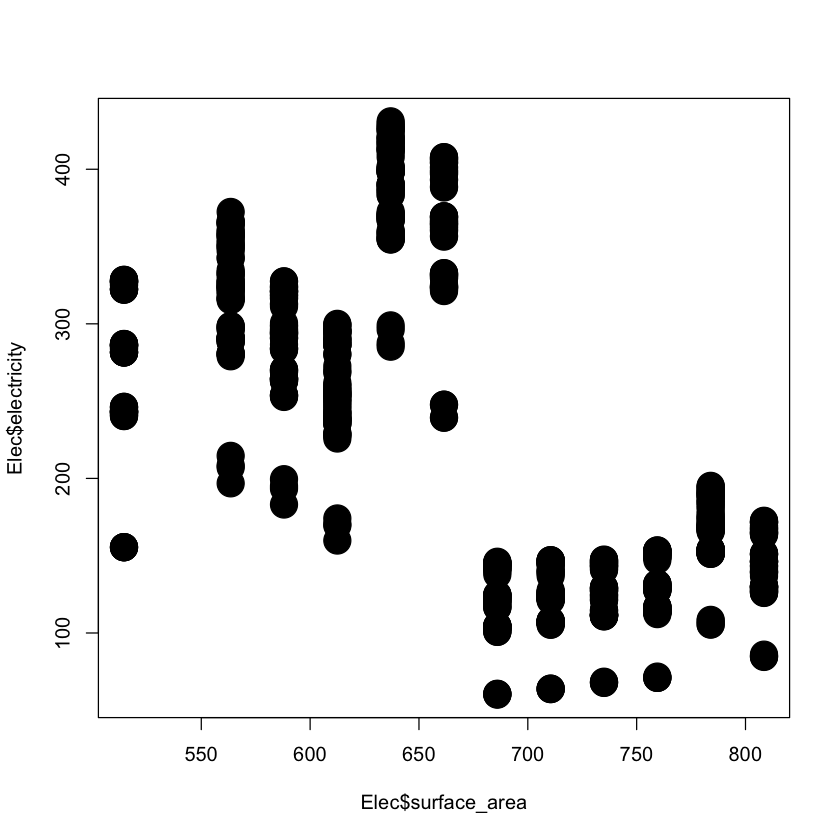

In [4]:
##### 1. Electricity
### Obj : 빌딩의 전력량 예측하는 모델
### Data : Electric
### Hypothesis : surface_area를 input으로 쓰면 electricity를 예측하는데 도움이 될 것이다.
### feature : surface_area(Input), electricity(Output)
### Process : Data Load -> EDA -> Modeling -> Test

##### Data Load
Elec <- read.csv('/Users/mac/Downloads/dev/study/R_ML/Class 1/Data/Electric.csv')

##### EDA ... Data Structure & Plot
str(Elec)
plot(Elec$surface_area, Elec$electricity, cex = 3, pch = 19)


##### 난수 발생 알고리즘 초기값 고정 ... Training 할 때마다 샘플이 동일한 기준에서 돌아가야 하니까
set.seed(3)

##### Training Set을 전체 데이터의 70% 지정 (Training Data)
train <- sample(1:nrow(Elec), 0.7 * nrow(Elec))

##### 실제 전력량 (Output, Answer)
real_electricity <- Elec$electricity[-train]

##### Model_1 ... 전력량과 면적의 1차 함수
Model_1 <- lm(electricity ~ surface_area, data = Elec[train, ])
predicted_electricity_1 <- predict(Model_1, Elec[-train, ])
test_error_1 <- mean((real_electricity - predicted_electricity_1)^2)

##### Model_5 ... 전력량과 면적의 5차 함수
Model_5 <- lm(electricity ~ poly(surface_area, 5), data = Elec[train, ])
predicted_electricity_5 <- predict(Model_5, Elec[-train, ])
test_error_5 <- mean((real_electricity - predicted_electricity_5)^2)

##### Model_10 ... 전력량과 면적의 10차 함수
Model_10 <- lm(electricity ~ poly(surface_area, 10), data = Elec[train, ])
predicted_electricity_10 <- predict(Model_10, Elec[-train, ])
test_error_10 <- mean((real_electricity - predicted_electricity_10)^2)

##### 각각의 Error(Cost) 값
test_error_1
test_error_5
test_error_10

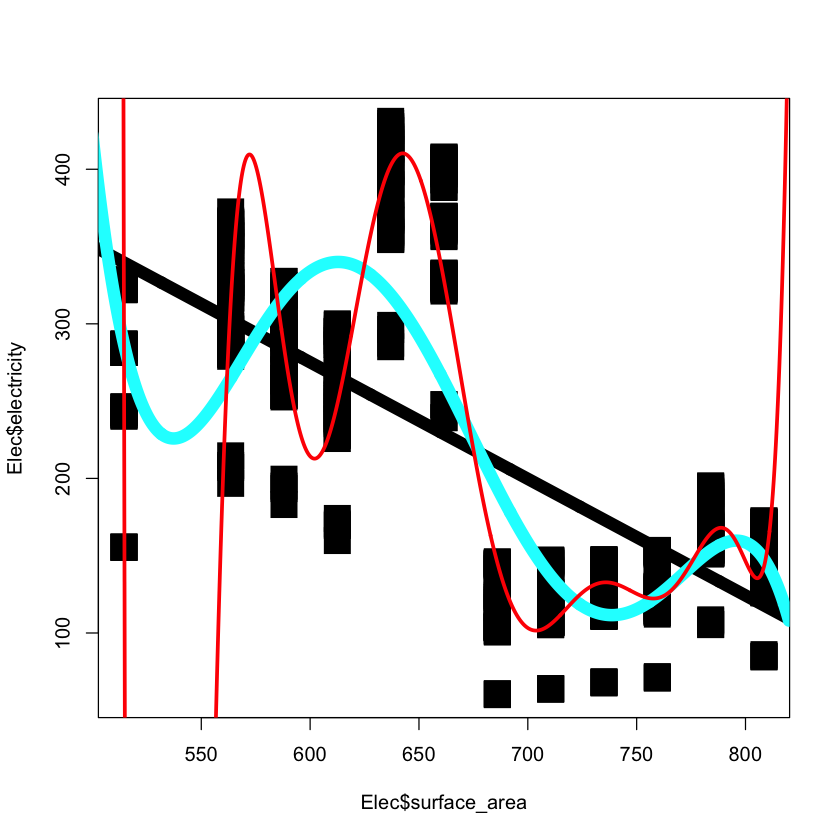

In [3]:
## EDA ... 구현한 모든 모델 시각화 
plot(Elec$surface_area, Elec$electricity, cex = 3, pch = 15)
a <- seq(500, 820, length = 1000) # surface_area의 값 범위(500~820)를 1000등분 함

points(a, predict(Model_1, data.frame(surface_area = a)), type = 'l', lwd = 10, col = 1)
points(a, predict(Model_5, data.frame(surface_area = a)), type = 'l', lwd = 10, col = 5)
points(a, predict(Model_10, data.frame(surface_area = a)), type = 'l', lwd = 3, col = 10)

# 2. Cars
- obj : 자동차의 연비를 예측하는 모델
- Data : Cars.csv
- Hypothesis : weight를 Input으로 쓰면 mpg를 예측하는데 도움이 될 것이다.
- Feature : weight(Input), mpg(Output)
- Process : Data Load -> EDA -> Modeling(Train) -> (Validation) -> Test -> Visualization

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 301 levels "amc ambassador brougham",..: 49 36 230 14 160 141 54 222 240 2 ...


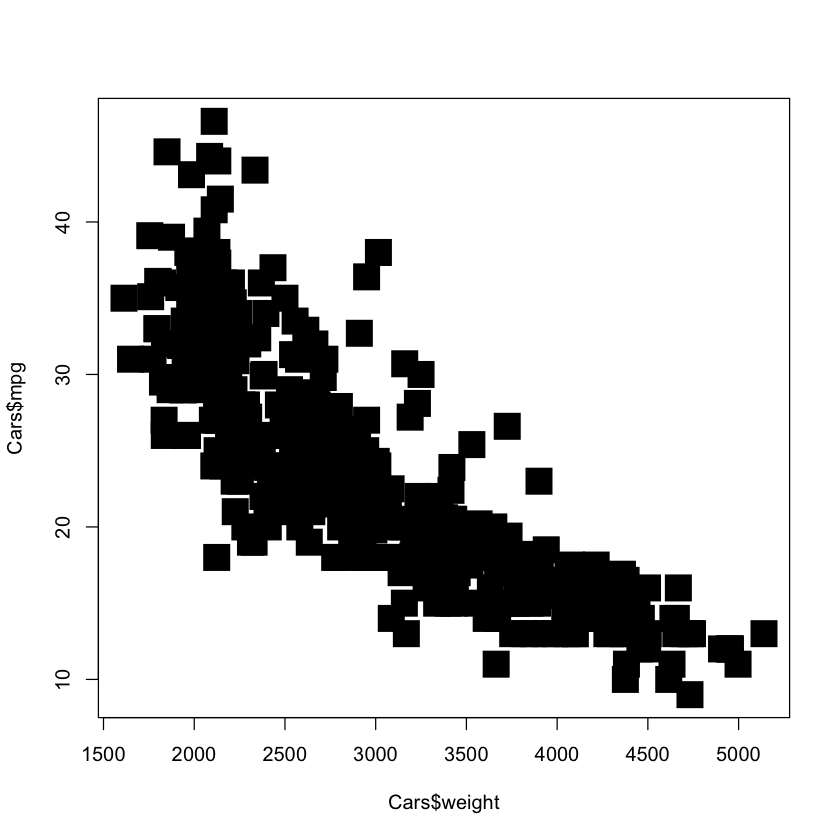

In [9]:
##### 3. Cars
### obj : 자동차의 연비를 예측하는 모델
### Data : Cars.csv
### Hypothesis : weight를 Input으로 쓰면 mpg를 예측하는데 도움이 될 것이다.
### Feature : weight(Input), mpg(Output)
### Process : Data Load -> EDA -> Modeling(Train) -> (Validation) -> Test -> Visualization

##### Data Load
Cars <- read.csv("/Users/mac/Downloads/dev/study/R_ML/Class 1/Data/Cars.csv")

##### Data Structure
str(Cars)

##### 데이터 샘플링 초기값 설정
set.seed(1)

##### Training Set을 전체 데이터의 60%로 지정
train <- sample(1:nrow(Cars), 0.6 * nrow(Cars))
##### Validatiaon Set을 전체 데이터의 20%로 지정
validation <- sample(setdiff(1:nrow(Cars), train), 0.2 * nrow(Cars)) # setdiff = 뺸 나머지, 1:768의 vector 주머니에서 train을 빼라
##### Test Set을 전체 데이터의 20%로 지정
test <- setdiff(1:nrow(Cars), c(train, validation))

##### Model_1 : weight(무게)와 mpg(연비) 1차 함수
Model_1 <- lm(mpg ~ weight, data = Cars[train, ])
pred_weight_1 <- predict(Model_1, Cars[validation, ])
validation_error_1 <- mean((Cars$mpg[validation] - pred_weight_1)^2)

##### Model_2 : weight(무게)와 mpg(연비) 10차 함수
Model_2 <- lm(mpg ~ poly(weight, 10), data = Cars[train, ])
pred_weight_2 <- predict(Model_2, Cars[validation, ])
validation_error_2 <- mean((Cars$mpg[validation] - pred_weight_2)^2)

##### Model_3 : weight + horsepower
Model_3 <- lm(mpg ~ weight + horsepower, data = Cars[train, ])
pred_weight_3 <- predict(Model_3, Cars[validation, ])
validation_error_3 <- mean((Cars$mpg[validation] - pred_weight_3)^2)



plot(Cars$weight, Cars$mpg, cex = 3, pch = 15)

##### Machine Learning System Design
### 일반적으로 이 과정을 수십, 수백, 수천 번 반복한다.
### 이 실험의 과정이 한 달이 걸리고, 한 달이 지났을 때,
### Validation Error가 제일 낮아지는 모형을 선택했다.
### 이제 Model에 대한 Test Error를 한 번 딱 측정하고 끝낸다.


##### K-Fold로 나눴다면, 실험이 끝날 때까지 가지고 가야 한다.
##### Cross Validation은 독립적이라서 병렬처리할 수 있다.
# 구조화된 데이터 ... Random Forest, Boost, Decision Tree (~14년 Random Forest, 그 이후에는 Boost 계열이 많이 활용)
# 비구조화된 데이터(이미지, 음성, 텍스트 데이터) ... Deep Learning

In [11]:
# ## EDA ... 구현한 모든 모델 시각화 
# plot(Cars$weight, Cars$mpg, cex = 3, pch = 15)
# a <- seq(500, 820, length = 1000) # surface_area의 값 범위(500~820)를 1000등분 함

# points(a, predict(Model_1, data.frame(weight = a)), type = 'l', lwd = 10, col = 1)
# points(a, predict(Model_2, data.frame(weight = a)), type = 'l', lwd = 10, col = 5)